Our main objective is to use Clustering Alogrithms to cluster the customers based on their characteristic, personality and buying habits.
This is so that we can distribute the relevant marketing resources appropriately.

The dataset we are using is customer personality analysis. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Importing

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 20.8 MB/s 
     |████████████████████████████████| 1.0 MB 47.2 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 965 kB 35.6 MB/s 
     |████████████████████████████████| 943 kB 47.1 MB/s 
     |████████████████████████████████| 133 kB 38.9 MB/s 
     |████████████████████████████████| 28.5 MB 1.6 MB/s 
     |████████████████████████████████| 78 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 749 kB 38.3 MB/s 
     |████████████████████████████████| 101 kB 11.0 MB/s 
     |████████████████████████████████| 232 kB 26.2 MB/s 
     |████████████████████████████████| 96 kB 6.2 MB/s 
     |████████████████████████████████| 1.6 MB 43.9 MB/s 
     |█████████████████████

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from pandas import get_dummies
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.xlsx to marketing_campaign.xlsx


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import io
df = pd.read_excel(io.BytesIO(uploaded['marketing_campaign.xlsx']))

# Data Cleaning and preprocessing - Kyaw Tun Khine

In [ ]:
#Summary of the data
print(df.describe())
#using describe to check for discrepany in data for example age < 0 or

print("The shape of the original data is: ", df.shape)

#You can see from this data the non-null values withing each column
df.info()
#All the dataset except Income column have values 2240 non-null values
#Income have only 2216 non-null values meaning we have 2240-2216= 24 missing values

#Checking if there is any duplicated customers
print('Number of duplicated customers: {0}'.format(df['ID'].duplicated().sum()))


                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

Examining "Customer Data"


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  

[2 rows x 29 columns]

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
first            NaN          NaN         NaN            NaN            NaN   
last             NaN          NaN         NaN            NaN            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome          Dt_Customer      Recency  \
count   2240.000000  2240.000000                 2240  2240.000000   
unique          NaN          NaN                  663          NaN   
top             NaN          NaN  2012-08-31 00:00:00          NaN   
freq            NaN          NaN                   12          NaN   
first           NaN          NaN  2012-07-30 00:00:00          NaN   
last            NaN          NaN  2014-06-29 00:00:00          NaN   
mean       0.444196     0.506250                  NaN    49.109375   
std        0.538398     0.544538                  NaN    28.962453   
min        0.000000     0.000000                  NaN     0.000000   
25%        0.000000     0.000000                  NaN    24.000000   
50%        0.000000     0.000000                  NaN    49.000000   
75%        1.000000     1.000000                  NaN    74.000000   
max        2.000000     2.000000                  NaN    99.000000   

           MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count   2240.000000  ...        2240.000000   2240.000000   2240.000000   
unique          NaN  ...                NaN           NaN           NaN   
top             NaN  ...                NaN           NaN           NaN   
freq            NaN  ...                NaN           NaN           NaN   
first           NaN  ...                NaN           NaN           NaN   
last            NaN  ...                NaN           NaN           NaN   
mean     303.935714  ...           5.316518      0.072768      0.074554   
std      336.597393  ...           2.426645      0.259813      0.262728   
min        0.000000  ...           0.000000      0.000000      0.000000   
25%       23.750000  ...           3.000000      0.000000      0.000000   
50%      173.500000  ...           6.000000      0.000000      0.000000   
75%      504.250000  ...           7.000000      0.000000      0.000000   
max     1493.000000  ...          20.000000      1.000000      1.000000   

        AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count    2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
unique           NaN           NaN           NaN          NaN            NaN   
top              NaN           NaN           NaN          NaN            NaN   
freq             NaN           NaN           NaN          NaN            NaN   
first            NaN           NaN           NaN          NaN            NaN   
last             NaN           NaN           NaN          NaN            NaN   
mean        0.072768      0.064286      0.013393     0.009375            3.0   
std         0.259813      0.245316      0.114976     0.096391            0.0   
min         0.000000      0.000000      0.000000     0.000000            3.0   
25%         0.000000      0.000000      0.000000     0.000000            3.0   

There are 0 duplicates.


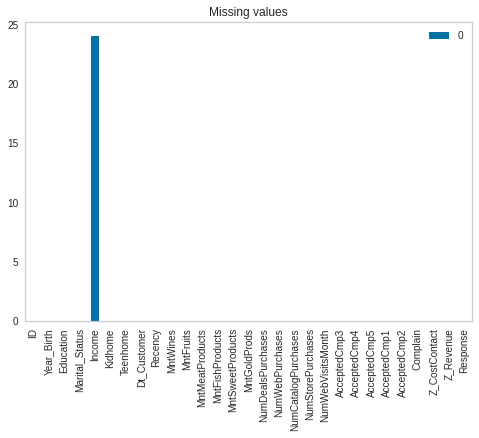

In [ ]:
#making a function for examining data
#Checking and plotting Missing Values
def data_research(data, data_name='data', un=False):
    #basic
    print(f'Examining "{data_name}"')
    display(data.head(2))
    #display(data.info())
    display(data.describe( include='all'))
    #display(data.columns)

    #duplicates
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('There are no duplicated entries.')
    else:
        print(f'There are {duplicates} duplicates.')

    #missing
    data_missing = pd.DataFrame(round(data.isnull().sum()))
    if data_missing[0].sum() > 0:
        data_missing.plot(kind='bar')
        plt.grid()
        plt.title('Missing values');
    else:
        print(f'There are no missing values in "{data_name}".')

    #unique values
    if un == True:
        for i in data.columns:
            if data[i].dtype == 'object' or data[i].dtype == 'str':
                print(data[i].unique())

data_research(df, data_name='Customer Data')

In [ ]:
vars = ["Income", "Year_Birth"]
#Outliers are data point far away from the data
#Checking for outliers in the Income Variable and Year_Birth Variable
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   #Any points beyond this inner and outer fence is considered an outlier as they are far away from the usual points
   innerFence = q1-1.5* IQR
   outerFence = q3+1.5*IQR

   outliers = df[((df<(innerFence)) | (df>(outerFence)))]
   return outliers

for i in range(len(vars)):
  outliers = find_outliers_IQR(df[vars[i]])
  print(f"Find the number of outliers in {vars[i]} variables")
  print(f"number of outliers: + {str(len(outliers))}")

  print(f"max outlier value: + {str(outliers.max())}")

  print(f"Min outlier value: + {str(outliers.min())}\n")

Find the number of outliers in Income variables
number of outliers: + 8
max outlier value: + 666666.0
Min outlier value: + 153924.0

Find the number of outliers in Year_Birth variables
number of outliers: + 3
max outlier value: + 1900
Min outlier value: + 1893



In [ ]:
#We should probably do imputation of the data with linear regression model or something else since income is like the only variable with missing values
cleaningData = df.copy()

#Extracting all the columns i with null values, pandas converts all missing fields to NaN
col_missingVal = cleaningData[df["Income"].isnull()]
col_missingVal

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    2013-11-15       11         5  ...                  7             0   
27    2013-02-20       19         5  ...                  1             0   
43    2013-11-05       80        81  ...                  2             0   
48    2014-01-01       96        48  ...                  6             0   
58    2013-06-17       57        11  ...                  6             0   
71    2012-09-14       25        25  ...                  8             0   
90    2012-11-19        4       230  ...                  9             0   
91    2014-05-27       45         7  ...                  7             0   
92    2013-11-23       87       445  ...                  1             0   
128   2013-07-11       23       352  ...                  6             0   
133   2013-08-11       96       231  ...                  4             0   
312   2013-06-03       69       861  ...                  3             0   
319   2013-08-23       67       738  ...                  7             0   
1379  2013-04-01       39       187  ...                  5             0   
1382  2012-09-03       87        19  ...                  5             0   
1383  2014-01-12       49         5  ...                  7             0   
1386  2014-03-02       17        25  ...                  7             0   
2059  2013-05-18       52       375  ...                  3             0   
2061  2013-05-31       82        23  ...                  6             0   
2078  2013-03-03       82        71  ...                  8             0   
2079  2013-06-23       83       161  ...                  6             0   
2081  2013-10-18       95       264  ...                  7             0   
2084  2013-10-30       75       532  ...                  1             0   
2228  2012-08-12       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [ ]:
#Converting some of the variables to categorical value like education,Marital_Status...
catVars = ["Education","Marital_Status","Complain","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
for i in range(len(catVars)):
  cleaningData[catVars[i]] = cleaningData[catVars[i]].astype('category');
cleaningData.info()

#Converting Dt_customer to daysOfEnrollment
from datetime import datetime,date
def numOfDays(date1):
    date_format = "%Y-%m-%d"
    tsToDate = date1.date()
    dateMem = datetime.strptime(str(tsToDate), date_format)
    # date1 = date(date1)
    date2 = datetime(2021,7,24)
    return (date2-dateMem).days


print(numOfDays(cleaningData.loc[0,"Dt_Customer"]))

cleaningData["daysOfEnrollment"] = cleaningData["Dt_Customer"].apply(numOfDays)


#Converting YearBirth to age
cleaningData=cleaningData.assign(Age_Category= cleaningData['Year_Birth'].add(2021).sub(cleaningData['Year_Birth']).sub(cleaningData['Year_Birth']))

#We are dropping ID , i got read some research that since its all unique values, it would cause
#high cardinality which means there would be high dimensionality and thus cannot generalise and cluster properly

cleaningData.drop(["ID","Z_CostContact","Z_Revenue","Dt_Customer","Year_Birth"],axis=1,inplace=True)

cleaningData.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<bound method DataFrame.info of        Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single  58138.0        0         0       58   
1     Graduation         Single  46344.0        1         1       38   
2     Graduation       Together  71613.0        0         0       26   
3     Graduation       Together  26646.0        1         0       26   
4            PhD        Married  58293.0        1         0       94   
...          ...            ...      ...      ...       ...      ...   
2235  Graduation        Married  61223.0        0         1       46   
2236         PhD       Together  64014.0        2         1       56   
2237  Graduation       Divorced  56981.0        0         0       91   
2238      Master       Together  69245.0        0         1        8   
2239         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88          

In [ ]:
#Checking for abnorml values like age < 0 or age> 150.
#Checking for negative ages
negative_age = cleaningData[cleaningData["Age_Category"]<0 ]
#Checking for ages more than 130 years old is not possible, since the oldest human being is less than 130 years
ages_more_than_130 = cleaningData[cleaningData["Age_Category"]>130]

print(len(negative_age), len(ages_more_than_130))
print("There were not abnormal values in age_category variable")

0 0
There were not abnormal values in age_category variable


In [ ]:
#Converting Marital Status to Relationship Status

re_marital = {
    'Single': 'Not in relationship',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Not in relationship',
    'Widow': 'Not in relationship',
    'Alone': 'Not in relationship',
    'Absurd': 'Not in relationship',
    'YOLO': 'Not in relationship'
}

cleaningData['Marital_Status'] = cleaningData['Marital_Status'].map(re_marital)
cleaningData.rename(columns={'Marital_Status':'Relationship_Status'}, inplace=True)
cleaningData

cleaningDataOneHot = cleaningData.copy()

In [ ]:
#The Variable to be encoded
cVarToBeEncoded = ["Education","Relationship_Status"]

In [ ]:
#Label encoding is used to encode the labels of categorical variables to numeric labels which could be used for model training
#For kmodes we would be using OneHotEncoding show in the k-modes section
from sklearn.preprocessing import LabelEncoder

#LabelEncoding
encoder1 = LabelEncoder()
def encodingCatVar(var):
  for i in range(len(var)):
    cleaningData[var[i]] = encoder1.fit_transform(cleaningData[var[i]])
    print(cleaningData[var[i]])

encodingCatVar(cVarToBeEncoded)

print(cleaningData)

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2240, dtype: int64
0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: Relationship_Status, Length: 2240, dtype: int64
      Education  Relationship_Status   Income  Kidhome  Teenhome  Recency  \
0             2                    1  58138.0        0         0       58   
1             2                    1  46344.0        1         1       38   
2             2                    0  71613.0        0         0       26   
3             2                    0  26646.0        1         0       26   
4             4                    0  58293.0        1         0       94   
...         ...                  ...      ...      ...       ...      ...   
2235          2                    0  61223.0        0         1       46   
2236          4                    0  64014.0        2         1  

In [ ]:
#Imputation of data with mean for continous data, mode for categorical or use model to estimate the value
#If we were to drop all missing data in dataset it would lead to bias effect, reduce efficency of ml model and affect the data distribution
#https://www.askpython.com/python/examples/impute-missing-data-values

#Can use imputer from sklearn to imputate the values got other libraries also
#https://scikit-learn.org/stable/modules/impute.html
#But imputing with mean also got its flaws like reducing the standard error all this

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
#use panda's get dummy to create dummy variables or use sklearn's one hot encoding

#What is multivariate imputatioon?
#Say there is 4 columns 1 has missing values, that 1 column is the outcome the rest are use as variables in a regressor model to predict missing value, which is income in this case
#This is done for each feature and then repeated for 3 specificed iterations
#What is BayeisanRidge Regression?
# it allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates
#BayseianRidge - regularise linear regression with a regularization parameter L, meaning that it has a lower chance of overfitting as compared to linear regression



imputer = IterativeImputer(estimator = BayesianRidge() , max_iter=3)
imputer.fit(cleaningData)
imputedData = imputer.transform(cleaningData)

cleanD =  pd.DataFrame(imputedData,columns=list(cleaningData.columns))
cleanD.info()
cleanD

#cleanD is the new Dataframe with all the missing value estimated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Relationship_Status  2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   float64
 4   Teenhome             2240 non-null   float64
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

Education  Relationship_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0                  1.0  58138.0      0.0       0.0     58.0   
1           2.0                  1.0  46344.0      1.0       1.0     38.0   
2           2.0                  0.0  71613.0      0.0       0.0     26.0   
3           2.0                  0.0  26646.0      1.0       0.0     26.0   
4           4.0                  0.0  58293.0      1.0       0.0     94.0   
...         ...                  ...      ...      ...       ...      ...   
2235        2.0                  0.0  61223.0      0.0       1.0     46.0   
2236        4.0                  0.0  64014.0      2.0       1.0     56.0   
2237        2.0                  1.0  56981.0      0.0       0.0     91.0   
2238        3.0                  0.0  69245.0      0.0       1.0      8.0   
2239        4.0                  0.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0        635.0       88.0            546.0            172.0  ...   
1         11.0        1.0              6.0              2.0  ...   
2        426.0       49.0            127.0            111.0  ...   
3         11.0        4.0             20.0             10.0  ...   
4        173.0       43.0            118.0             46.0  ...   
...        ...        ...              ...              ...  ...   
2235     709.0       43.0            182.0             42.0  ...   
2236     406.0        0.0             30.0              0.0  ...   
2237     908.0       48.0            217.0             32.0  ...   
2238     428.0       30.0            214.0             80.0  ...   
2239      84.0        3.0             61.0              2.0  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                   7.0           0.0           0.0           0.0   
1                   5.0           0.0           0.0           0.0   
2                   4.0           0.0           0.0           0.0   
3                   6.0           0.0           0.0           0.0   
4                   5.0           0.0           0.0           0.0   
...                 ...           ...           ...           ...   
2235                5.0           0.0           0.0           0.0   
2236                7.0           0.0           0.0           0.0   
2237                6.0           0.0           1.0           0.0   
2238                3.0           0.0           0.0           0.0   
2239                7.0           0.0           0.0           0.0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  daysOfEnrollment  \
0              0.0           0.0       0.0       1.0            3245.0   
1              0.0           0.0       0.0       0.0            2695.0   
2              0.0           0.0       0.0       0.0            2894.0   
3              0.0           0.0       0.0       0.0            2721.0   
4              0.0           0.0       0.0       0.0            2743.0   
...            ...           ...       ...       ...               ...   
2235           0.0           0.0       0.0       0.0            2963.0   
2236           1.0           0.0       0.0       0.0            2601.0   
2237           0.0           0.0       0.0       0.0            2737.0   
2238           0.0           0.0       0.0       0.0            2738.0   
2239           0.0           0.0       0.0       1.0            3204.0   

      Age_Category  
0             64.0  
1             67.0  
2             56.0  
3             37.0  
4             40.0  
...            ...  
2235          54.0  
2236          75.0  
2237          40.0  
2238          65.0  
2239          67.0  

[2240 rows x 26 columns]

In [ ]:
# Add in total spendings
mnt= ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds" ]
cleanD= cleanD.assign(total_spending=0)
for i in mnt:
  cleanD['total_spending']= cleanD['total_spending']+ cleanD[i]

In [ ]:
#Renaming Age to Age_Category
cleanD.rename(columns={'Age_Category':'Age'}, inplace=True)

In [ ]:
#Function to group different age groups
def f(age):
    if age < 24:
        return 'Young'
    elif age <=55:
        return 'Adult'
    elif age >= 56:
        return 'Elder'

In [ ]:
def Has_Child(children):
    if children==0:
      return False
    return True

In [ ]:
cleanD["Children"] = cleanD.Kidhome + cleanD.Teenhome

In [ ]:
cleanD['Has_Child'] = cleanD['Children'].apply(Has_Child)
cleanD

Education  Relationship_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0                  1.0  58138.0      0.0       0.0     58.0   
1           2.0                  1.0  46344.0      1.0       1.0     38.0   
2           2.0                  0.0  71613.0      0.0       0.0     26.0   
3           2.0                  0.0  26646.0      1.0       0.0     26.0   
4           4.0                  0.0  58293.0      1.0       0.0     94.0   
...         ...                  ...      ...      ...       ...      ...   
2235        2.0                  0.0  61223.0      0.0       1.0     46.0   
2236        4.0                  0.0  64014.0      2.0       1.0     56.0   
2237        2.0                  1.0  56981.0      0.0       0.0     91.0   
2238        3.0                  0.0  69245.0      0.0       1.0      8.0   
2239        4.0                  0.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0        635.0       88.0            546.0            172.0  ...   
1         11.0        1.0              6.0              2.0  ...   
2        426.0       49.0            127.0            111.0  ...   
3         11.0        4.0             20.0             10.0  ...   
4        173.0       43.0            118.0             46.0  ...   
...        ...        ...              ...              ...  ...   
2235     709.0       43.0            182.0             42.0  ...   
2236     406.0        0.0             30.0              0.0  ...   
2237     908.0       48.0            217.0             32.0  ...   
2238     428.0       30.0            214.0             80.0  ...   
2239      84.0        3.0             61.0              2.0  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0              0.0           0.0           0.0       0.0       1.0   
1              0.0           0.0           0.0       0.0       0.0   
2              0.0           0.0           0.0       0.0       0.0   
3              0.0           0.0           0.0       0.0       0.0   
4              0.0           0.0           0.0       0.0       0.0   
...            ...           ...           ...       ...       ...   
2235           0.0           0.0           0.0       0.0       0.0   
2236           0.0           1.0           0.0       0.0       0.0   
2237           0.0           0.0           0.0       0.0       0.0   
2238           0.0           0.0           0.0       0.0       0.0   
2239           0.0           0.0           0.0       0.0       1.0   

      daysOfEnrollment   Age  total_spending  Children  Has_Child  
0               3245.0  64.0          1617.0       0.0      False  
1               2695.0  67.0            27.0       2.0       True  
2               2894.0  56.0           776.0       0.0      False  
3               2721.0  37.0            53.0       1.0       True  
4               2743.0  40.0           422.0       1.0       True  
...                ...   ...             ...       ...        ...  
2235            2963.0  54.0          1341.0       1.0       True  
2236            2601.0  75.0           444.0       3.0       True  
2237            2737.0  40.0          1241.0       0.0      False  
2238            2738.0  65.0           843.0       1.0       True  
2239            3204.0  67.0           172.0       2.0       True  

[2240 rows x 29 columns]

In [ ]:
cleanD.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Relationship_Status  2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   float64
 4   Teenhome             2240 non-null   float64
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

In [ ]:
cleanD['Age_Category']=cleanD['Age'].apply(f)
cleanD

Education  Relationship_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0                  1.0  58138.0      0.0       0.0     58.0   
1           2.0                  1.0  46344.0      1.0       1.0     38.0   
2           2.0                  0.0  71613.0      0.0       0.0     26.0   
3           2.0                  0.0  26646.0      1.0       0.0     26.0   
4           4.0                  0.0  58293.0      1.0       0.0     94.0   
...         ...                  ...      ...      ...       ...      ...   
2235        2.0                  0.0  61223.0      0.0       1.0     46.0   
2236        4.0                  0.0  64014.0      2.0       1.0     56.0   
2237        2.0                  1.0  56981.0      0.0       0.0     91.0   
2238        3.0                  0.0  69245.0      0.0       1.0      8.0   
2239        4.0                  0.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0        635.0       88.0            546.0            172.0  ...   
1         11.0        1.0              6.0              2.0  ...   
2        426.0       49.0            127.0            111.0  ...   
3         11.0        4.0             20.0             10.0  ...   
4        173.0       43.0            118.0             46.0  ...   
...        ...        ...              ...              ...  ...   
2235     709.0       43.0            182.0             42.0  ...   
2236     406.0        0.0             30.0              0.0  ...   
2237     908.0       48.0            217.0             32.0  ...   
2238     428.0       30.0            214.0             80.0  ...   
2239      84.0        3.0             61.0              2.0  ...   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  daysOfEnrollment   Age  \
0              0.0           0.0       0.0       1.0            3245.0  64.0   
1              0.0           0.0       0.0       0.0            2695.0  67.0   
2              0.0           0.0       0.0       0.0            2894.0  56.0   
3              0.0           0.0       0.0       0.0            2721.0  37.0   
4              0.0           0.0       0.0       0.0            2743.0  40.0   
...            ...           ...       ...       ...               ...   ...   
2235           0.0           0.0       0.0       0.0            2963.0  54.0   
2236           1.0           0.0       0.0       0.0            2601.0  75.0   
2237           0.0           0.0       0.0       0.0            2737.0  40.0   
2238           0.0           0.0       0.0       0.0            2738.0  65.0   
2239           0.0           0.0       0.0       1.0            3204.0  67.0   

      total_spending  Children  Has_Child  Age_Category  
0             1617.0       0.0      False         Elder  
1               27.0       2.0       True         Elder  
2              776.0       0.0      False         Elder  
3               53.0       1.0       True         Adult  
4              422.0       1.0       True         Adult  
...              ...       ...        ...           ...  
2235          1341.0       1.0       True         Adult  
2236           444.0       3.0       True         Elder  
2237          1241.0       0.0      False         Adult  
2238           843.0       1.0       True         Elder  
2239           172.0       2.0       True         Elder  

[2240 rows x 30 columns]

In [ ]:
#LabelEncoding
encoder1 = LabelEncoder()
cleanD["Age_Category"] = encoder1.fit_transform(cleaningData["Age_Category"])
print(cleanD)

      Education  Relationship_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0                  1.0  58138.0      0.0       0.0     58.0   
1           2.0                  1.0  46344.0      1.0       1.0     38.0   
2           2.0                  0.0  71613.0      0.0       0.0     26.0   
3           2.0                  0.0  26646.0      1.0       0.0     26.0   
4           4.0                  0.0  58293.0      1.0       0.0     94.0   
...         ...                  ...      ...      ...       ...      ...   
2235        2.0                  0.0  61223.0      0.0       1.0     46.0   
2236        4.0                  0.0  64014.0      2.0       1.0     56.0   
2237        2.0                  1.0  56981.0      0.0       0.0     91.0   
2238        3.0                  0.0  69245.0      0.0       1.0      8.0   
2239        4.0                  0.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0      


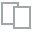
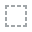
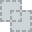
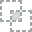
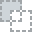
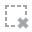
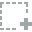
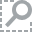
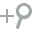
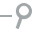
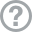
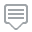
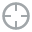
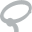
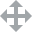
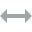
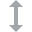
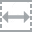
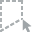
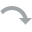
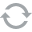
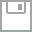
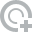
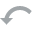
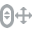
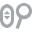
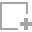
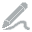
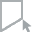
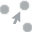
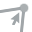
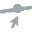

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(cleanD)

Since K-modes requires preprocessing and onehot encoding, we would be proceeding with the preprocessing in that section

# Data Visualisation - Koh Shao Hong Randall




In [ ]:
#Finding the Correlation between Total Income and Spending
#-Can just do exploration in general
sb.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

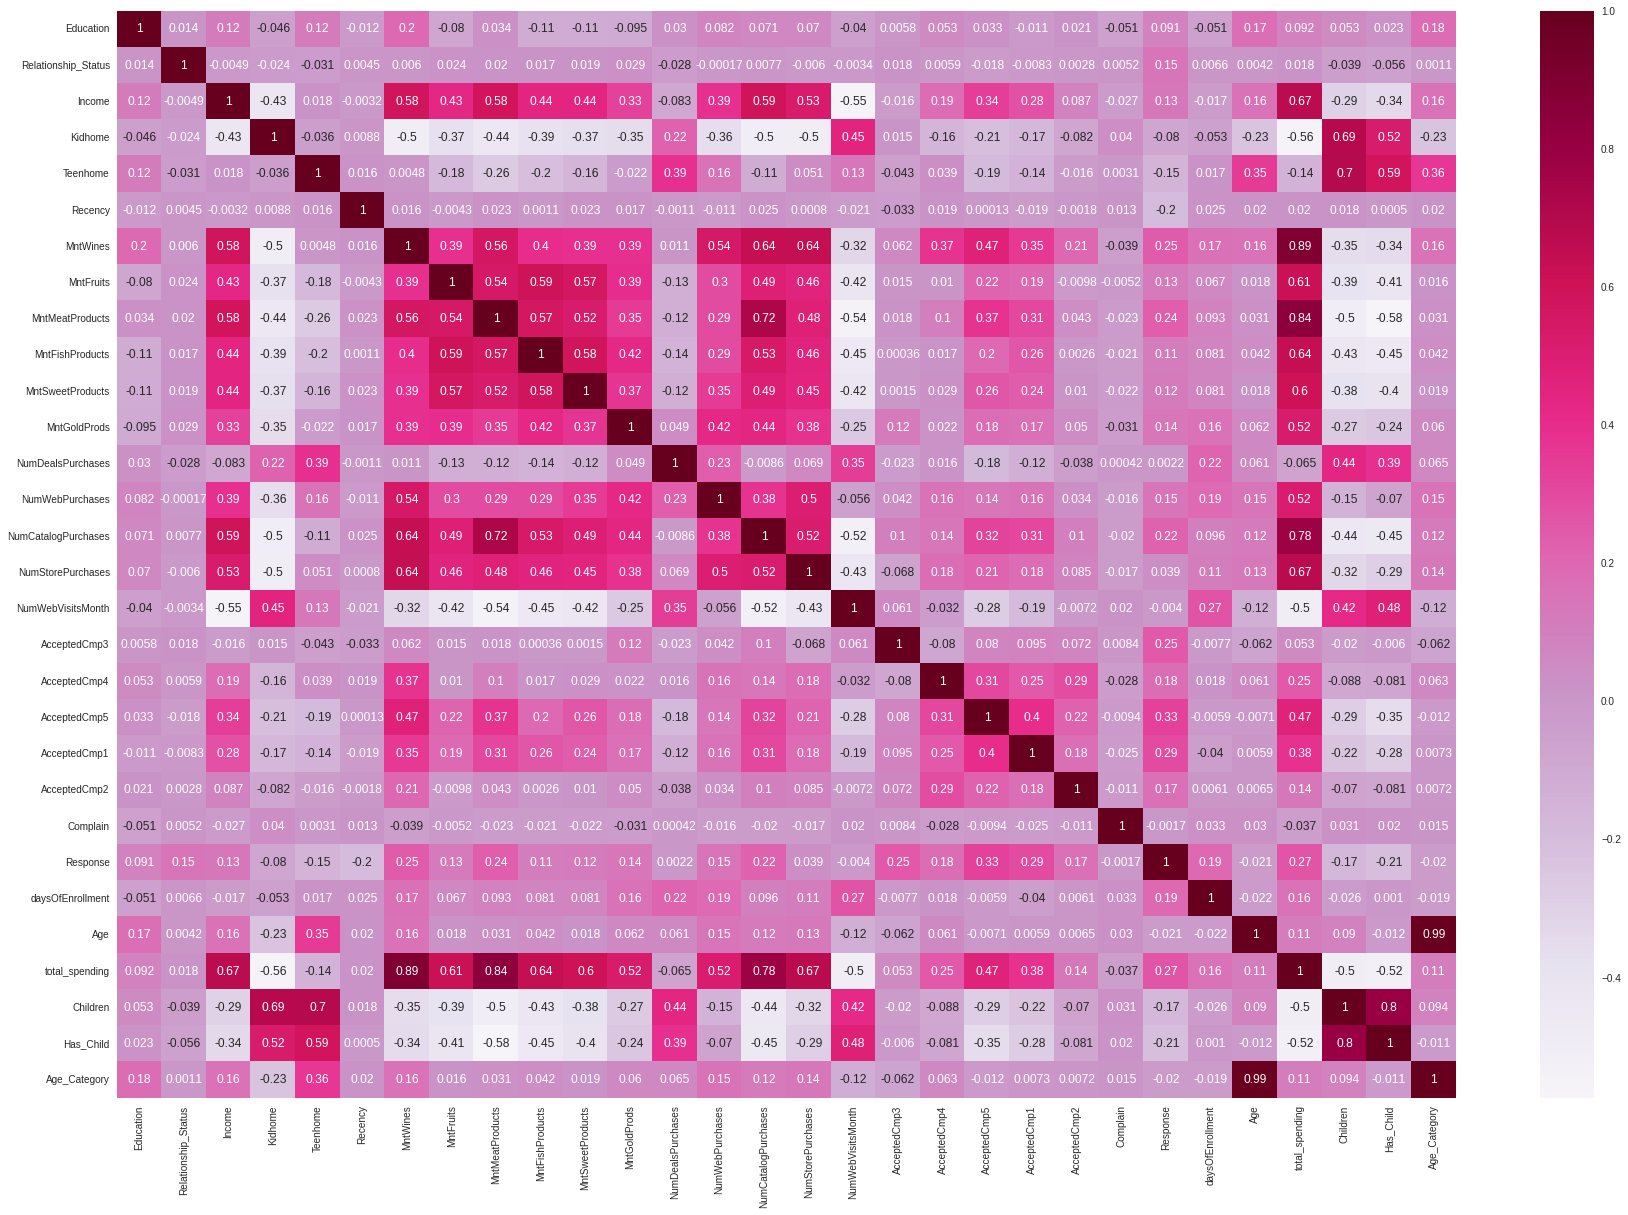

In [ ]:
# Getting the correlations of all the variables and plotting the correlation with a heat map
corr = cleanD.corr()
plt.figure(figsize=(30,20))
sb.heatmap(corr, annot=True, cmap='PuRd');

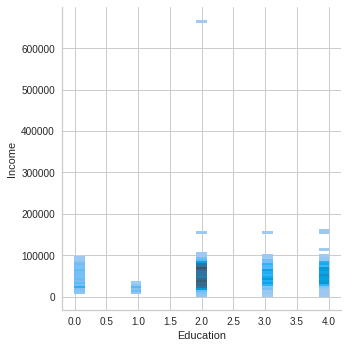

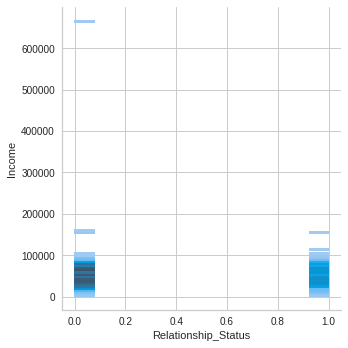

In [ ]:
# fig, axes = plt.subplots(2,figsize=(20,20))
sb.displot(data=cleanD, x="Education", y="Income")
sb.displot(data=cleanD, x="Relationship_Status", y="Income")

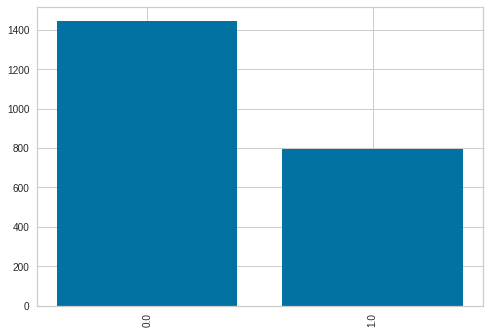

In [ ]:
l,a = list(set(cleanD["Relationship_Status"])),[]
for i in range(len(l)):
    a.append(cleanD["Relationship_Status"].to_list().count(l[i]))
plt.bar(x=range(len(l)),height = a)
plt.xticks(labels=l,ticks=range(len(l)), rotation=90)
# plt.set_xlabel("How diverse is the Marital Status of the clients?")
plt.show()

In [ ]:
vis_Data = df.copy()
vis_Data['Dt_Customer'] = pd.to_datetime(vis_Data['Dt_Customer'])

vis_Data['Age'] = 2015 - vis_Data['Year_Birth']
vis_Data['Education'] = vis_Data['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})
vis_Data['Living_With'] = vis_Data['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'})
vis_Data['Total_Children'] = vis_Data['Kidhome'] + vis_Data['Teenhome']

# Breaking down the date of customer's enrollment
vis_Data['Day'] = vis_Data['Dt_Customer'].apply(lambda x: x.day)
vis_Data['Dayofweek'] = vis_Data['Dt_Customer'].apply(lambda x: x.day_name())
vis_Data['Month'] = vis_Data['Dt_Customer'].apply(lambda x: x.month)
vis_Data['Year'] = vis_Data['Dt_Customer'].apply(lambda x: x.year)

vis_Data['Is_Parent'] = vis_Data['Total_Children'].apply(lambda x: 1 if x != 0 else 0)
vis_Data['Total_Spent'] = vis_Data['MntWines'] + vis_Data['MntFruits'] + vis_Data['MntMeatProducts'] + vis_Data['MntFishProducts'] + vis_Data['MntSweetProducts'] + vis_Data['MntGoldProds']

# Clear description of feature
vis_Data.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meats', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Golds'}, inplace=True)
vis_Data.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

# Drop unnecessary columns and nan values
vis_Data.dropna(inplace=True)
vis_Data.drop(['ID', 'Dt_Customer', 'Year_Birth', 'Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df = vis_Data.copy()


Text(0.5, 1.05, 'Feature Relationship')

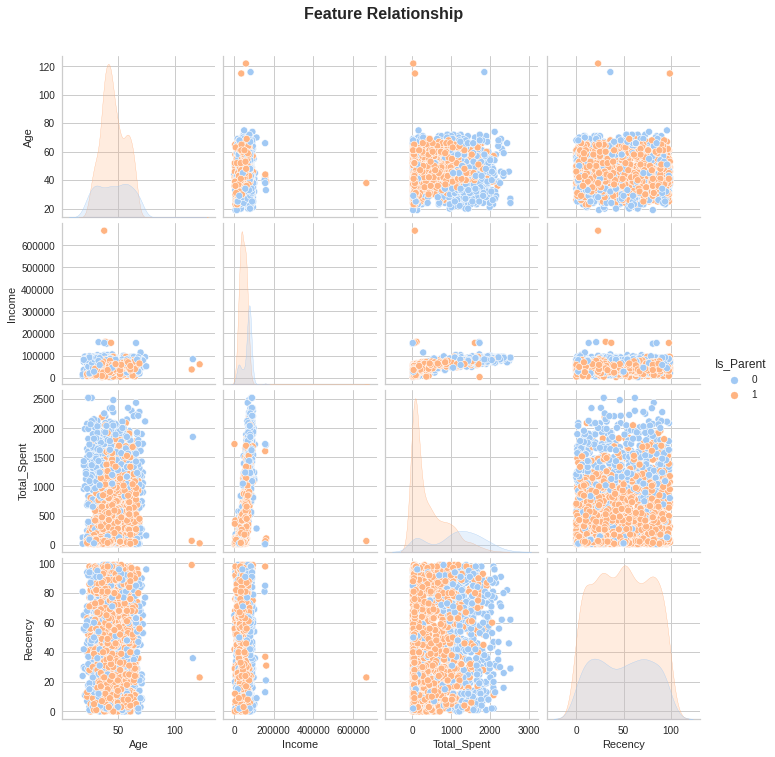

In [ ]:
data = ['Age', 'Income', 'Total_Spent', 'Recency', 'Is_Parent']

plot = sb.pairplot(df[data], hue='Is_Parent', palette='pastel')
plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16)

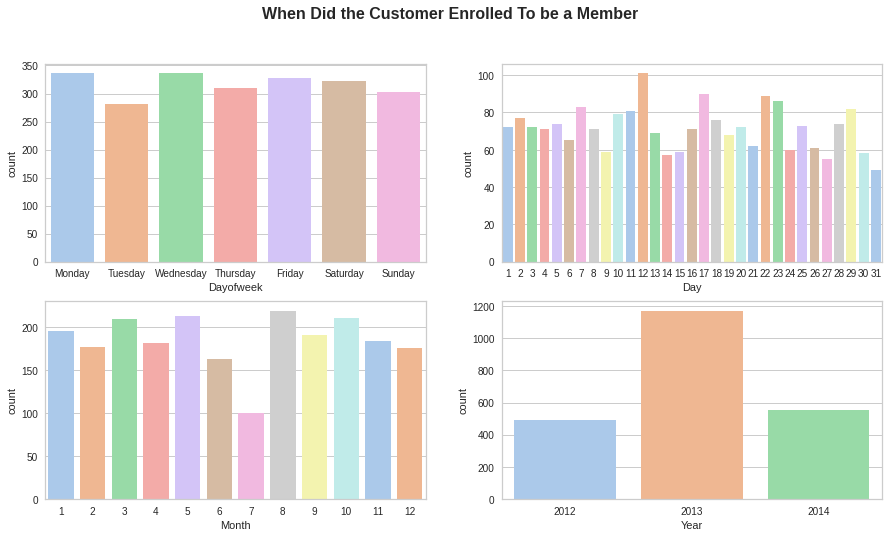

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
axes = axes.flatten()
fig.suptitle("When Did the Customer Enrolled To be a Member", weight='bold', fontsize=16)

sb.countplot(df['Dayofweek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], palette='pastel', ax=axes[0])

# mean_day = df['Day'].value_counts().mean()
sb.countplot(df['Day'], palette='pastel', ax=axes[1])
# axes[1].axhline(mean_day, ls='--', color='r')
# axes[1].text(31, mean_day, 'Mean: {} new members'.format(round(mean_day)), color='red')

sb.countplot(df['Month'], palette='pastel', ax=axes[2])


#I think only year important
sb.countplot(df['Year'], palette='pastel', ax=axes[3])

In [ ]:
group = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80])
group.value_counts()

(40, 50]    669
(30, 40]    553
(50, 60]    459
(60, 70]    298
(20, 30]    212
(70, 80]     15
(10, 20]      7
Name: Age, dtype: int64

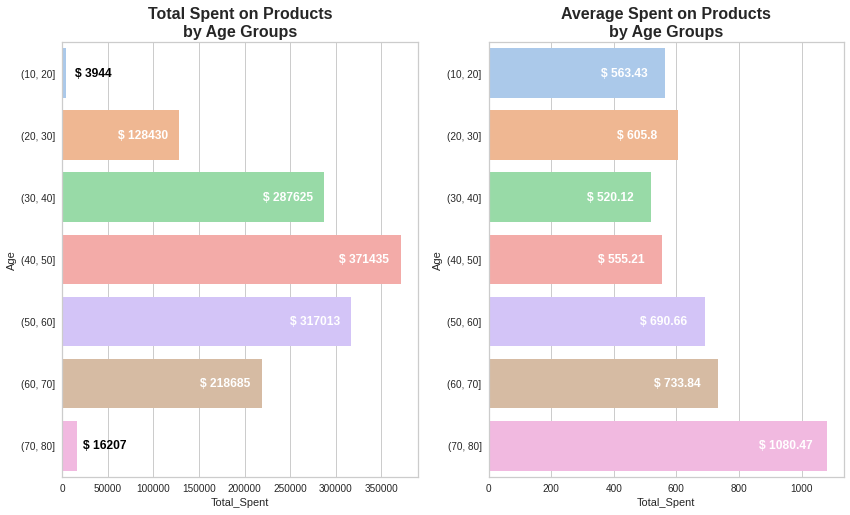

In [ ]:
df2 = df.copy()
df2['Age'] = group

sum_group = df2[['Total_Spent', 'Age']].groupby('Age').sum()
mean_group = df2[['Total_Spent', 'Age']].groupby('Age').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()

sb.barplot(x=sum_group['Total_Spent'], y=sum_group.index, palette='pastel', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['Total_Spent']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v-40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

sb.barplot(x=mean_group['Total_Spent'], y=mean_group.index, palette='pastel', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_Spent']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)


Text(0.5, 1.0, 'Gold')

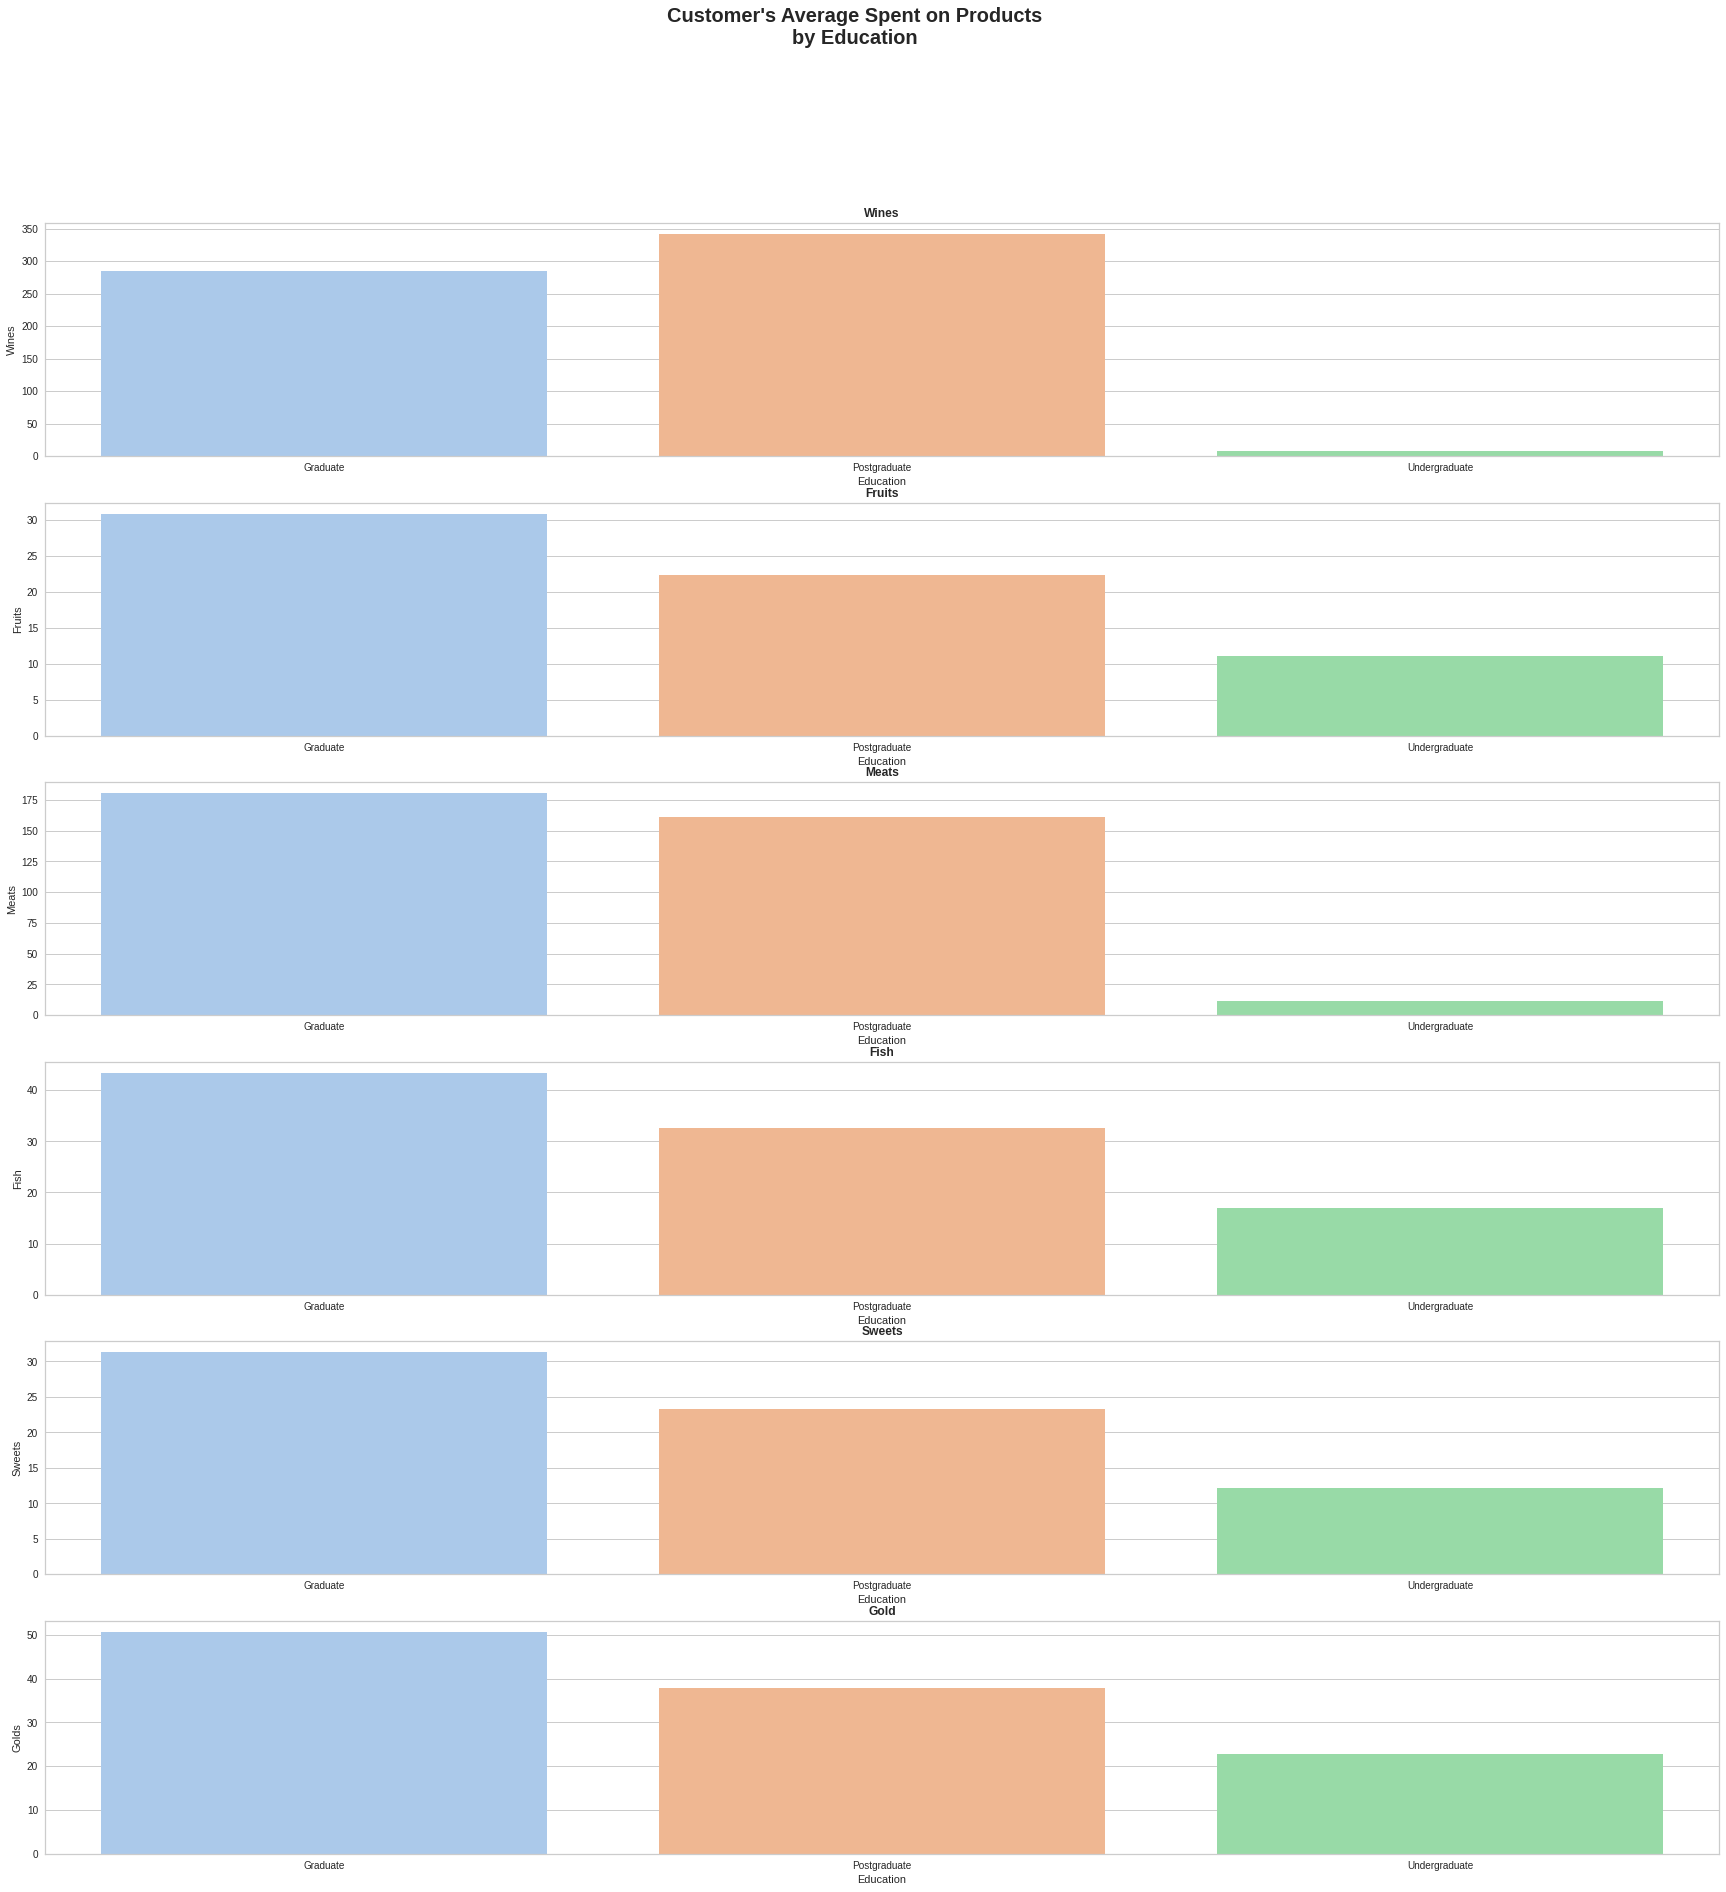

In [ ]:
# from matplotlib import pyplot as plt
# fig, axd = plt.subplot_mosaic([[0,1,2],[3,4,5], [6,6,7], [6,6,7], [6,6,7]],
#                               constrained_layout=True, figsize=(18,10))

fig, axd = plt.subplots(6,figsize=(30,30))
fig.suptitle("Customer's Average Spent on Products\nby Education", weight='bold', fontsize=20)

# Bar plot
sb.barplot(data=vis_Data, x='Education', y='Wines', palette='pastel', ci=None, ax=axd[0])
axd[0].set_title('Wines', weight='bold')
sb.barplot(data=vis_Data, x='Education', y='Fruits', palette='pastel', ci=None, ax=axd[1])
axd[1].set_title('Fruits', weight='bold')
sb.barplot(data=vis_Data, x='Education', y='Meats', palette='pastel', ci=None, ax=axd[2])
axd[2].set_title('Meats', weight='bold')
sb.barplot(data=vis_Data, x='Education', y='Fish', palette='pastel', ci=None, ax=axd[3])
axd[3].set_title('Fish', weight='bold')
sb.barplot(data=vis_Data, x='Education', y='Sweets', palette='pastel', ci=None, ax=axd[4])
axd[4].set_title('Sweets', weight='bold')
sb.barplot(data=vis_Data, x='Education', y='Golds', palette='pastel', ci=None, ax=axd[5])
axd[5].set_title('Gold', weight='bold')

(0.0, 1.0, 0.0, 1.0)

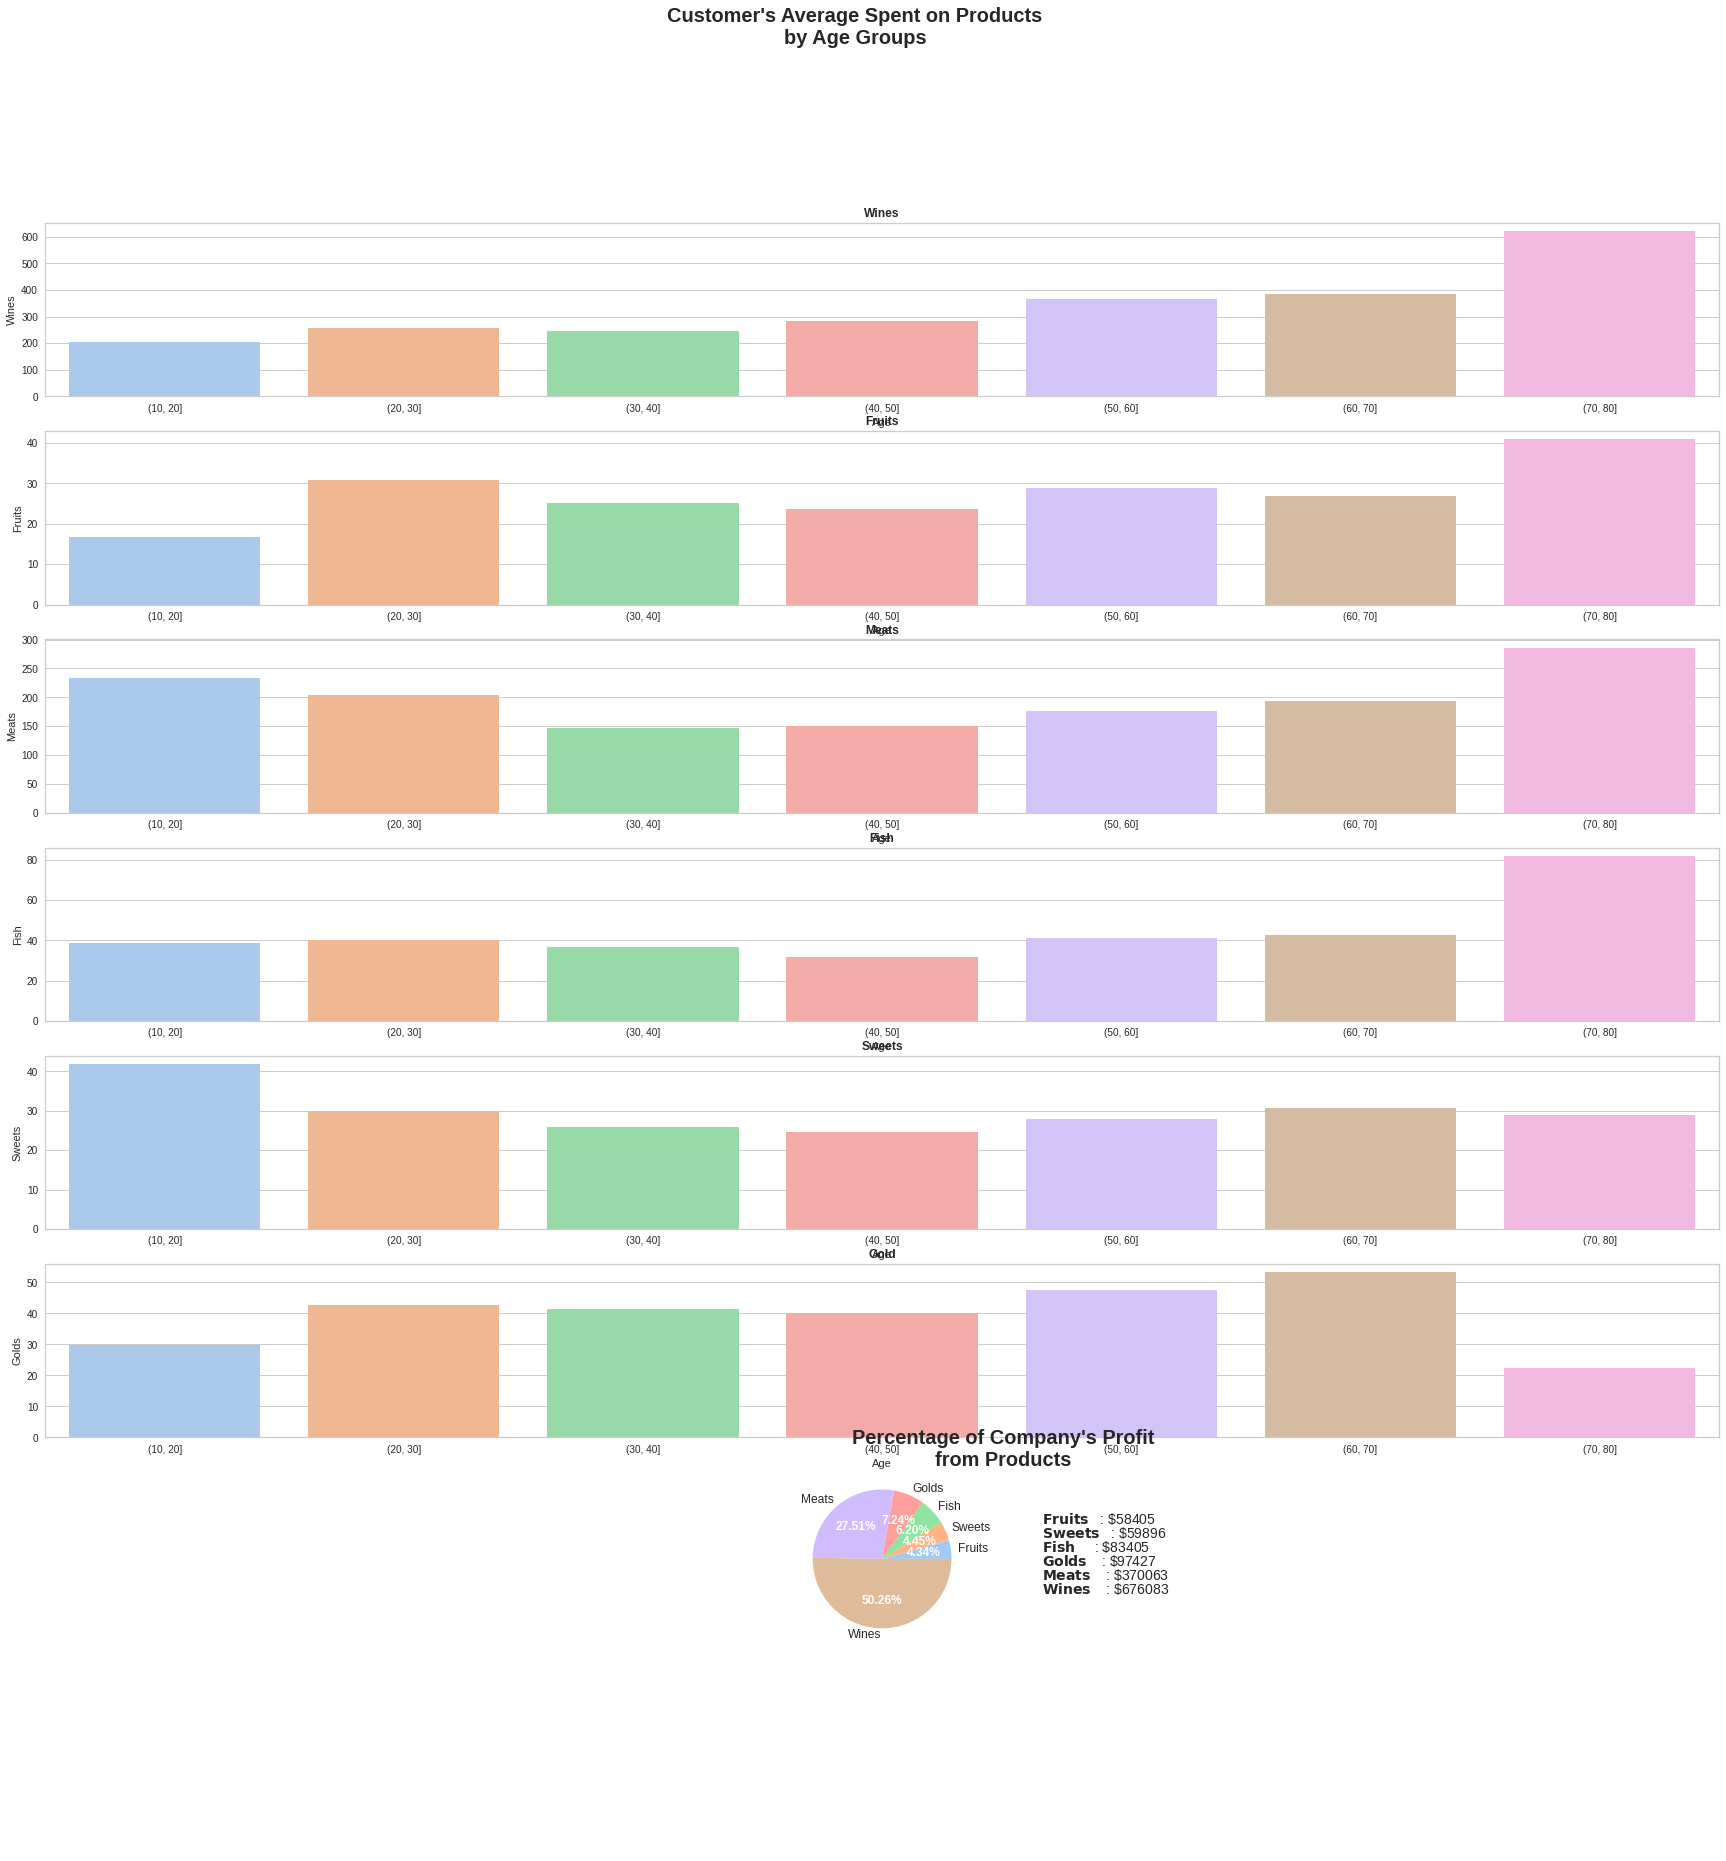

In [ ]:
# fig, axd = plt.subplot_mosaic([[0,1,2],[3,4,5], [6,6,7], [6,6,7], [6,6,7]],
#                               constrained_layout=True, figsize=(18,10))

fig, axd = plt.subplots(8,figsize=(30,30))

fig.suptitle("Customer's Average Spent on Products\nby Age Groups", weight='bold', fontsize=20)

# Bar plot
sb.barplot(data=vis_Data, x=group, y='Wines', palette='pastel', ci=None, ax=axd[0])
axd[0].set_title('Wines', weight='bold')
sb.barplot(data=vis_Data, x=group, y='Fruits', palette='pastel', ci=None, ax=axd[1])
axd[1].set_title('Fruits', weight='bold')
sb.barplot(data=vis_Data, x=group, y='Meats', palette='pastel', ci=None, ax=axd[2])
axd[2].set_title('Meats', weight='bold')
sb.barplot(data=vis_Data, x=group, y='Fish', palette='pastel', ci=None, ax=axd[3])
axd[3].set_title('Fish', weight='bold')
sb.barplot(data=vis_Data, x=group, y='Sweets', palette='pastel', ci=None, ax=axd[4])
axd[4].set_title('Sweets', weight='bold')
sb.barplot(data=vis_Data, x=group, y='Golds', palette='pastel', ci=None, ax=axd[5])
axd[5].set_title('Gold', weight='bold')

# Pie chart
data = df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum().sort_values()

palette = sb.color_palette('pastel')
wedges, texts, autotexts = axd[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[6].set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[6].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)

axd[7].axis('off')

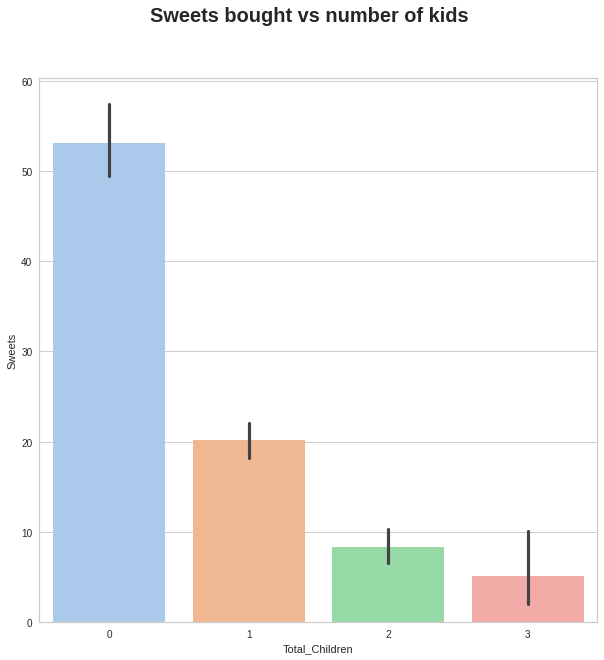

In [ ]:
fig, axd = plt.subplots(1,figsize=(10,10))

fig.suptitle("Sweets bought vs number of kids", weight='bold', fontsize=20)
#sb.swarmplot()
sb.barplot(data=vis_Data, x='Total_Children', y='Sweets', palette='pastel')


In [ ]:

mnt= ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds" ]
cleanD= cleanD.assign(total_spending=0)
for i in mnt:
  cleanD['total_spending']= cleanD['total_spending']+ cleanD[i]
cleanD

Education  Relationship_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0                  1.0  58138.0      0.0       0.0     58.0   
1           2.0                  1.0  46344.0      1.0       1.0     38.0   
2           2.0                  0.0  71613.0      0.0       0.0     26.0   
3           2.0                  0.0  26646.0      1.0       0.0     26.0   
4           4.0                  0.0  58293.0      1.0       0.0     94.0   
...         ...                  ...      ...      ...       ...      ...   
2235        2.0                  0.0  61223.0      0.0       1.0     46.0   
2236        4.0                  0.0  64014.0      2.0       1.0     56.0   
2237        2.0                  1.0  56981.0      0.0       0.0     91.0   
2238        3.0                  0.0  69245.0      0.0       1.0      8.0   
2239        4.0                  0.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0        635.0       88.0            546.0            172.0  ...   
1         11.0        1.0              6.0              2.0  ...   
2        426.0       49.0            127.0            111.0  ...   
3         11.0        4.0             20.0             10.0  ...   
4        173.0       43.0            118.0             46.0  ...   
...        ...        ...              ...              ...  ...   
2235     709.0       43.0            182.0             42.0  ...   
2236     406.0        0.0             30.0              0.0  ...   
2237     908.0       48.0            217.0             32.0  ...   
2238     428.0       30.0            214.0             80.0  ...   
2239      84.0        3.0             61.0              2.0  ...   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  daysOfEnrollment   Age  \
0              0.0           0.0       0.0       1.0            3245.0  64.0   
1              0.0           0.0       0.0       0.0            2695.0  67.0   
2              0.0           0.0       0.0       0.0            2894.0  56.0   
3              0.0           0.0       0.0       0.0            2721.0  37.0   
4              0.0           0.0       0.0       0.0            2743.0  40.0   
...            ...           ...       ...       ...               ...   ...   
2235           0.0           0.0       0.0       0.0            2963.0  54.0   
2236           1.0           0.0       0.0       0.0            2601.0  75.0   
2237           0.0           0.0       0.0       0.0            2737.0  40.0   
2238           0.0           0.0       0.0       0.0            2738.0  65.0   
2239           0.0           0.0       0.0       1.0            3204.0  67.0   

      total_spending  Children  Has_Child  Age_Category  
0             1617.0       0.0      False            39  
1               27.0       2.0       True            42  
2              776.0       0.0      False            31  
3               53.0       1.0       True            12  
4              422.0       1.0       True            15  
...              ...       ...        ...           ...  
2235          1341.0       1.0       True            29  
2236           444.0       3.0       True            50  
2237          1241.0       0.0      False            15  
2238           843.0       1.0       True            40  
2239           172.0       2.0       True            42  

[2240 rows x 30 columns]

In [ ]:
# Finding the number of unique values present in each column
cleanD.nunique()

Education                 5
Relationship_Status       2
Income                 1998
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
daysOfEnrollment        663
Age                      59
total_spending         1054
Children                  4
Has_Child                 2
Age_Category             59
dtype: int64

Text(0.5, 0.98, 'Spending Habits by Customer Demographic')

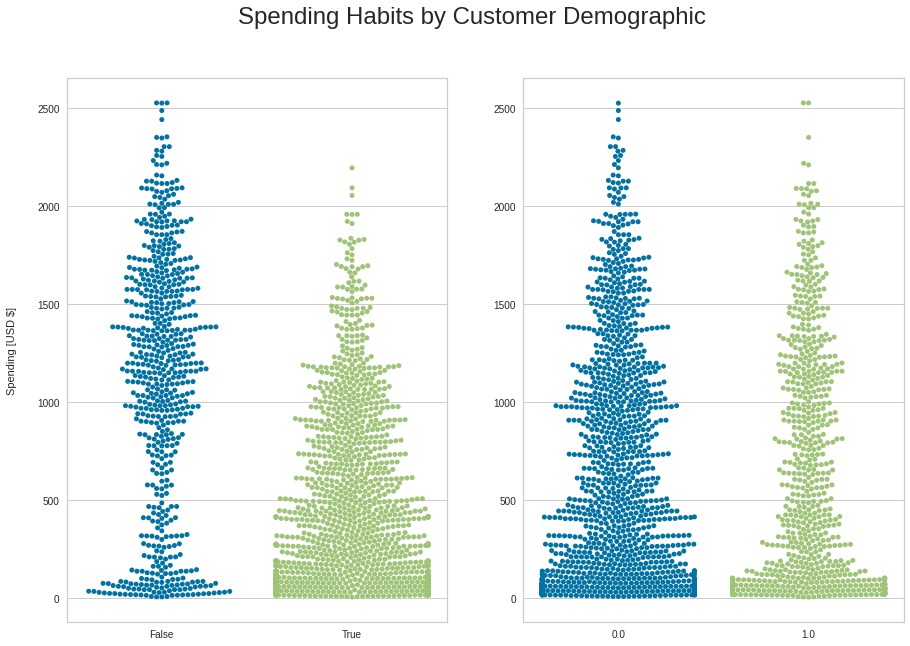

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,10))
sb.swarmplot(ax = ax[0], x = cleanD.Has_Child, y = cleanD.total_spending)
sb.swarmplot(ax = ax[1], x = cleanD.Relationship_Status, y = cleanD.total_spending)

ax[0].set_ylabel("Spending [USD $]", labelpad = 20)
ax[1].set_ylabel(None)

for i in [0,1]:
    ax[i].set_xlabel(None)

plt.suptitle("Spending Habits by Customer Demographic", fontsize = 24)

# K means Clustering Model For Junyang

In [ ]:
cleanD['total_spending']

0       1617.0
1         27.0
2        776.0
3         53.0
4        422.0
         ...  
2235    1341.0
2236     444.0
2237    1241.0
2238     843.0
2239     172.0
Name: total_spending, Length: 2240, dtype: float64

Date of data acquisation:
24-July-2021
(Fake)


In [ ]:
cleanD['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

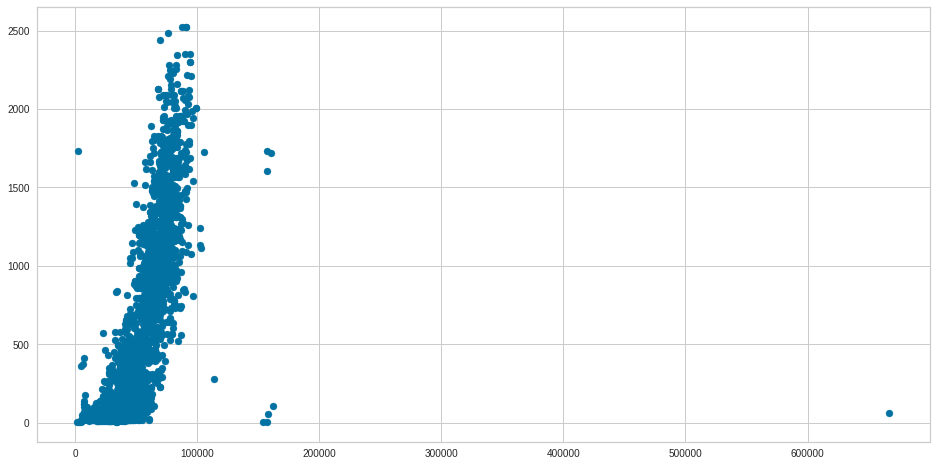

In [ ]:
X = pd.DataFrame(cleanD[["Income", "total_spending"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Income", y = "total_spending", data = X)
#Probably  need label

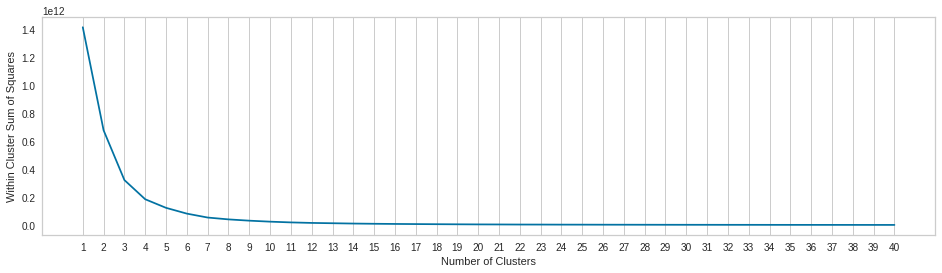

In [ ]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(cleanD.dropna()[["Income", "total_spending"]])

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

number of clusters chosen= 4

Features 	Total Spending 	Income

Cluster 0:	28444.82	94.44	
Cluster 1:	76872.71	1282.81	
Cluster 2:	666666.0	62.0	
Cluster 3:	52321.35	494.94	

Within Cluster Sum of Squares : 184394190622.94998



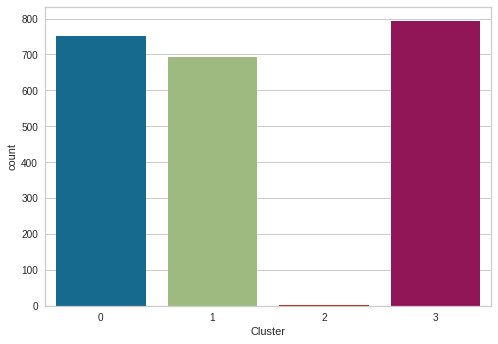

In [ ]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
print("Features", "\tTotal Spending", "\tIncome")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

As we can see the clusters are not evenly distributed due to outliers, hence we remove them

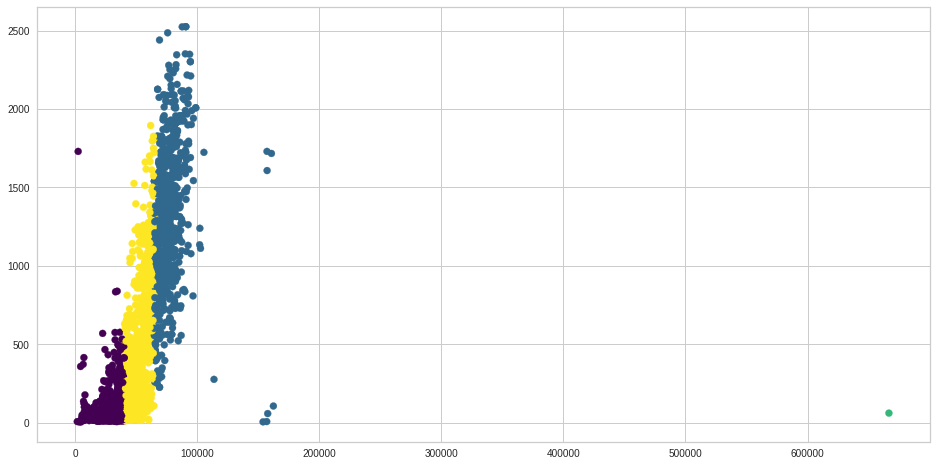

In [ ]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Income", y = "total_spending", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [ ]:
def dropAb(cluster):
  if cluster==2:
    return True
  return False

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
num_neighbours= 15
frac_ab= 0.005
lof = LocalOutlierFactor(n_neighbors = num_neighbours, contamination = frac_ab)
lof.fit(X)

LocalOutlierFactor(contamination=0.005, n_neighbors=15)

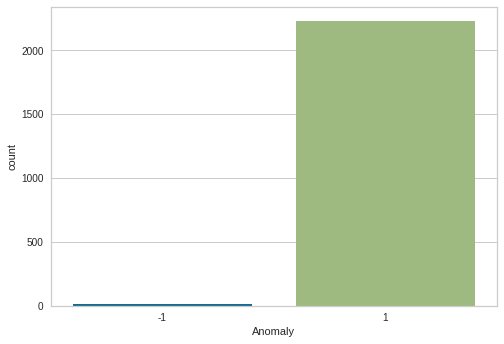

In [ ]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

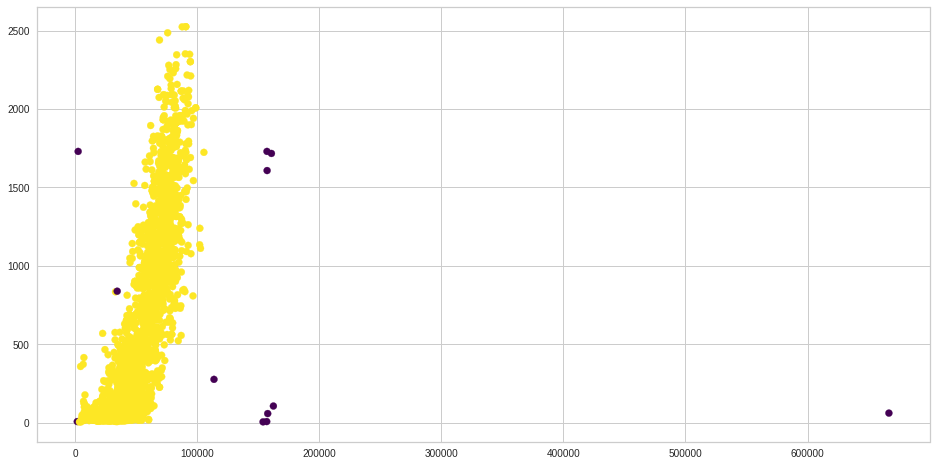

In [ ]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Income", y = "total_spending", c = "Anomaly", cmap = 'viridis', data = X_labeled)

In [ ]:
remove= X_labeled[X_labeled.Anomaly==1]

Features 	Total Spending 	Income

Cluster 0:	60530.07	771.53	1.0	
Cluster 1:	23340.32	70.08	1.0	
Cluster 2:	79195.58	1388.65	1.0	
Cluster 3:	41386.98	208.36	1.0	

Within Cluster Sum of Squares : 79766889035.56403



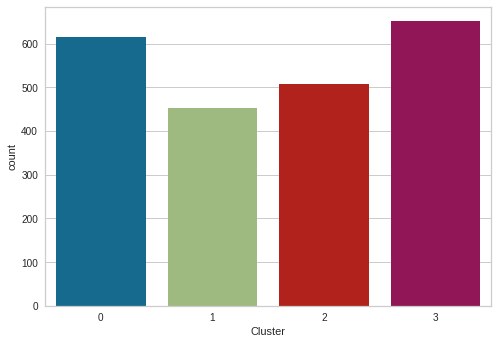

In [ ]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)

# Fit the Clustering Model on the Data
kmeans.fit(remove)

# Print the Cluster Centers
print("Features", "\tTotal Spending", "\tIncome")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(remove)

# Append Labels to the Data
remove_labeled = remove.copy()
remove_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=remove_labeled["Cluster"])

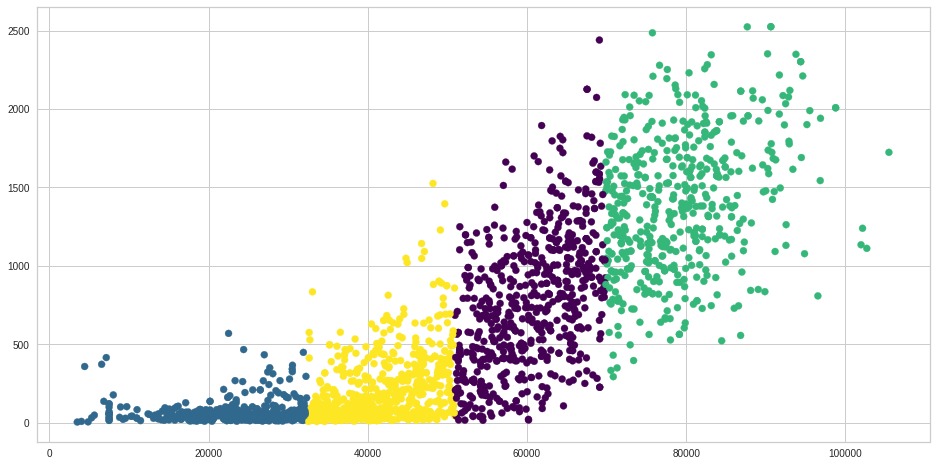

In [ ]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Income", y = "total_spending", c = "Cluster", cmap = 'viridis', data = remove_labeled)

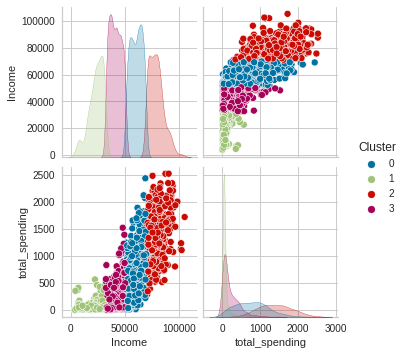

In [ ]:
# Plot the Clusters on 2D grids
sb.pairplot(remove_labeled, vars = X.columns.values, hue = "Cluster")

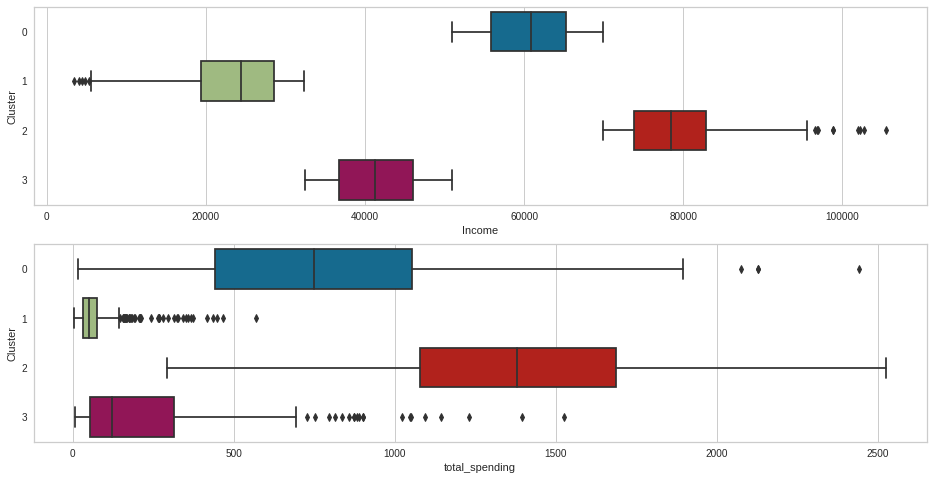

In [ ]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'Income', y = 'Cluster', data = remove_labeled, ax = axes[0])
sb.boxplot(x = 'total_spending', y = 'Cluster', data = remove_labeled, ax = axes[1])


Clusters according to their income and their corresponding total_spending boxplots

# K means Clustering Model with all the Numerical variables - Tan Si Xuan

In [ ]:
NumData = pd.DataFrame(cleanD.dropna()[["Income","daysOfEnrollment", "total_spending","Children","Age"]])
NumData.head()


Income  daysOfEnrollment  total_spending  Children   Age
0  58138.0            3245.0          1617.0       0.0  64.0
1  46344.0            2695.0            27.0       2.0  67.0
2  71613.0            2894.0           776.0       0.0  56.0
3  26646.0            2721.0            53.0       1.0  37.0
4  58293.0            2743.0           422.0       1.0  40.0

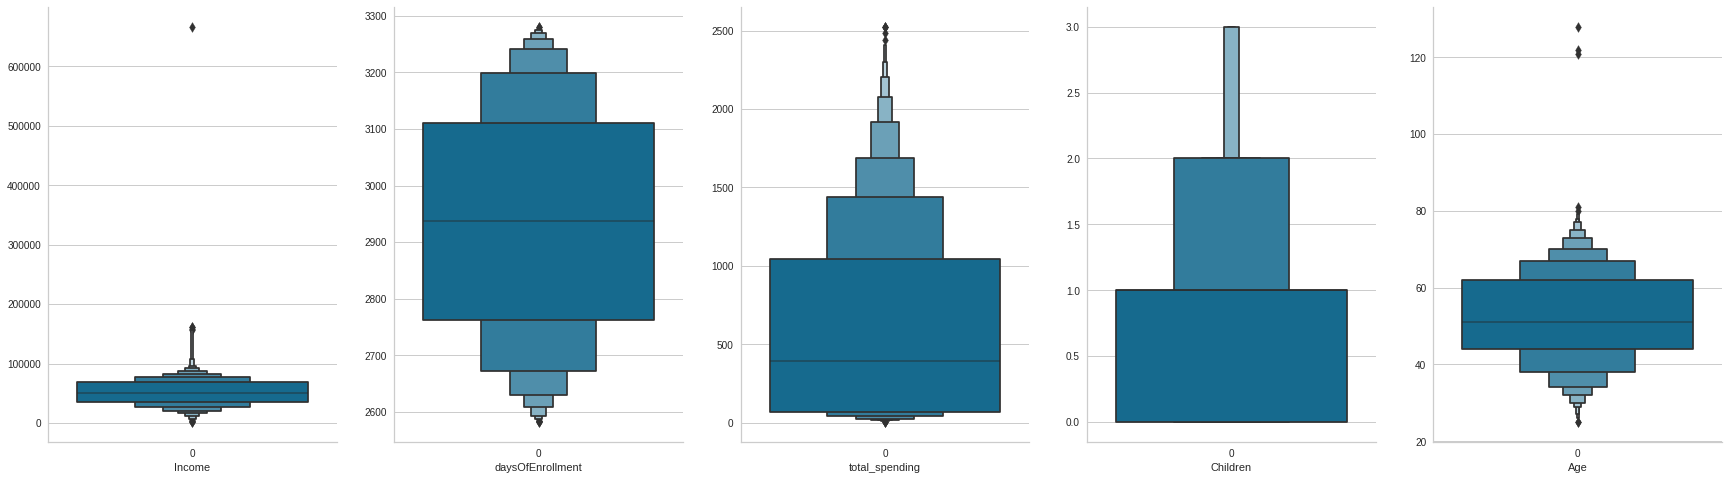

In [ ]:
# Check the distribution of values in the dataset using boxenplot
# We can see that there are outliers in Income and Age
features= ["Income", "daysOfEnrollment", "total_spending", "Children", "Age"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sb.boxenplot(data=NumData[features[i]],
                showfliers=True,
                ax=axs[i]).set(xlabel=features[i])
sb.despine()

In [ ]:
# We remove data where customers are older than 100y/o and income that is higher than 120000.
# These data points are removed so that they do not affect the centroids.
NumData = NumData[NumData.Age < 100]
NumData = NumData[NumData.Income < 120000]

In [ ]:
#K-means is an unsupervised algorithm and divides the numerical data into clusters that share similarites. Data does not have to be identified to be of a certain characteristic.

In [ ]:
#calculate distortions for different values of k (number of clusters)
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(NumData)
    distortions.append(kmeanModel.inertia_)

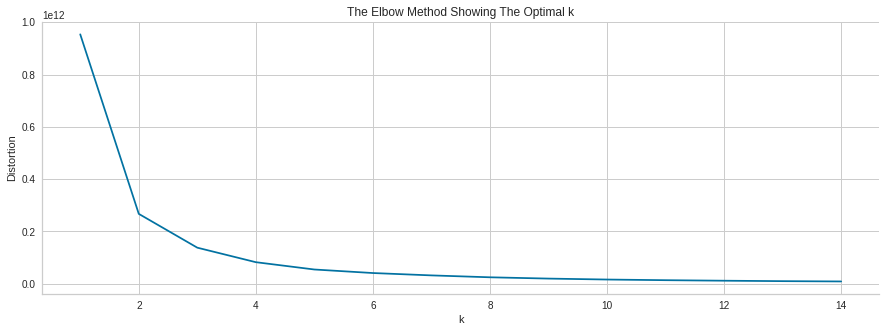

In [ ]:
#plot elbow graph to find optimal number of cluster,k
plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
sb.despine()
plt.show()

In [ ]:
# Set "optimal" Clustering Parameters
# Since we want to have a few clusters such that different incentives can be catered to the different groups, we set number of clusters to be 4.
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,
               init = init_algo,
               n_init = 20)

# Fit the Clustering Model on the Data
kmeans.fit(NumData)

KMeans(n_clusters=4, n_init=20)

Features 	Income 		daysOfEnrollment 	total_spending 			Children 		Age

Cluster 0:	41444.8			2925.7			209.4			1.3			52.4			
Cluster 1:	79554.2			2921.1			1390.0			0.3			53.2			
Cluster 2:	23186.4			2945.2			73.6			1.0			46.4			
Cluster 3:	60881.1			2951.3			790.8			1.0			55.1			

Within Cluster Sum of Squares : 81944714228.55415



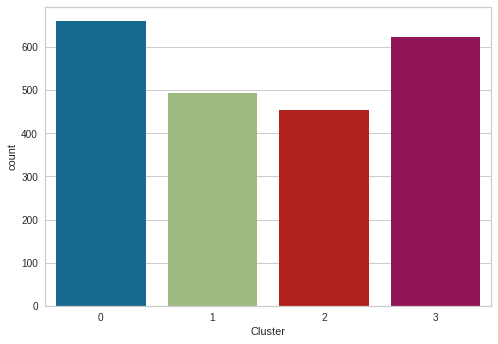

In [ ]:
# Print the Cluster Centers
print("Features","\tIncome", "\t\tdaysOfEnrollment", "\ttotal_spending", "\t\t\tChildren", "\t\tAge")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 1), end="\t\t\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(NumData)

# Append Labels to the Data
NumData_labeled = NumData.copy()
NumData_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=NumData_labeled["Cluster"])

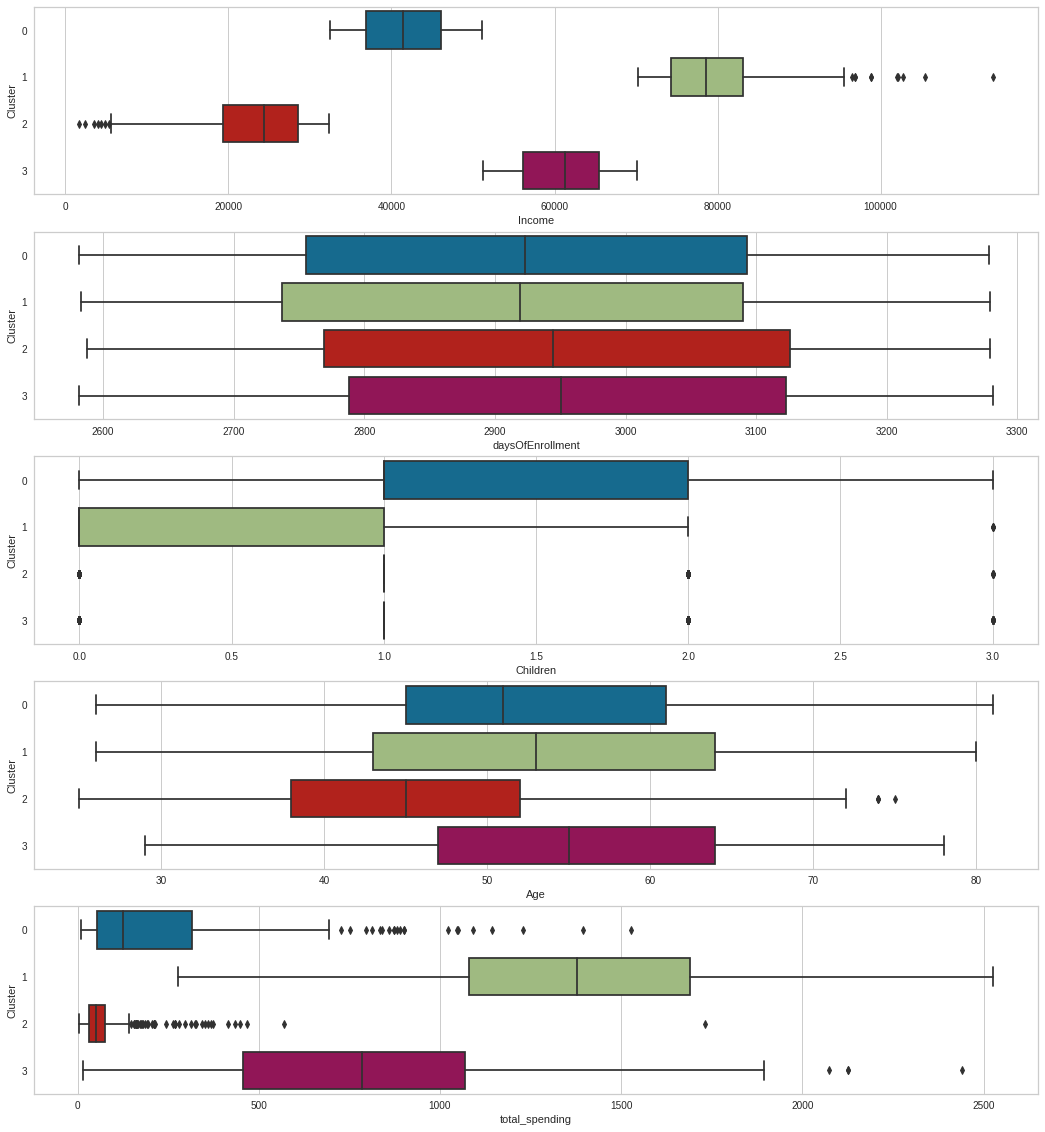

In [ ]:
# Boxplots for all Features against the Clusters
# Based on the boxplot, we can segregate the customer into 4 groups based on income and total spendings
# Cluster 0, Gold: high income, high spending
# Cluster 1, Silver: low income, low spending
# Cluster 2, Bronze: lowest income, lowest spending
# Cluster 3, Platinum: highest income, highest spending

f, axes = plt.subplots(5, 1, figsize=(18,20))
sb.boxplot(x = 'Income', y = 'Cluster', data = NumData_labeled, ax = axes[0])
sb.boxplot(x = 'daysOfEnrollment', y = 'Cluster', data = NumData_labeled, ax = axes[1])
sb.boxplot(x = 'Children', y = 'Cluster', data = NumData_labeled, ax = axes[2])
sb.boxplot(x = 'Age', y = 'Cluster', data = NumData_labeled, ax = axes[3])
sb.boxplot(x = 'total_spending', y = 'Cluster', data = NumData_labeled, ax = axes[4])

In [ ]:
# Data Exploration based on clusters

In [ ]:
NumData_labeled.Cluster = NumData_labeled.Cluster.replace({0: 'Gold', 1: 'Silver', 2: 'Bronze', 3: 'Platinum'})

cleanD['Cluster'] = NumData_labeled.Cluster

In [ ]:
# Distribution of customers in each cluster using pie plot
# Pie plot can show clearly the proportion of customer in each cluster.
# We can see that most customer falls in Gold and Silver section.

import plotly.express as px
cluster_counts = cleanD.Cluster.value_counts()

fig = px.pie(cluster_counts,
             values = cluster_counts.values,
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.BuPu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

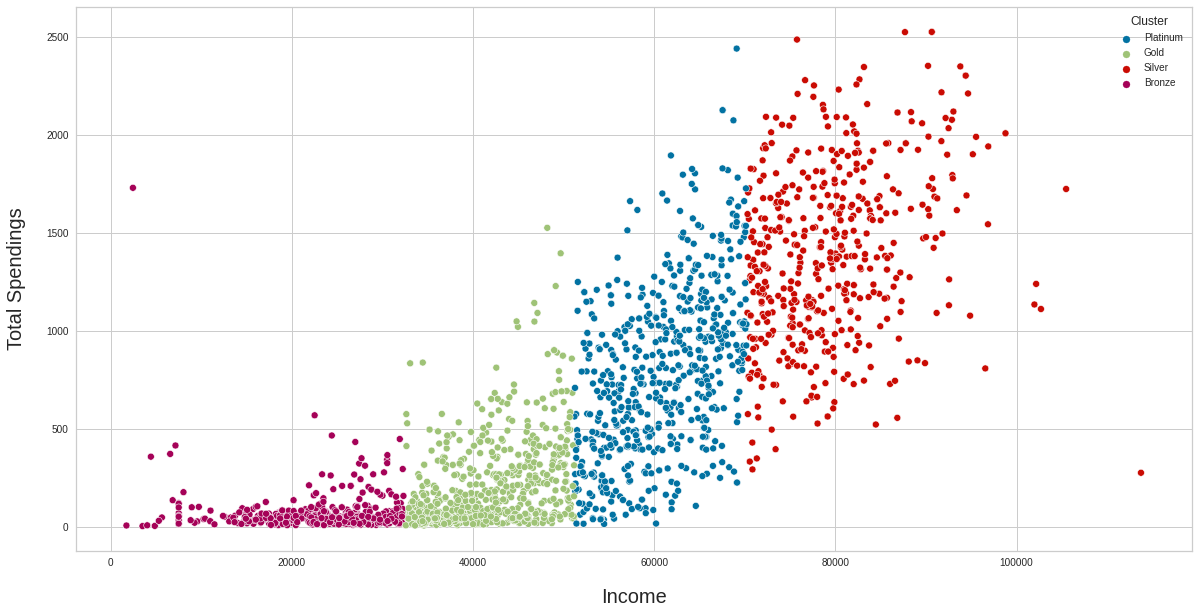

In [ ]:
# The 4 clusters can be seen distinctively from one another in the income against total spendings scatter plot distribution
plt.figure(figsize=(20,10))
sb.scatterplot(data=cleanD, x='Income', y='total_spending', hue='Cluster');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

<Figure size 2160x1080 with 0 Axes>

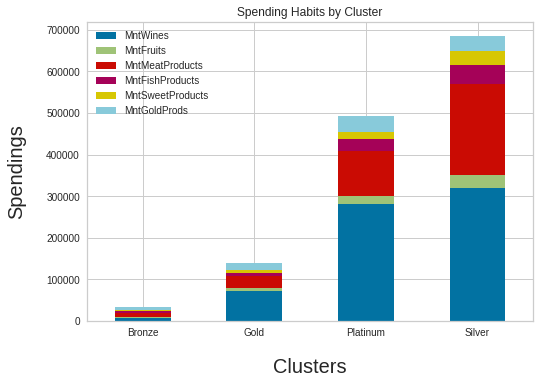

In [ ]:
# Stacked bar plot can show the proportions of spending on each products and the total spendings.
cluster_spendings = cleanD.groupby('Cluster')[['MntWines', 'MntFruits','MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 2160x1080 with 0 Axes>

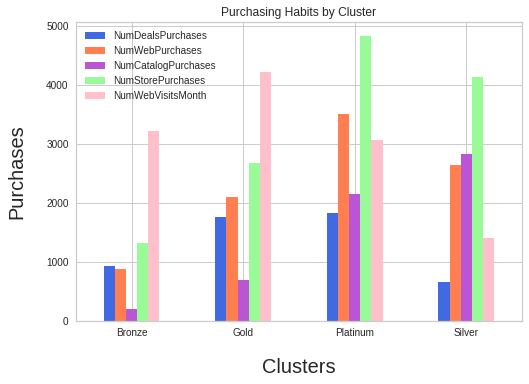

In [ ]:
# Grouped bar chart can show us the number of purchase location and deals purchase of each cluster.
# Gold and Platinum customer purchase more in store
# Bronze and Silver purchase more on web
cluster_purchases = cleanD.groupby('Cluster')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['royalblue', 'coral', 'mediumorchid', 'palegreen', 'pink'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 2160x1080 with 0 Axes>

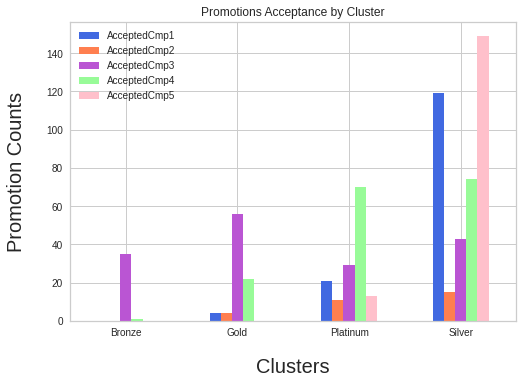

In [ ]:
# Grouped bar chart can show use the number of accepted campaigns in each cluster.
# Platinum is the most receptive to campaigns
cluster_campaign = cleanD.groupby('Cluster')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                                  'AcceptedCmp5']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['royalblue', 'coral', 'mediumorchid', 'palegreen', 'pink'])

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

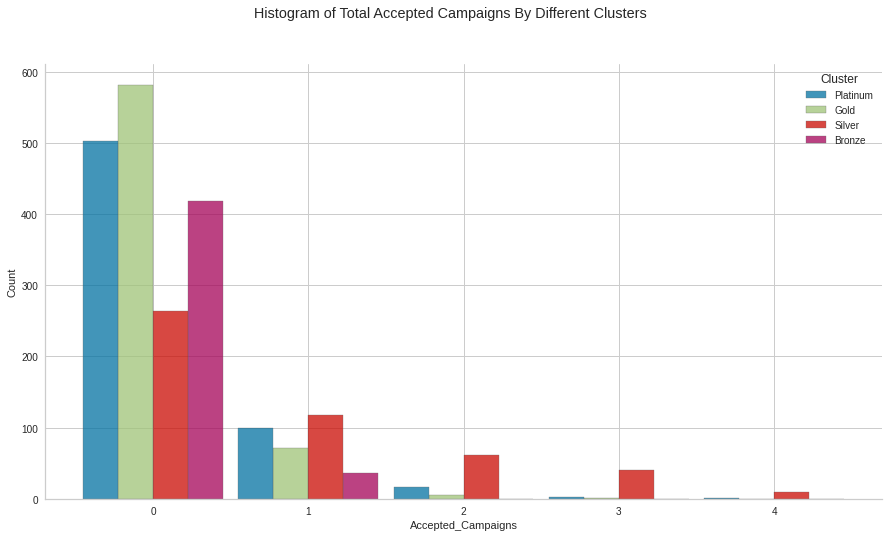

In [ ]:
# Use histrogram to see the overall receptiveness to campaigns.
# Majority of customers in each cluster did not accept any campaigns.
cleanD["Accepted_Campaigns"]= cleanD["AcceptedCmp1"]+cleanD["AcceptedCmp2"]+cleanD["AcceptedCmp3"]+cleanD["AcceptedCmp4"]+cleanD["AcceptedCmp5"]
f= plt.figure(figsize=(15, 8))
f.suptitle("Histogram of Total Accepted Campaigns By Different Clusters")
sb.histplot(cleanD, x="Accepted_Campaigns", hue= "Cluster", multiple="dodge", edgecolor=".4", discrete= True, shrink= .9)
sb.despine()

# K modes Clustering Model with all the categorical variables - Kyaw Tun Khine

Since K-Modes only takes in categorical variable we would need to encode our values with one hot encoding

We would need to redo the imputation and encoding process here

In [ ]:
#Encoding in Python
#We should only use one hot encoding for nominal variables, this is because we cannot assume being married is better than not being marries
#We are using one hot encoding for nominal variables
#We should only use label encoding for ordinal variable which assigned 0 to In relationshiop and 1 to not in relationshipo
#https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd#:~:text=One%2DHot%20Encoding%20in%20Python&text=OneHotEncoder%20from%20SciKit%20library%20only,apply%20OneHotEncoder%20on%20column%20Bridge_Types_Cat.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#One-hot encoding can be used to transform one or more categorical features into numerical dummy features useful for training machine learning model.
#There maybe a case of multicollinearity caused by the dummy variable trap and thus we would be dropping the first category per feature
#The first category is the baseline reference
#https://parulpandey.com/2021/06/24/beware-of-the-dummy-variable-trap-in-pandas/

encoder = OneHotEncoder(drop="first")

encoded_feature_arr = encoder.fit_transform(cleaningDataOneHot.loc[:,cVarToBeEncoded]).toarray()

features = encoder.categories_
print(features[0])
feature_labels = np.concatenate((features[0][1:],features[1][1:]))
print(feature_labels)

encodedDF = pd.DataFrame(encoded_feature_arr, columns=feature_labels)
print(encodedDF)

cleaningDataOneHot.drop(cVarToBeEncoded,axis=1,inplace=True)
cleaningDataOneHot = pd.concat([cleaningDataOneHot, encodedDF], axis=1)
cleaningDataOneHot.head(7)

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
['Basic' 'Graduation' 'Master' 'PhD' 'Not in relationship']
      Basic  Graduation  Master  PhD  Not in relationship
0       0.0         1.0     0.0  0.0                  1.0
1       0.0         1.0     0.0  0.0                  1.0
2       0.0         1.0     0.0  0.0                  0.0
3       0.0         1.0     0.0  0.0                  0.0
4       0.0         0.0     0.0  1.0                  0.0
...     ...         ...     ...  ...                  ...
2235    0.0         1.0     0.0  0.0                  0.0
2236    0.0         0.0     0.0  1.0                  0.0
2237    0.0         1.0     0.0  0.0                  1.0
2238    0.0         0.0     1.0  0.0                  0.0
2239    0.0         0.0     0.0  1.0                  0.0

[2240 rows x 5 columns]


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   
5  62513.0        0         1       16       520         42               98   
6  55635.0        0         1       34       235         65              164   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp2  \
0              172                88            88  ...             0   
1                2                 1             6  ...             0   
2              111                21            42  ...             0   
3               10                 3             5  ...             0   
4               46                27            15  ...             0   
5                0                42            14  ...             0   
6               50                49            27  ...             0   

   Complain  Response  daysOfEnrollment  Age_Category Basic Graduation Master  \
0         0         1              3245            64   0.0        1.0    0.0   
1         0         0              2695            67   0.0        1.0    0.0   
2         0         0              2894            56   0.0        1.0    0.0   
3         0         0              2721            37   0.0        1.0    0.0   
4         0         0              2743            40   0.0        0.0    0.0   
5         0         0              2875            54   0.0        0.0    1.0   
6         0         0              3175            50   0.0        1.0    0.0   

   PhD Not in relationship  
0  0.0                 1.0  
1  0.0                 1.0  
2  0.0                 0.0  
3  0.0                 0.0  
4  1.0                 0.0  
5  0.0                 0.0  
6  0.0                 1.0  

[7 rows x 29 columns]

In [ ]:
#Imputation of data with mean for continous data, mode for categorical or use model to estimate the value
#If we were to drop all missing data in dataset it would lead to bias effect, reduce efficency of ml model and affect the data distribution
#https://www.askpython.com/python/examples/impute-missing-data-values

#Can use imputer from sklearn to imputate the values got other libraries also
#https://scikit-learn.org/stable/modules/impute.html
#But imputing with mean also got its flaws like reducing the standard error all this

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
#use panda's get dummy to create dummy variables or use sklearn's one hot encoding

#What is multivariate imputatioon?
#Say there is 4 columns 1 has missing values, that 1 column is the outcome the rest are use as variables in a regressor model to predict missing value, which is income in this case
#This is done for each feature and then repeated for 3 specificed iterations
#What is BayeisanRidge Regression?
# it allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates
#BayseianRidge - regularise linear regression with a regularization parameter L, meaning that it has a lower chance of overfitting as compared to linear regression



imputer = IterativeImputer(estimator = BayesianRidge() , max_iter=3)
imputer.fit(cleaningDataOneHot)
imputedData = imputer.transform(cleaningDataOneHot)

cleanDoh =  pd.DataFrame(imputedData,columns=list(cleaningDataOneHot.columns))
cleanDoh.info()
cleanDoh

#cleanDoh is the new Dataframe with all the missing value estimated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   Kidhome              2240 non-null   float64
 2   Teenhome             2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   MntWines             2240 non-null   float64
 5   MntFruits            2240 non-null   float64
 6   MntMeatProducts      2240 non-null   float64
 7   MntFishProducts      2240 non-null   float64
 8   MntSweetProducts     2240 non-null   float64
 9   MntGoldProds         2240 non-null   float64
 10  NumDealsPurchases    2240 non-null   float64
 11  NumWebPurchases      2240 non-null   float64
 12  NumCatalogPurchases  2240 non-null   float64
 13  NumStorePurchases    2240 non-null   float64
 14  NumWebVisitsMonth    2240 non-null   float64
 15  AcceptedCmp3         2240 non-null   f

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0      0.0       0.0     58.0     635.0       88.0   
1     46344.0      1.0       1.0     38.0      11.0        1.0   
2     71613.0      0.0       0.0     26.0     426.0       49.0   
3     26646.0      1.0       0.0     26.0      11.0        4.0   
4     58293.0      1.0       0.0     94.0     173.0       43.0   
...       ...      ...       ...      ...       ...        ...   
2235  61223.0      0.0       1.0     46.0     709.0       43.0   
2236  64014.0      2.0       1.0     56.0     406.0        0.0   
2237  56981.0      0.0       0.0     91.0     908.0       48.0   
2238  69245.0      0.0       1.0      8.0     428.0       30.0   
2239  52869.0      1.0       1.0     40.0      84.0        3.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0               546.0            172.0              88.0          88.0  ...   
1                 6.0              2.0               1.0           6.0  ...   
2               127.0            111.0              21.0          42.0  ...   
3                20.0             10.0               3.0           5.0  ...   
4               118.0             46.0              27.0          15.0  ...   
...               ...              ...               ...           ...  ...   
2235            182.0             42.0             118.0         247.0  ...   
2236             30.0              0.0               0.0           8.0  ...   
2237            217.0             32.0              12.0          24.0  ...   
2238            214.0             80.0              30.0          61.0  ...   
2239             61.0              2.0               1.0          21.0  ...   

      AcceptedCmp2  Complain  Response  daysOfEnrollment  Age_Category  Basic  \
0              0.0       0.0       1.0            3245.0          64.0    0.0   
1              0.0       0.0       0.0            2695.0          67.0    0.0   
2              0.0       0.0       0.0            2894.0          56.0    0.0   
3              0.0       0.0       0.0            2721.0          37.0    0.0   
4              0.0       0.0       0.0            2743.0          40.0    0.0   
...            ...       ...       ...               ...           ...    ...   
2235           0.0       0.0       0.0            2963.0          54.0    0.0   
2236           0.0       0.0       0.0            2601.0          75.0    0.0   
2237           0.0       0.0       0.0            2737.0          40.0    0.0   
2238           0.0       0.0       0.0            2738.0          65.0    0.0   
2239           0.0       0.0       1.0            3204.0          67.0    0.0   

      Graduation  Master  PhD  Not in relationship  
0            1.0     0.0  0.0                  1.0  
1            1.0     0.0  0.0                  1.0  
2            1.0     0.0  0.0                  0.0  
3            1.0     0.0  0.0                  0.0  
4            0.0     0.0  1.0                  0.0  
...          ...     ...  ...                  ...  
2235         1.0     0.0  0.0                  0.0  
2236         0.0     0.0  1.0                  0.0  
2237         1.0     0.0  0.0                  1.0  
2238         0.0     1.0  0.0                  0.0  
2239         0.0     0.0  1.0                  0.0  

[2240 rows x 29 columns]

In [ ]:
#https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system used this data to categorise the various income levels in USA
#Max income in this dataset is 666666
#So we are creating a new categorical variable that classifies the customers into their income streams- Low, middle or high vcome
cleanDoh["IncomeLevel"] = pd.cut(cleanDoh["Income"],[0,52200,156600,700000],labels=["Low Income","Middle Income","High Income"],include_lowest=True)
print(cleanDoh.head(20))
cleanDoh.info()

          Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0   58138.000000      0.0       0.0     58.0     635.0       88.0   
1   46344.000000      1.0       1.0     38.0      11.0        1.0   
2   71613.000000      0.0       0.0     26.0     426.0       49.0   
3   26646.000000      1.0       0.0     26.0      11.0        4.0   
4   58293.000000      1.0       0.0     94.0     173.0       43.0   
5   62513.000000      0.0       1.0     16.0     520.0       42.0   
6   55635.000000      0.0       1.0     34.0     235.0       65.0   
7   33454.000000      1.0       0.0     32.0      76.0       10.0   
8   30351.000000      1.0       0.0     19.0      14.0        0.0   
9    5648.000000      1.0       1.0     68.0      28.0        0.0   
10  31219.727573      1.0       0.0     11.0       5.0        5.0   
11   7500.000000      0.0       0.0     59.0       6.0       16.0   
12  63033.000000      0.0       0.0     82.0     194.0       61.0   
13  59354.000000      1.0       1.

In [ ]:
# Add in total spendings
mnt= ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds" ]
cleanDoh = cleanDoh.assign(total_spending=0)
for i in mnt:
  cleanDoh['total_spending']= cleanDoh['total_spending']+ cleanDoh[i]

In [ ]:
#Function to group different age groups
def f(age):
    if age < 24:
        return 'Young'
    elif age <=55:
        return 'Adult'
    elif age >= 56:
        return 'Elder'

In [ ]:
#Renaming Age to Age_Category and applying function f defined in processing stage
cleanDoh.rename(columns={'Age_Category':'Age'}, inplace=True)
cleanDoh["Children"] = cleanDoh.Kidhome + cleanDoh.Teenhome
cleanDoh['Has_Child'] = cleanDoh['Children'].apply(Has_Child)
cleanDoh['Age_Category']=cleanDoh['Age'].apply(f)
cleanDoh

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0      0.0       0.0     58.0     635.0       88.0   
1     46344.0      1.0       1.0     38.0      11.0        1.0   
2     71613.0      0.0       0.0     26.0     426.0       49.0   
3     26646.0      1.0       0.0     26.0      11.0        4.0   
4     58293.0      1.0       0.0     94.0     173.0       43.0   
...       ...      ...       ...      ...       ...        ...   
2235  61223.0      0.0       1.0     46.0     709.0       43.0   
2236  64014.0      2.0       1.0     56.0     406.0        0.0   
2237  56981.0      0.0       0.0     91.0     908.0       48.0   
2238  69245.0      0.0       1.0      8.0     428.0       30.0   
2239  52869.0      1.0       1.0     40.0      84.0        3.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0               546.0            172.0              88.0          88.0  ...   
1                 6.0              2.0               1.0           6.0  ...   
2               127.0            111.0              21.0          42.0  ...   
3                20.0             10.0               3.0           5.0  ...   
4               118.0             46.0              27.0          15.0  ...   
...               ...              ...               ...           ...  ...   
2235            182.0             42.0             118.0         247.0  ...   
2236             30.0              0.0               0.0           8.0  ...   
2237            217.0             32.0              12.0          24.0  ...   
2238            214.0             80.0              30.0          61.0  ...   
2239             61.0              2.0               1.0          21.0  ...   

      Basic  Graduation  Master  PhD  Not in relationship    IncomeLevel  \
0       0.0         1.0     0.0  0.0                  1.0  Middle Income   
1       0.0         1.0     0.0  0.0                  1.0     Low Income   
2       0.0         1.0     0.0  0.0                  0.0  Middle Income   
3       0.0         1.0     0.0  0.0                  0.0     Low Income   
4       0.0         0.0     0.0  1.0                  0.0  Middle Income   
...     ...         ...     ...  ...                  ...            ...   
2235    0.0         1.0     0.0  0.0                  0.0  Middle Income   
2236    0.0         0.0     0.0  1.0                  0.0  Middle Income   
2237    0.0         1.0     0.0  0.0                  1.0  Middle Income   
2238    0.0         0.0     1.0  0.0                  0.0  Middle Income   
2239    0.0         0.0     0.0  1.0                  0.0  Middle Income   

      total_spending  Children  Has_Child  Age_Category  
0             1617.0       0.0      False         Elder  
1               27.0       2.0       True         Elder  
2              776.0       0.0      False         Elder  
3               53.0       1.0       True         Adult  
4              422.0       1.0       True         Adult  
...              ...       ...        ...           ...  
2235          1341.0       1.0       True         Adult  
2236           444.0       3.0       True         Elder  
2237          1241.0       0.0      False         Adult  
2238           843.0       1.0       True         Elder  
2239           172.0       2.0       True         Elder  

[2240 rows x 34 columns]

In [ ]:
#Since we added extra categorical values such as Age_Category and IncomeLevel, we will know be encoding them using OneHotEncoding
encoder2 = OneHotEncoder(drop="first")
cVarToBeEncoded2 = ["Age_Category","IncomeLevel"]

encoded_feature_arr2 = encoder2.fit_transform(cleanDoh.loc[:,cVarToBeEncoded2]).toarray()

features2 = encoder2.categories_
print(features2[0])
feature_labels2 = np.concatenate((features2[0][1:],features2[1][1:]))
print(feature_labels2)

encodedDF2 = pd.DataFrame(encoded_feature_arr2, columns=feature_labels2)
print(encodedDF2)

cleanDoh.drop(cVarToBeEncoded2,axis=1,inplace=True)
cleanDoh = pd.concat([cleanDoh, encodedDF2], axis=1)
cleanDoh.head(7)
#Putting all the encoded categorical varaibles into 1 array
encoded_cat_vars = np.concatenate((feature_labels,feature_labels2))
print(encoded_cat_vars)

['Adult' 'Elder']
['Elder' 'Low Income' 'Middle Income']
      Elder  Low Income  Middle Income
0       1.0         0.0            1.0
1       1.0         1.0            0.0
2       1.0         0.0            1.0
3       0.0         1.0            0.0
4       0.0         0.0            1.0
...     ...         ...            ...
2235    0.0         0.0            1.0
2236    1.0         0.0            1.0
2237    0.0         0.0            1.0
2238    1.0         0.0            1.0
2239    1.0         0.0            1.0

[2240 rows x 3 columns]
['Basic' 'Graduation' 'Master' 'PhD' 'Not in relationship' 'Elder'
 'Low Income' 'Middle Income']


In [ ]:
cleanDoh.info()
cleanDoh.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   Kidhome              2240 non-null   float64
 2   Teenhome             2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   MntWines             2240 non-null   float64
 5   MntFruits            2240 non-null   float64
 6   MntMeatProducts      2240 non-null   float64
 7   MntFishProducts      2240 non-null   float64
 8   MntSweetProducts     2240 non-null   float64
 9   MntGoldProds         2240 non-null   float64
 10  NumDealsPurchases    2240 non-null   float64
 11  NumWebPurchases      2240 non-null   float64
 12  NumCatalogPurchases  2240 non-null   float64
 13  NumStorePurchases    2240 non-null   float64
 14  NumWebVisitsMonth    2240 non-null   float64
 15  AcceptedCmp3         2240 non-null   f

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52231.983569     0.444196     0.506250    49.109375   303.935714   
std     25102.239095     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    23.750000   
50%     51301.000000     0.000000     0.000000    49.000000   173.500000   
75%     68468.250000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  ...        Basic   Graduation       Master          PhD  \
count   2240.000000  ...  2240.000000  2240.000000  2240.000000  2240.000000   
mean      44.021875  ...     0.024107     0.503125     0.165179     0.216964   
std       52.167439  ...     0.153416     0.500102     0.371425     0.412270   
min        0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%        9.000000  ...     0.000000     0.000000     0.000000     0.000000   
50%       24.000000  ...     0.000000     1.000000     0.000000     0.000000   
75%       56.000000  ...     0.000000     1.000000     0.000000     0.000000   
max      362.000000  ...     1.000000     1.000000     1.000000     1.000000   

       Not in relationship  total_spending     Children        Elder  \
count          2240.000000     2240.000000  2240.000000  2240.000000   
mean              0.355357      605.798214     0.950446     0.383929   
std               0.478728      602.249288     0.751803     0.486449   
min               0.000000        5.000000     0.000000     0.000000   
25%               0.000000       68.750000     0.000000     0.000000   
50%               0.000000      396.000000     1.000000     0.000000   
75%               1.000000     1045.500000     1.000000     1.000000   
max               1.000000     2525.000000     3.000000     1.000000   

        Low Income  Middle Income  
count  2240.000000    2240.000000  
mean      0.512054       0.484821  
std       0.499966       0.499881  
min       0.000000       0.000000  
25%       0.000000       0.000000  
50%       1.000000       0.000000  
75%       1.000000       1.000000  
max       1.000000       1.000000  

[8 rows x 34 columns]

In [ ]:
kmodes_data = cleanDoh.copy()
#Combining all the Categorical datatype for use, so relationship status, education, incomelevel, age_category.
#We extracted all the encoded values

cat_vars = ["Education,Relationship_Status","Age_Category","IncomeLevel"]
cat_data = cleanDoh.loc[:,encoded_cat_vars]
cat_data

Basic  Graduation  Master  PhD  Not in relationship  Elder  Low Income  \
0       0.0         1.0     0.0  0.0                  1.0    1.0         0.0   
1       0.0         1.0     0.0  0.0                  1.0    1.0         1.0   
2       0.0         1.0     0.0  0.0                  0.0    1.0         0.0   
3       0.0         1.0     0.0  0.0                  0.0    0.0         1.0   
4       0.0         0.0     0.0  1.0                  0.0    0.0         0.0   
...     ...         ...     ...  ...                  ...    ...         ...   
2235    0.0         1.0     0.0  0.0                  0.0    0.0         0.0   
2236    0.0         0.0     0.0  1.0                  0.0    1.0         0.0   
2237    0.0         1.0     0.0  0.0                  1.0    0.0         0.0   
2238    0.0         0.0     1.0  0.0                  0.0    1.0         0.0   
2239    0.0         0.0     0.0  1.0                  0.0    1.0         0.0   

      Middle Income  
0               1.0  
1               0.0  
2               1.0  
3               0.0  
4               1.0  
...             ...  
2235            1.0  
2236            1.0  
2237            1.0  
2238            1.0  
2239            1.0  

[2240 rows x 8 columns]

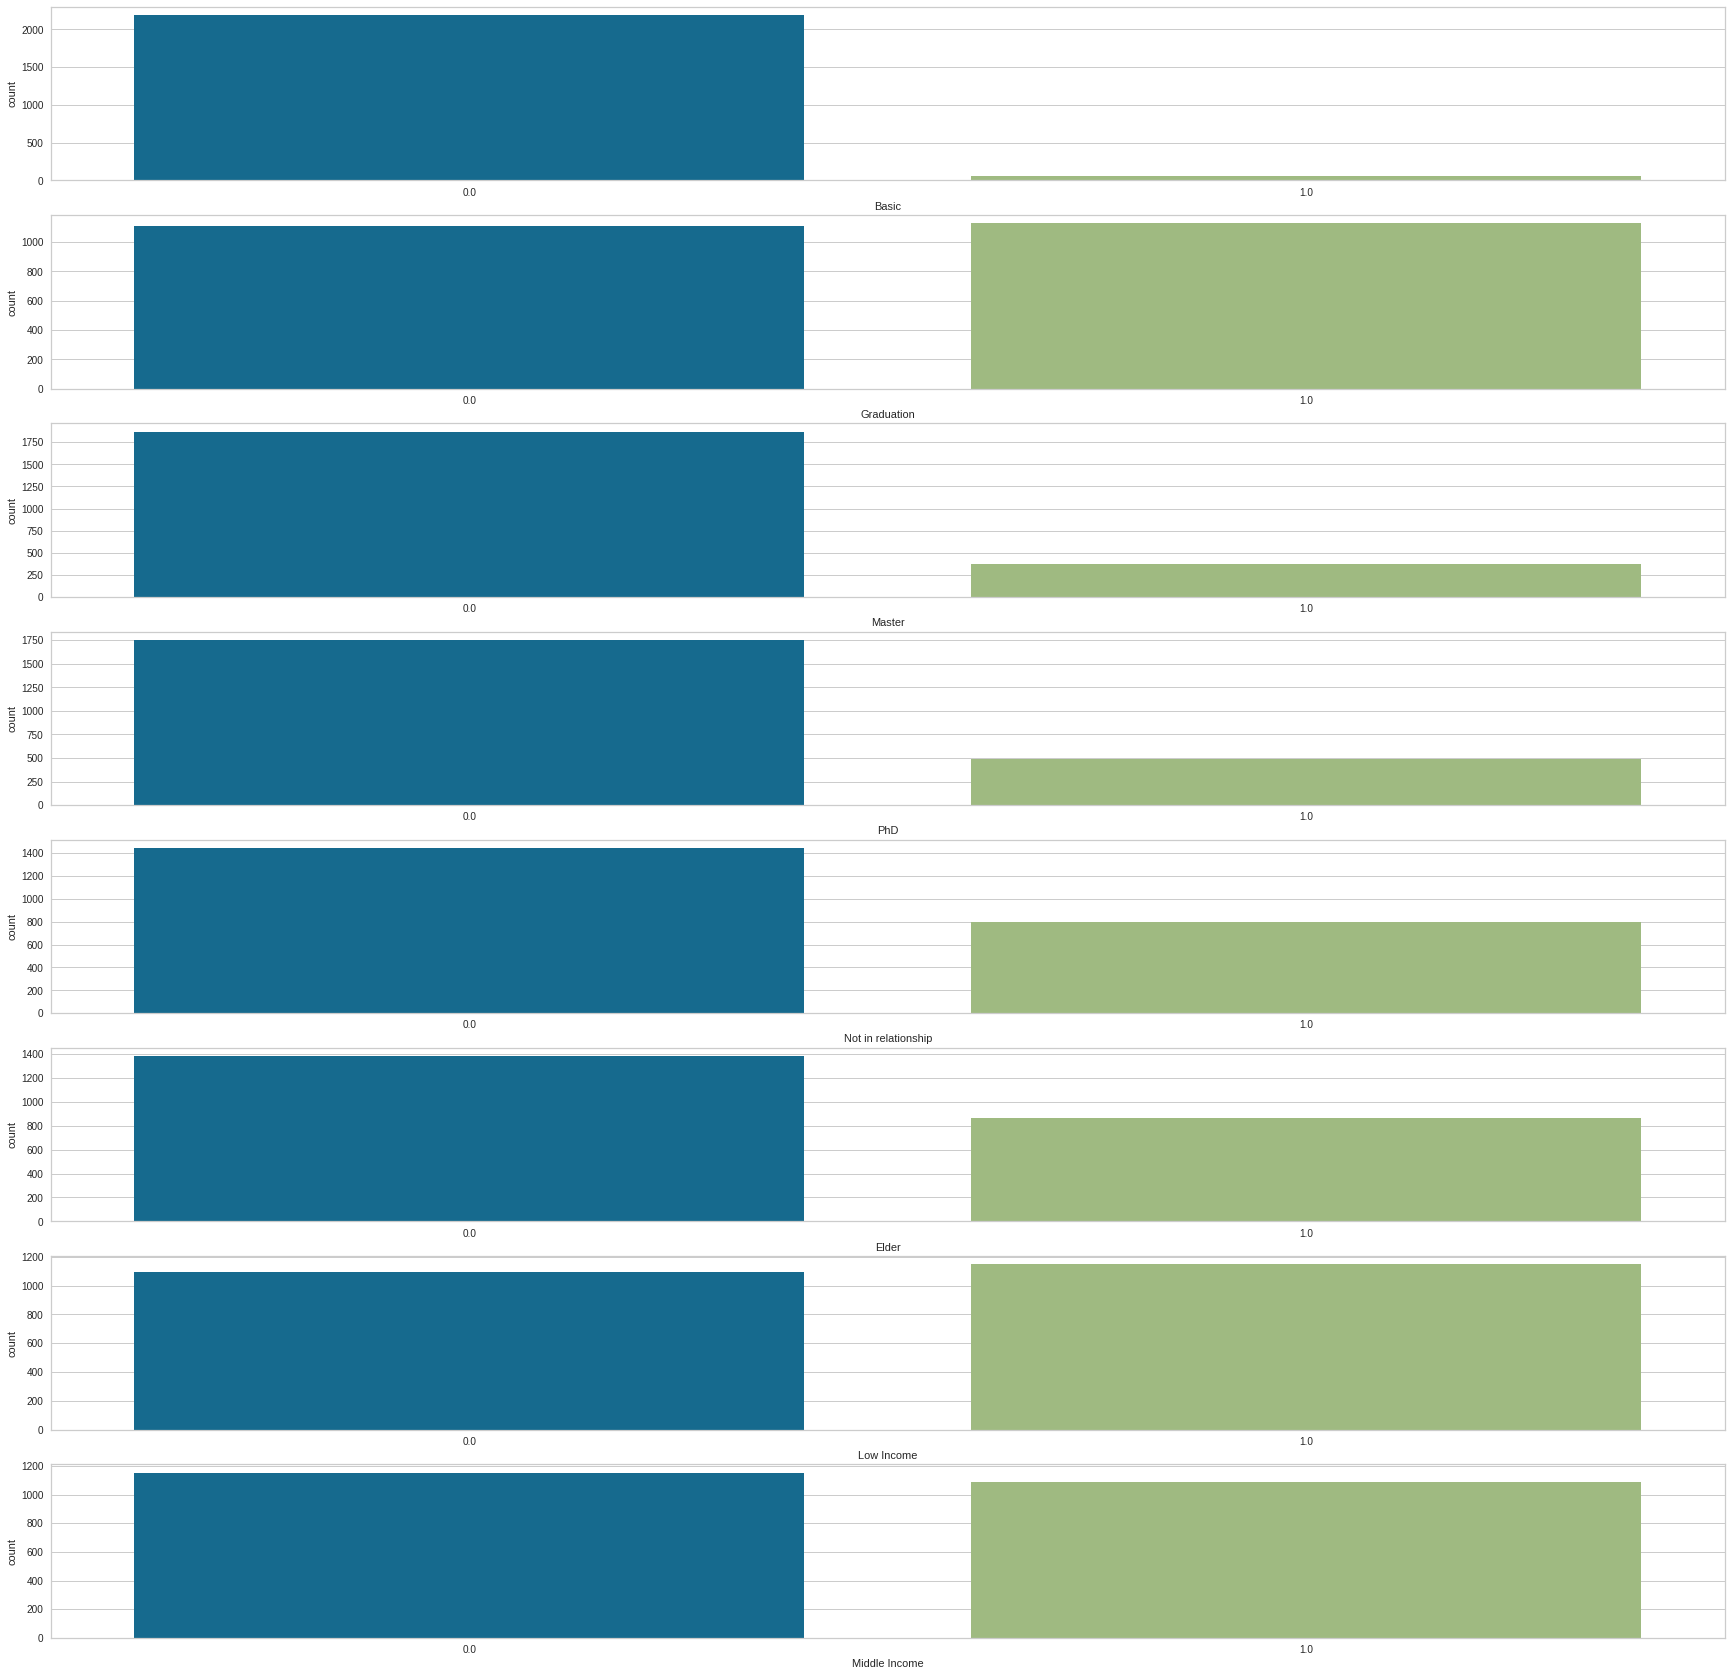

In [ ]:
#Visualising Data with count plot
fig,ax = plt.subplots(len(encoded_cat_vars),1,figsize=(30,30))
for i in range(len(encoded_cat_vars)):
  sb.countplot(x=cat_data[encoded_cat_vars[i]],ax=ax[i])

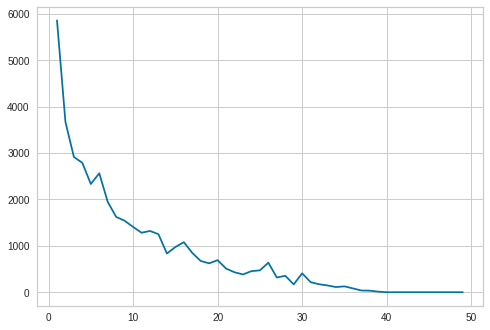

In [ ]:
cost = []
for num_clusters in list(range(1,50)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=0)
    kmode.fit_predict(cat_data)
    cost.append(kmode.cost_)
#Elbow Plot for Kmodes using the Huang initialisation
y = np.array([i for i in range(1,50)])
plt.plot(y,cost)

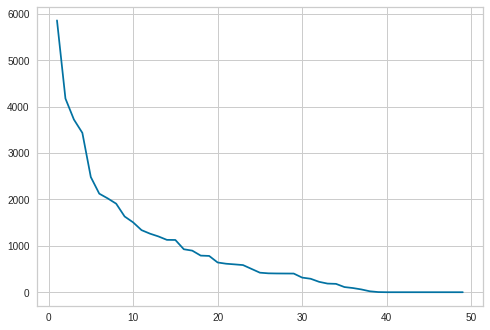

In [ ]:
cost = []
for num_clusters in list(range(1,50)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=0)
    kmode.fit_predict(cat_data)
    cost.append(kmode.cost_)

#Elbow Plot for Kmodes using the Cao initialisation
y = np.array([i for i in range(1,50)])
plt.plot(y,cost)

Both they the Huang Initialisation elbow plot did not give us any optimal cluster number.
Thus we will be using the and cao Initialisation elbow

In [ ]:
#We would be using the CAO initilisation wiht K modes
#Kmodes Clustering with cao initialisation
kmodes_cao = KModes(n_clusters=30, init = "Cao", n_init = 1, verbose=1)
#It defines clusters based on the number of matching categories between data points.
fitClusters_cao = kmodes_cao.fit_predict(cat_data)
# Predicted Clusters
fitClusters_cao
kmodes_data["Clusters"] = pd.DataFrame(fitClusters_cao)
kmodes_data.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 60, cost: 315.0


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0      0.0       0.0     58.0     635.0       88.0            546.0   
1  46344.0      1.0       1.0     38.0      11.0        1.0              6.0   
2  71613.0      0.0       0.0     26.0     426.0       49.0            127.0   
3  26646.0      1.0       0.0     26.0      11.0        4.0             20.0   
4  58293.0      1.0       0.0     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Master  PhD  \
0            172.0              88.0          88.0  ...     0.0  0.0   
1              2.0               1.0           6.0  ...     0.0  0.0   
2            111.0              21.0          42.0  ...     0.0  0.0   
3             10.0               3.0           5.0  ...     0.0  0.0   
4             46.0              27.0          15.0  ...     0.0  1.0   

   Not in relationship  total_spending  Children  Has_Child  Elder  \
0                  1.0          1617.0       0.0      False    1.0   
1                  1.0            27.0       2.0       True    1.0   
2                  0.0           776.0       0.0      False    1.0   
3                  0.0            53.0       1.0       True    0.0   
4                  0.0           422.0       1.0       True    0.0   

   Low Income  Middle Income  Clusters  
0         0.0            1.0        24  
1         1.0            0.0         9  
2         0.0            1.0         4  
3         1.0            0.0         0  
4         0.0            1.0        26  

[5 rows x 36 columns]

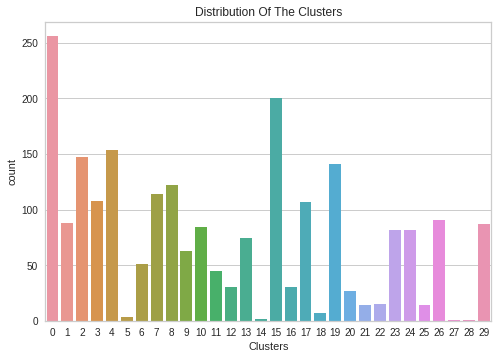

In [ ]:
#Count plot of k = 30 clusters
countplt = sb.countplot(x=kmodes_data["Clusters"])
countplt.set_title("Distribution Of The Clusters")
plt.show()

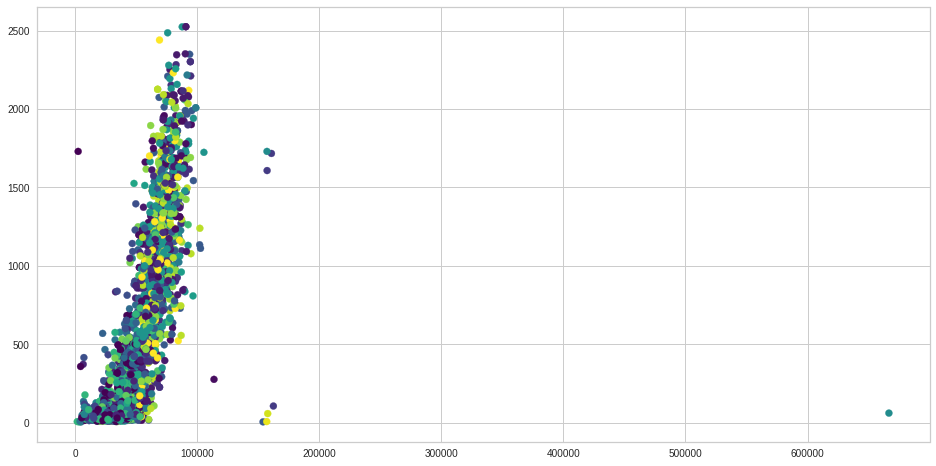

In [ ]:
#Visualising the k = 30 clusters with Scatter plot of Total_spending vs Income
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Income", y = "total_spending", c = "Clusters", cmap = 'viridis', data = kmodes_data)

Eventhough the elbow plot shows that the optimal cluster range is around to 30-50, there is still alot of overlap between the clusteres for K-modes and thus we believe that the dataset is not very good for clustering with K-modes.
Maybe the dataquality of the dataset is not suitable for k-modes

We believe that if we have too many clusters it would be really hard to interpret. So We kept K-modes at k = 4 to see how it would compare with K-Means , Which mean we would have 4 clusters to continue our analysis with K-modes

In [ ]:
#We would be using the CAO initilisation wiht K modes
kmodes_data.drop(["Clusters"], axis=1)
kmodes_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
#It defines clusters based on the number of matching categories between data points.
fitClusters_cao = kmodes_cao.fit_predict(cat_data)
# Predicted Clusters
fitClusters_cao
kmodes_data["Clusters"] = pd.DataFrame(fitClusters_cao)
kmodes_data.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3434.0


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0      0.0       0.0     58.0     635.0       88.0            546.0   
1  46344.0      1.0       1.0     38.0      11.0        1.0              6.0   
2  71613.0      0.0       0.0     26.0     426.0       49.0            127.0   
3  26646.0      1.0       0.0     26.0      11.0        4.0             20.0   
4  58293.0      1.0       0.0     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Master  PhD  \
0            172.0              88.0          88.0  ...     0.0  0.0   
1              2.0               1.0           6.0  ...     0.0  0.0   
2            111.0              21.0          42.0  ...     0.0  0.0   
3             10.0               3.0           5.0  ...     0.0  0.0   
4             46.0              27.0          15.0  ...     0.0  1.0   

   Not in relationship  total_spending  Children  Has_Child  Elder  \
0                  1.0          1617.0       0.0      False    1.0   
1                  1.0            27.0       2.0       True    1.0   
2                  0.0           776.0       0.0      False    1.0   
3                  0.0            53.0       1.0       True    0.0   
4                  0.0           422.0       1.0       True    0.0   

   Low Income  Middle Income  Clusters  
0         0.0            1.0         1  
1         1.0            0.0         0  
2         0.0            1.0         0  
3         1.0            0.0         0  
4         0.0            1.0         1  

[5 rows x 36 columns]

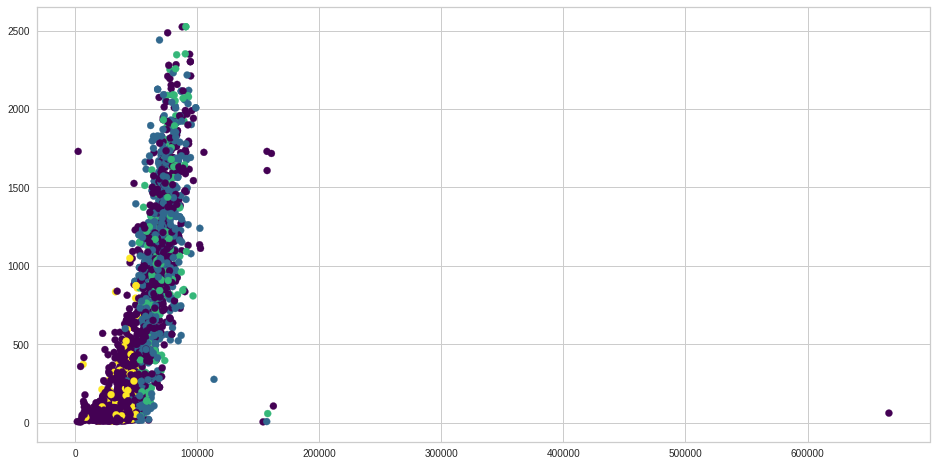

In [ ]:
#Visualising the k = 4 clusters with Scatter plot of Total_spending vs Income
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Income", y = "total_spending", c = "Clusters", cmap = 'viridis', data = kmodes_data)

There is still alot of clusters overlap as expected when using k = 4.
However we will continue with the analysis to see if there are any extra findings we can get from using only categorical data clustering with K-Modes

As we can see from this graph there were alot of overlaps when using K-modes

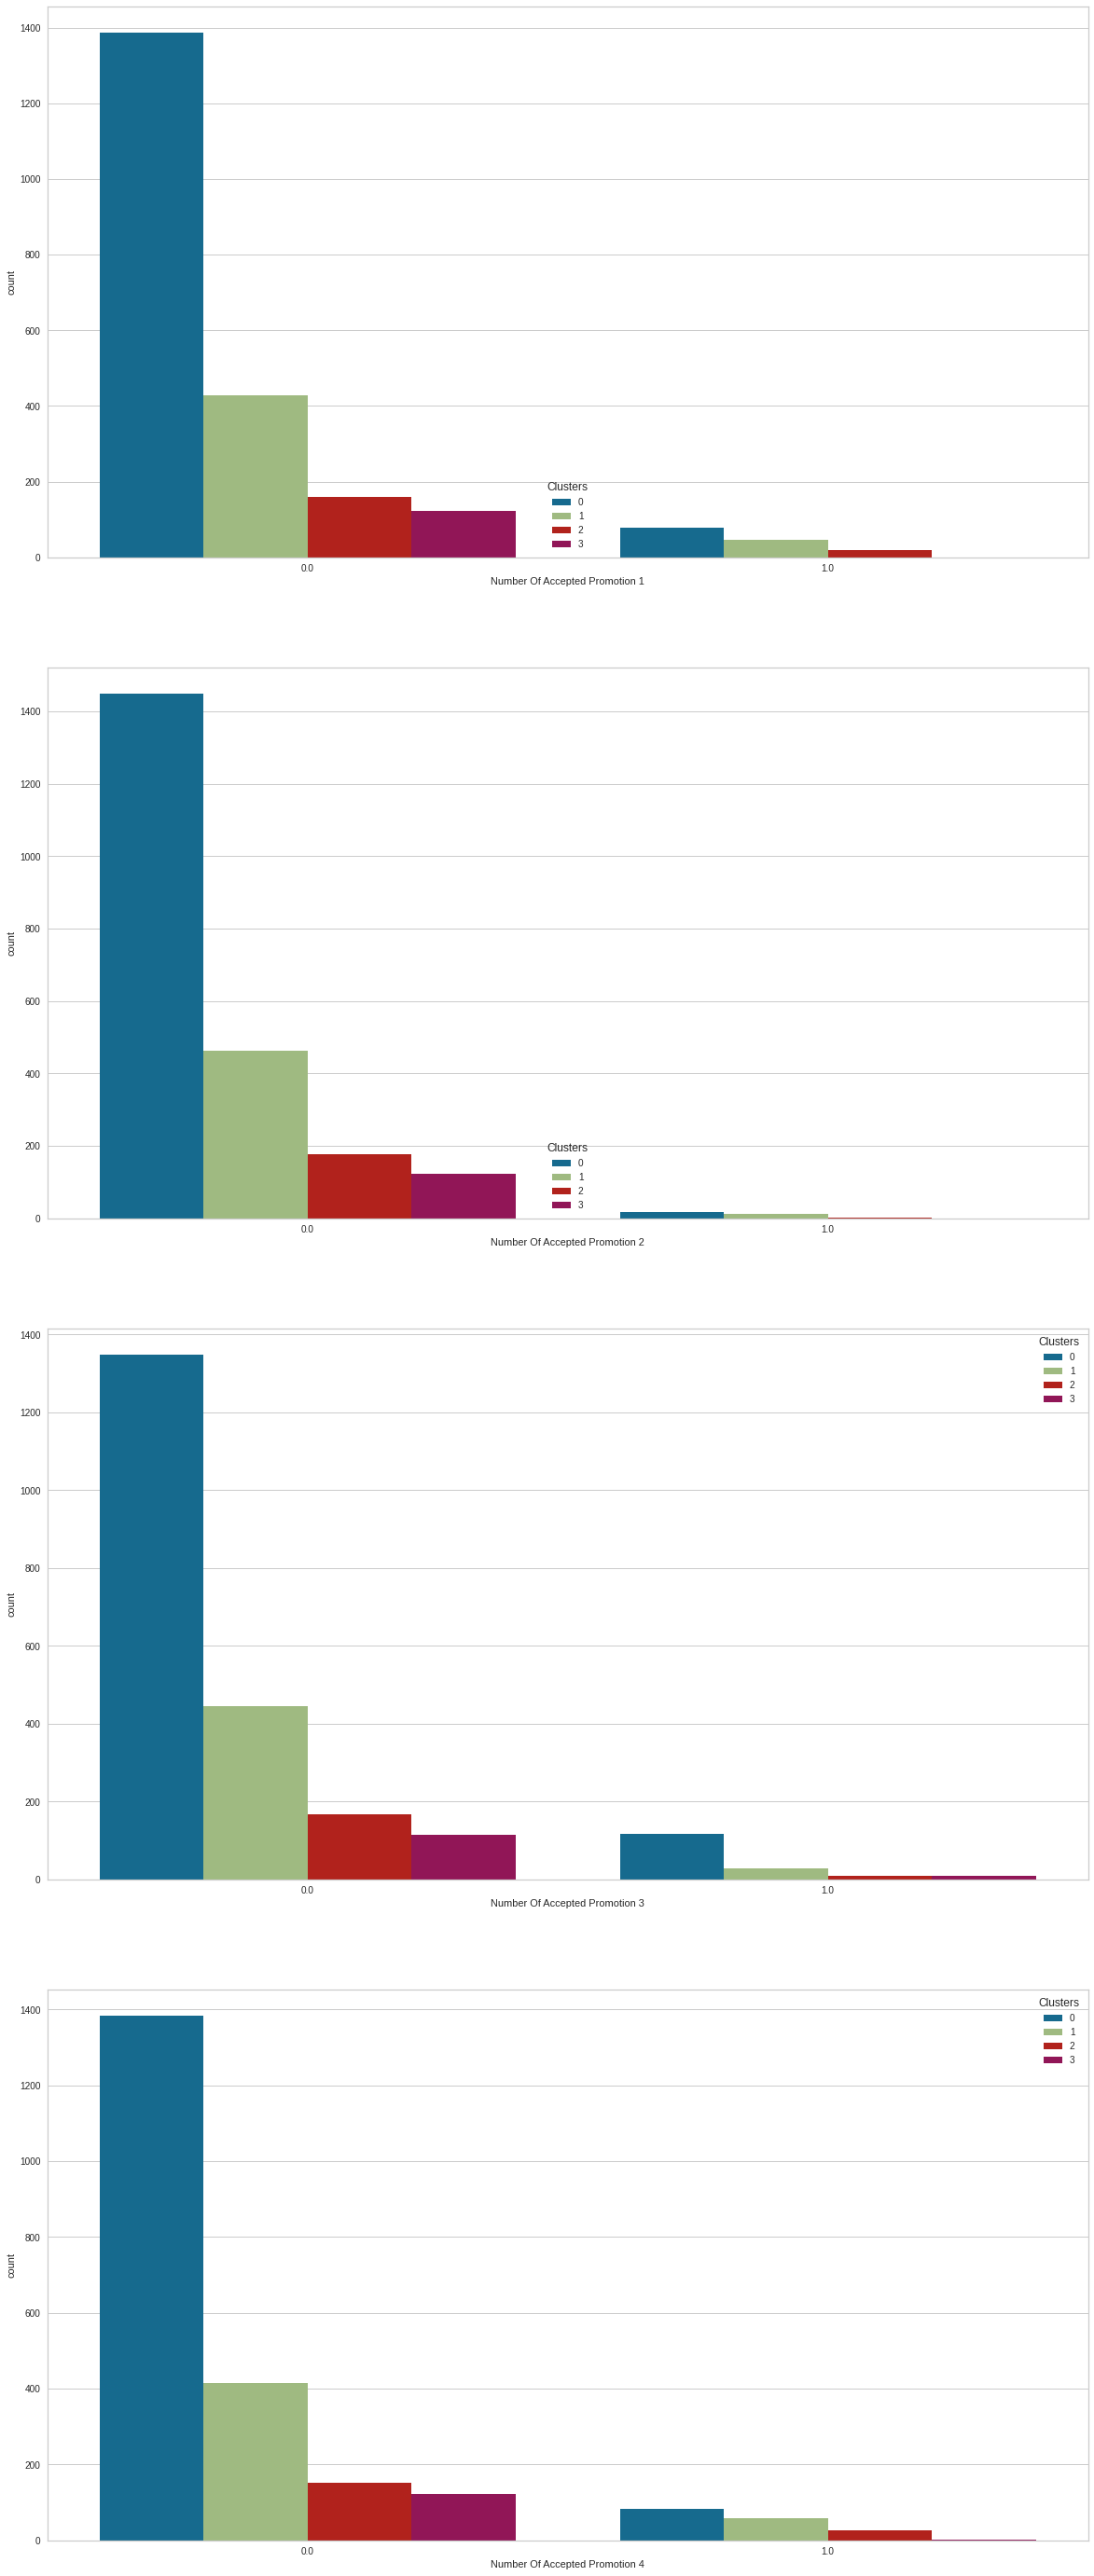

In [ ]:
#Plotting the stacked bar plot for all cat vars
Coupon= ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4"]
fig, axes = plt.subplots(len(Coupon),figsize=(20,50))
# for i in range(len(cat_vars_new)):
#   sb.countplot(x=kmodes_data[cat_vars_new[i]],order=kmodes_data[cat_vars_new[i]].value_counts().index,hue=kmodes_data["Cluster"],ax=axes[i])
for i in range(len(Coupon)):
  #Plotting count of total campaign accepted.
  sb.countplot(x=kmodes_data[Coupon[i]],hue=kmodes_data["Clusters"],ax=axes[i])
  axes[i].set_xlabel(f"Number Of Accepted Promotion {str(i+1)}")

In [ ]:
#Usage of plotly to plot interactive pie chart
import plotly.graph_objects as go
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

cluster0_num = kmodes_data[kmodes_data["Clusters"]==0].shape[0]
cluster1_num = kmodes_data[kmodes_data["Clusters"]==1].shape[0]
cluster2_num = kmodes_data[kmodes_data["Clusters"]==2].shape[0]
cluster3_num = kmodes_data[kmodes_data["Clusters"]==3].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

Pie chart plotted wiht plotly shows the percentage of customers in each clusters

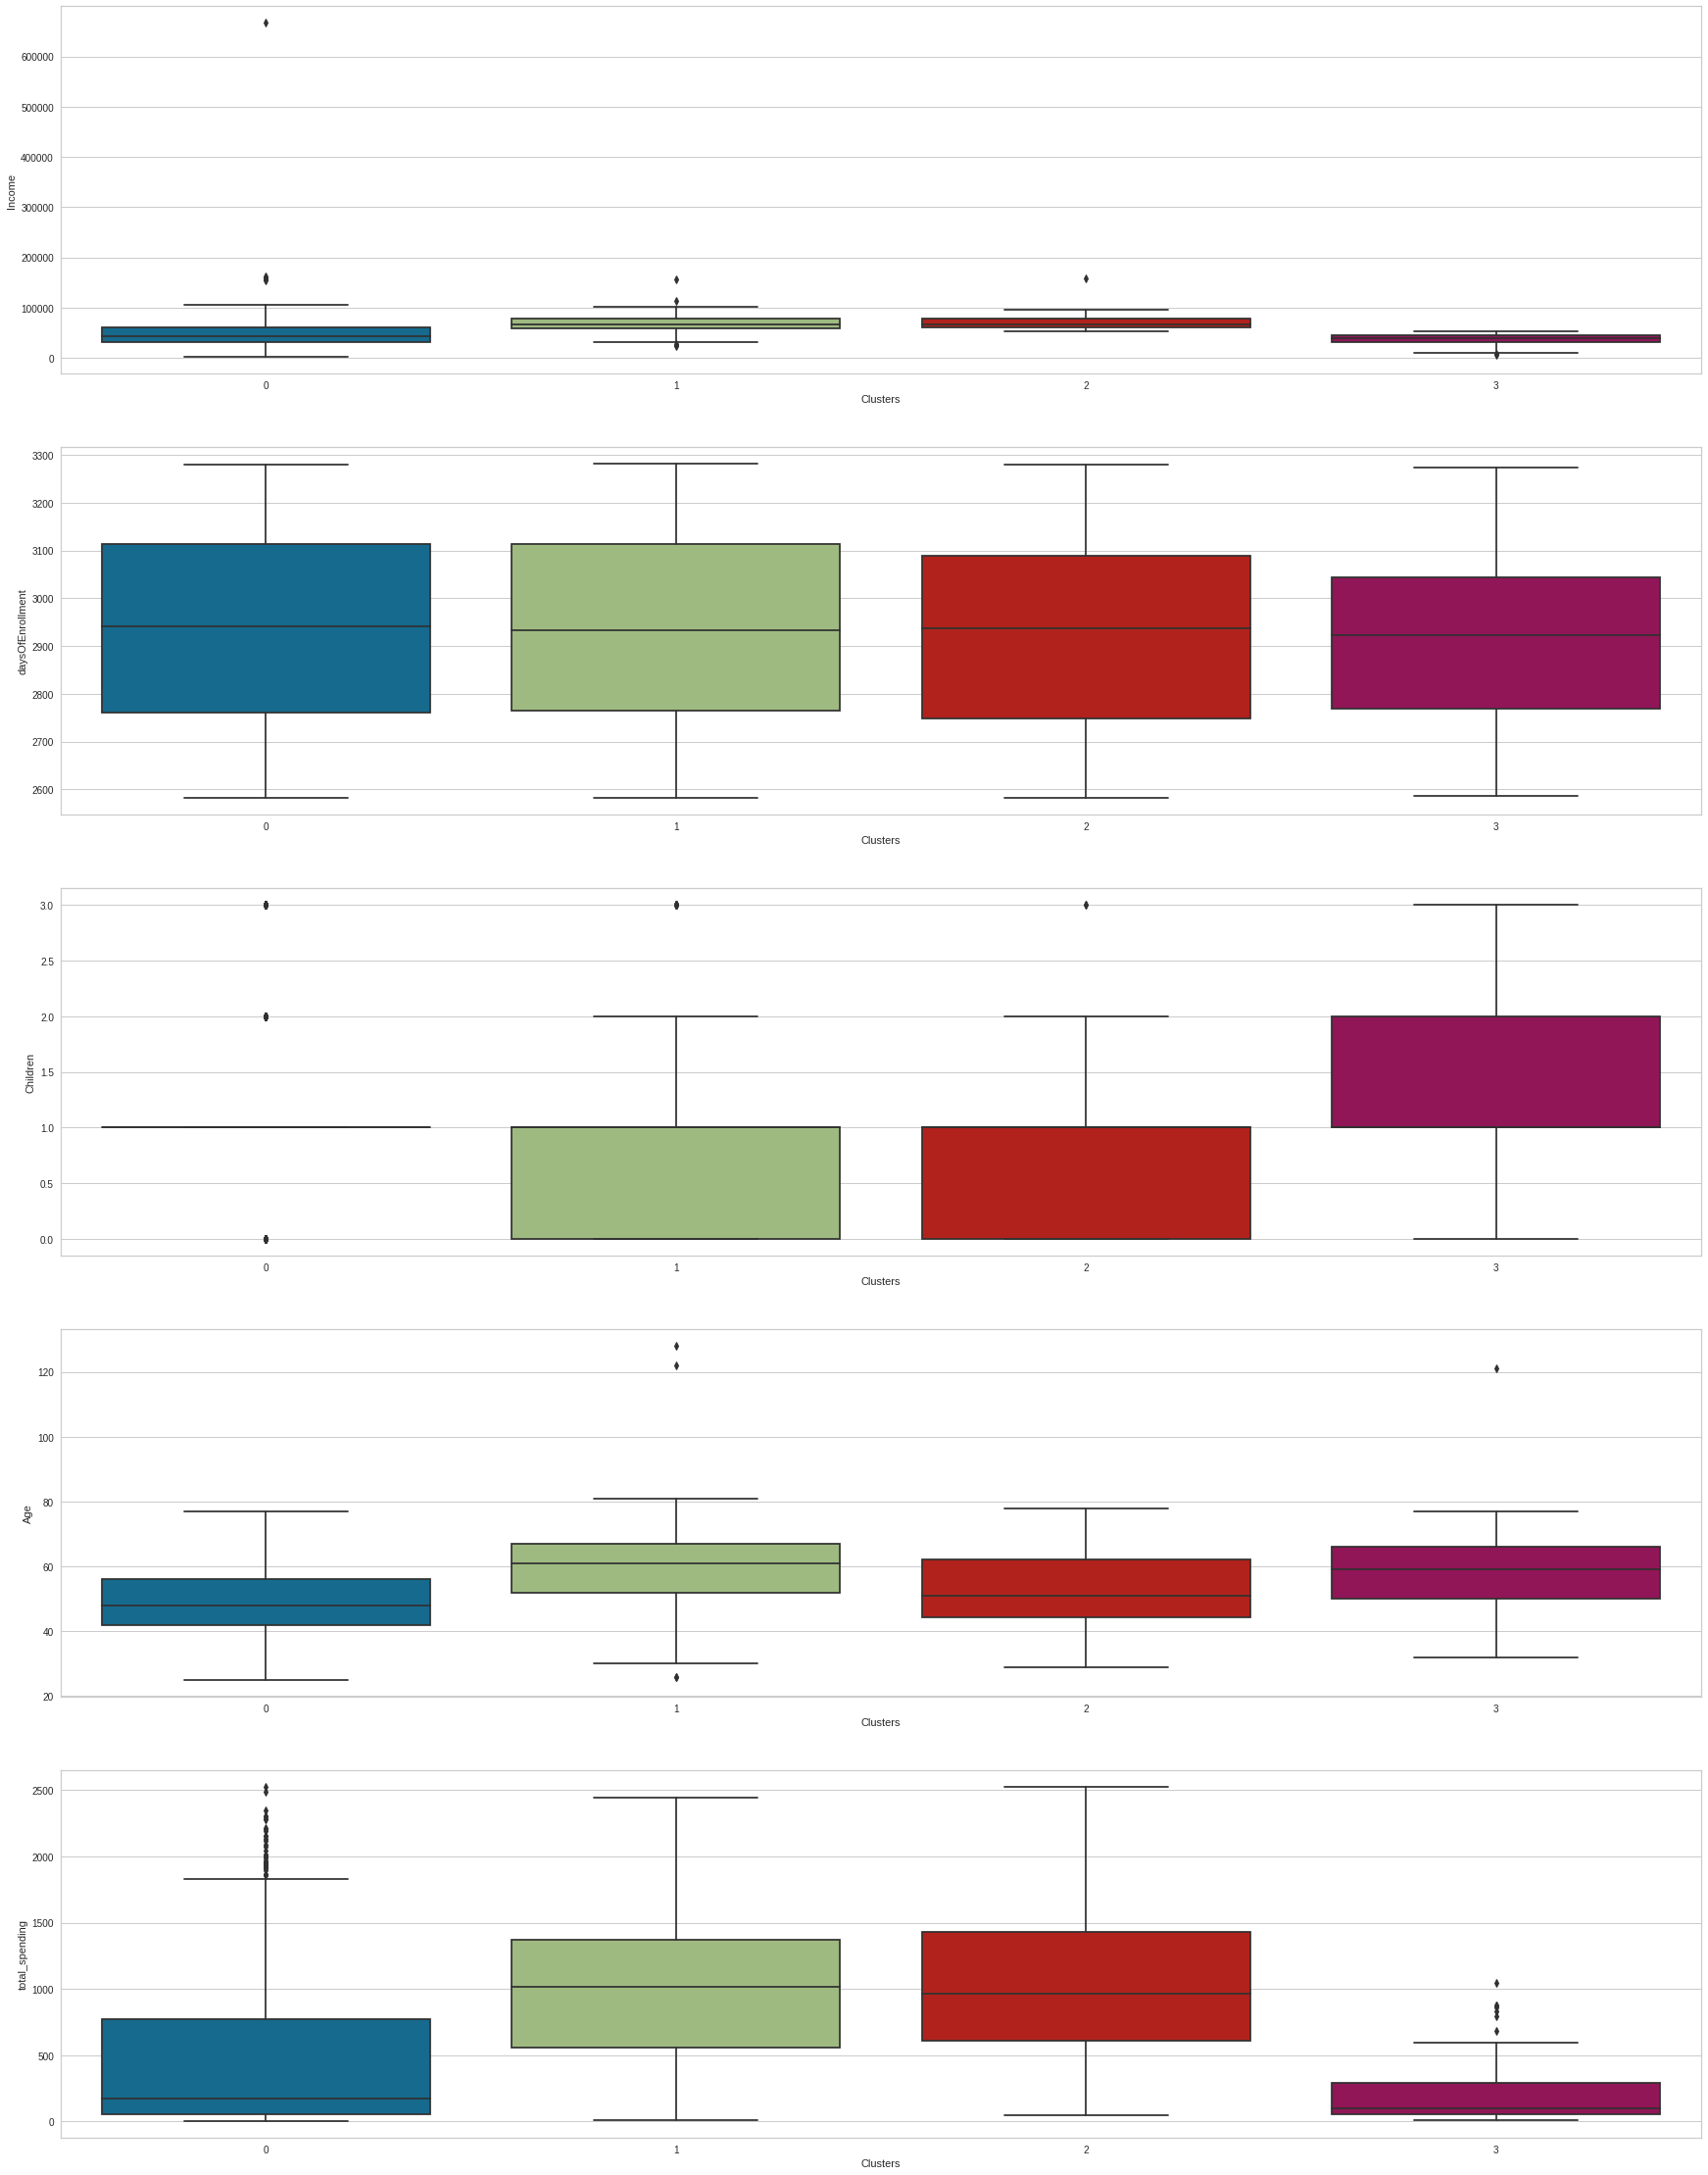

In [ ]:
# Boxplots for all Features against the Clusters
features=['Income',"daysOfEnrollment","Children","Age","total_spending"]

fig,axes = plt.subplots(len(features),figsize=(30,40))
for i in range(len(features)):
  sb.boxplot(x = "Clusters", y=features[i], data = kmodes_data,ax=axes[i])

The box and whiskers plot graph above shows the rough distribution of the cluster's total_spending, age,income and days of enrollment

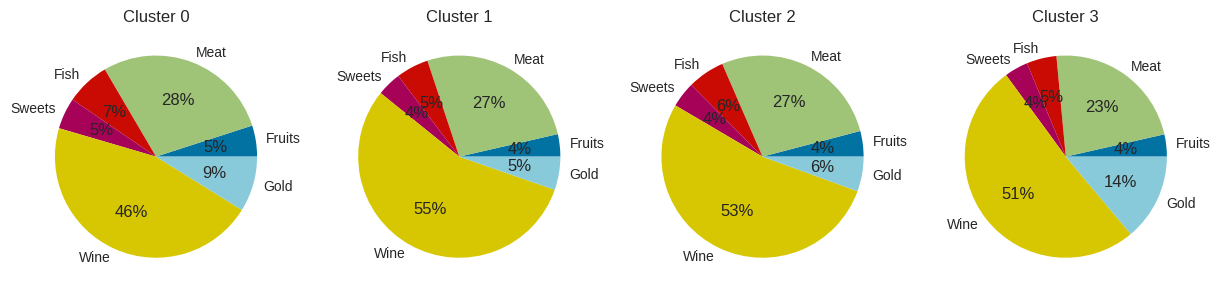

In [ ]:
#Define labels
labels = ['Fruits', 'Meat', 'Fish', 'Sweets', 'Wine', 'Gold']
plt.figure(figsize=(15, 10), dpi=100)

#compute counts
for i in range(4):
  counts= []
  #getting the data of the current segment
  cluster_data = kmodes_data[kmodes_data["Clusters"]==i]

  total_spending_fruits = counts.append(cluster_data["MntFruits"].sum())
  total_spending_meat = counts.append(cluster_data["MntMeatProducts"].sum())
  total_spending_fish = counts.append(cluster_data["MntFishProducts"].sum())
  total_spending_sweet = counts.append(cluster_data["MntSweetProducts"].sum())
  total_spending_wines = counts.append(cluster_data["MntWines"].sum())
  total_spending_gold = counts.append(cluster_data["MntGoldProds"].sum())

  values = [total_spending_fruits,total_spending_meat,total_spending_fish,total_spending_sweet,total_spending_wines,total_spending_gold]

  #plotting chart
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title(f"Cluster {str(i)}")
  plt.pie(counts, labels = labels, autopct='%.0f%%')

plt.show()


The Graph above shows how much each clusters spends on each item.
Their spendings on each category of items are almost the same meaning, they buying habits are almost identical between all 4 clusters

Finding Relationships between the different ways of purchases and the clusters

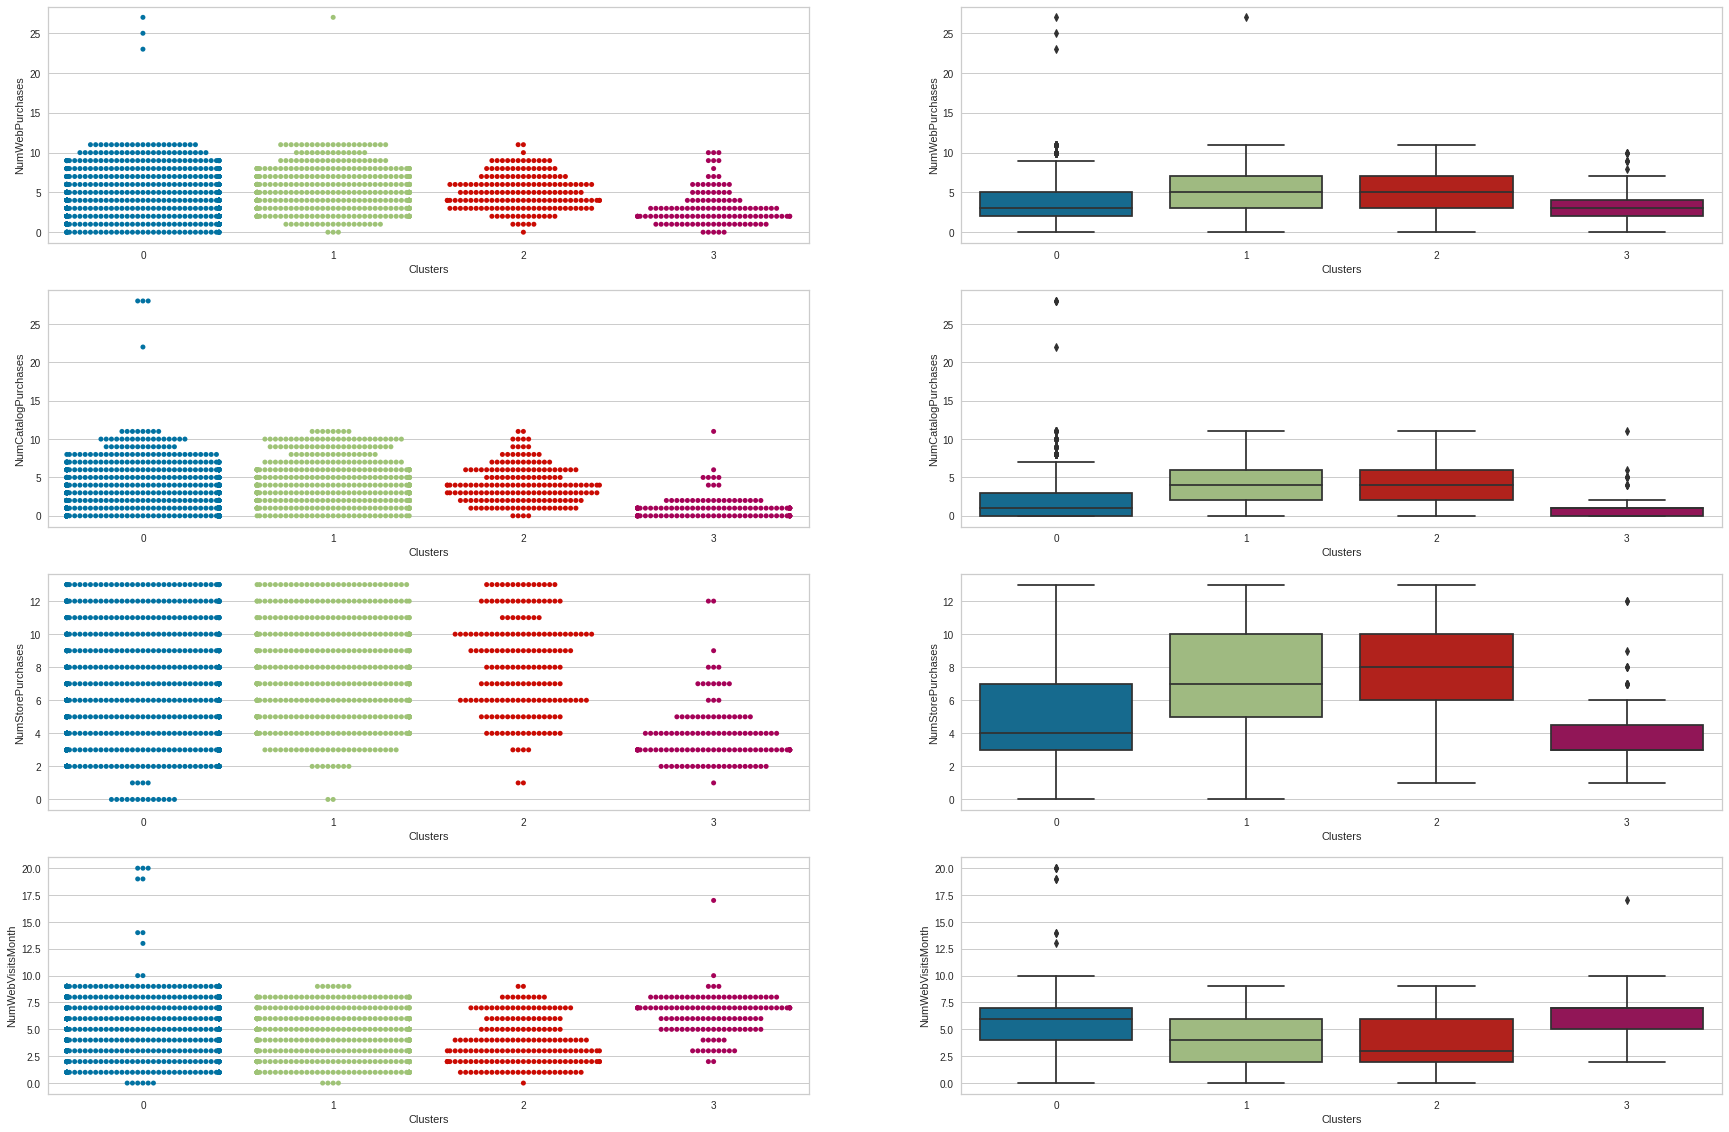

In [ ]:
outlets=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]
fig,axes = plt.subplots(len(outlets),2,figsize=(30,20))
for i in range(len(outlets)):
  sb.swarmplot(data=kmodes_data,x="Clusters",y=outlets[i],ax=axes[i,0])
  sb.boxplot(x = "Clusters", y=outlets[i], data = kmodes_data,ax=axes[i,1])

<Figure size 2160x1080 with 0 Axes>

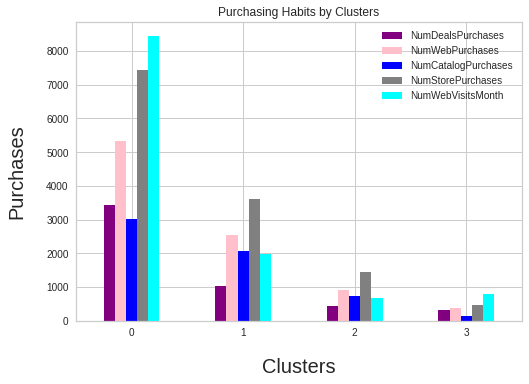

In [ ]:
cluster_purchases = kmodes_data.groupby('Clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['purple', 'pink', 'blue', 'grey', 'cyan'])

plt.title('Purchasing Habits by Clusters')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

We can see that the cluster's purchasing habits at the different stores location quite different. Thus, we can allocate marketing resources based on it

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'daysOfEnrollment', 'Age',
       'Basic', 'Graduation', 'Master', 'PhD', 'Not in relationship',
       'total_spending', 'Children', 'Has_Child', 'Elder', 'Low Income',
       'Middle Income', 'Clusters'],
      dtype='object')


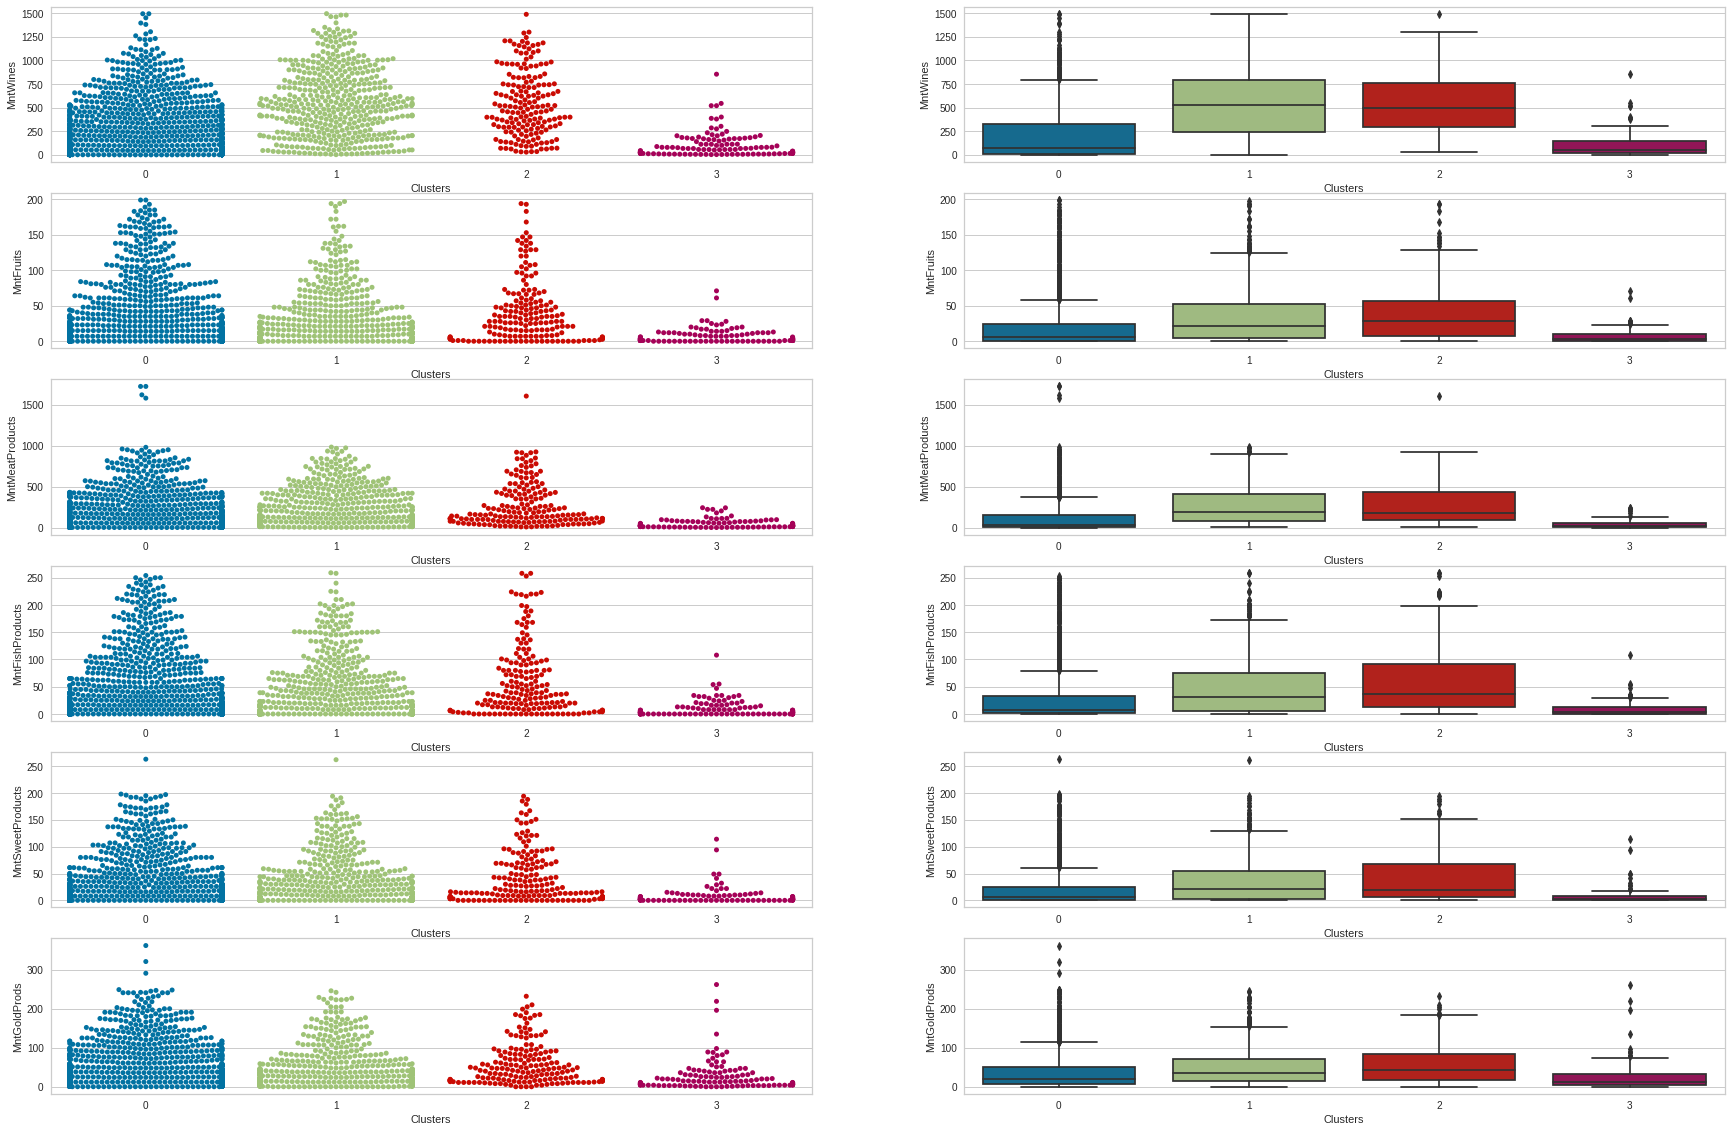

In [ ]:
itemExpense = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
print(kmodes_data.columns)
fig,axes = plt.subplots(len(itemExpense),2,figsize=(30,20))
for i in range(len(itemExpense)):
  sb.swarmplot(data=kmodes_data,x="Clusters",y=itemExpense[i],ax=axes[i,0])
  sb.boxplot(x = "Clusters", y=itemExpense[i], data = kmodes_data,ax=axes[i,1])
# pl = sb.scatterplot(data = kmodes_data,y="total_spending", x="Income",hue=kmodes_data["Clusters"])
# pl.set_title("Cluster's Profile Based On Income And Spending")
# plt.legend()
# plt.show()

In conclusion, the K-Modes model Did not give us very good clusters we could be interpreted. The clusters characteristics were highly identical. The characteristics are essentially their age, income, which store(online, catalog or offline) they like to go to buy stuff,  There was also alot of overlapping in the clusters.Therefore, we believe that theK-means clusters gave us better interpretation of clusteres, where we can then allocate marketing resources

# Hierarichal Clustering - Lim Jun Yang

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
#cleaningData.drop("Year_Birth", axis=1) ##dropping year_birth as it is redundant
#I commented out the above as cleanD already removed it
hier= cleanD.copy()
hier.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Relationship_Status  2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   float64
 4   Teenhome             2240 non-null   float64
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

In [ ]:
def parent(child):
  if child==True:
    return 1
  return 0

In [ ]:
hier["Parent"]= hier['Has_Child'].apply(parent)
hier= hier.drop("Children", axis=1)
hier= hier.drop("Has_Child", axis=1)

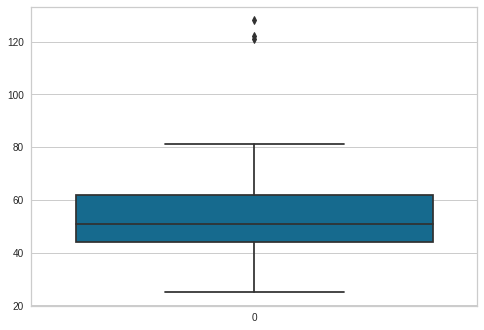

In [ ]:
sb.boxplot(data=hier["Age"])

In [ ]:
Q1 = hier['Age'].quantile(0.25)
Q3 = hier['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (hier["Age"] >= Q1 - 1.5 * IQR) & (hier['Age'] <= Q3 + 1.5 *IQR)
hier=hier.loc[filter]

In [ ]:
Q1 = hier['Income'].quantile(0.25)
Q3 = hier['Income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (hier["Income"] >= Q1 - 1.5 * IQR) & (hier['Income'] <= Q3 + 1.5 *IQR)
hier=hier.loc[filter]

In [ ]:

scaler = StandardScaler()
scaler.fit(hier)
scaled_ds = pd.DataFrame(scaler.transform(hier),columns= hier.columns )
scaled_ds


Education  Relationship_Status    Income   Kidhome  Teenhome   Recency  \
0     -0.349778             1.345676  0.315641 -0.825592 -0.931676  0.307314   
1     -0.349778             1.345676 -0.254777  1.031365  0.904492 -0.383771   
2     -0.349778            -0.743121  0.967360 -0.825592 -0.931676 -0.798422   
3     -0.349778            -0.743121 -1.207472  1.031365 -0.931676 -0.798422   
4      1.432289            -0.743121  0.323137  1.031365 -0.931676  1.551268   
...         ...                  ...       ...       ...       ...       ...   
2224  -0.349778            -0.743121  0.464847 -0.825592  0.904492 -0.107337   
2225   1.432289            -0.743121  0.599834  2.888322  0.904492  0.238206   
2226  -0.349778             1.345676  0.259682 -0.825592 -0.931676  1.447605   
2227   0.541256            -0.743121  0.852831 -0.825592  0.904492 -1.420399   
2228   1.432289            -0.743121  0.060805  1.031365  0.904492 -0.314662   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0     0.980166   1.550778         1.736151         2.456789  ...   
1    -0.873191  -0.637618        -0.726371        -0.651738  ...   
2     0.359410   0.569773        -0.174584         1.341376  ...   
3    -0.873191  -0.562156        -0.662528        -0.505455  ...   
4    -0.392031   0.418849        -0.215626         0.152822  ...   
...        ...        ...              ...              ...  ...   
2224  1.199955   0.418849         0.076229         0.079680  ...   
2225  0.300008  -0.662772        -0.616926        -0.688309  ...   
2226  1.791009   0.544619         0.235837        -0.103175  ...   
2227  0.365350   0.091848         0.222156         0.774527  ...   
2228 -0.656372  -0.587310        -0.475559        -0.651738  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0        -0.279954     -0.262802     -0.116801 -0.095152  2.381943   
1        -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
2        -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
3        -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
4        -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
...            ...           ...           ...       ...       ...   
2224     -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
2225     -0.279954      3.805150     -0.116801 -0.095152 -0.419825   
2226     -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
2227     -0.279954     -0.262802     -0.116801 -0.095152 -0.419825   
2228     -0.279954     -0.262802     -0.116801 -0.095152  2.381943   

      daysOfEnrollment       Age  total_spending  Age_Category    Parent  
0             1.529265  1.015715        1.683247      1.015977 -1.587869  
1            -1.190769  1.272020       -0.962795      1.272329  0.629775  
2            -0.206611  0.332234        0.283674      0.332372 -1.587869  
3            -1.062186 -1.291031       -0.919526     -1.291190  0.629775  
4            -0.953384 -1.034726       -0.305445     -1.034838  0.629775  
...                ...       ...             ...           ...       ...  
2224          0.134629  0.161364        1.223934      0.161471  0.629775  
2225         -1.655648  1.955500       -0.268833      1.955934  0.629775  
2226         -0.983057 -1.034726        1.057517     -1.034838 -1.587869  
2227         -0.978112  1.101150        0.395174      1.101427  0.629775  
2228          1.326499  1.272020       -0.721489      1.272329  0.629775  

[2229 rows x 29 columns]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T #PCA to increase interpretability of data by reducing the number of dimensions. It also
#deals with correlated variables, hence we can use many variables with no need to remove them

count          mean       std       min       25%       50%       75%  \
col1  2229.0  1.275088e-16  2.855413 -5.366037 -2.565842 -0.827936  2.291787   
col2  2229.0 -5.100352e-17  1.656605 -4.063365 -1.304357 -0.033931  1.283316   
col3  2229.0  3.187720e-18  1.410416 -3.841382 -0.898607 -0.135071  0.738067   

           max  
col1  8.450131  
col2  4.814059  
col3  6.378894

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
for i in range(2,20):
  avg=0;
  for j in range(10):
    AC = AgglomerativeClustering(n_clusters=i)
    yhat_AC = AC.fit_predict(PCA_ds)
    labels_cluster_Hierarchical= AC.labels_
    PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
    hier["Clusters"]= yhat_AC
    avg+=silhouette_score(PCA_ds, labels_cluster_Hierarchical)
  avg= avg/10
  print('Average silhoutte score of Hierarchical for ' + str(i) + 'clusters is ' + str(avg))

Average silhoutte score of Hierarchical for 2clusters is 0.411215824943428
Average silhoutte score of Hierarchical for 3clusters is 0.3907071617506412
Average silhoutte score of Hierarchical for 4clusters is 0.4050862304371653
Average silhoutte score of Hierarchical for 5clusters is 0.4060121228385801
Average silhoutte score of Hierarchical for 6clusters is 0.4297131695859721
Average silhoutte score of Hierarchical for 7clusters is 0.4140243310336479
Average silhoutte score of Hierarchical for 8clusters is 0.43339130769153567
Average silhoutte score of Hierarchical for 9clusters is 0.4474829954087758
Average silhoutte score of Hierarchical for 10clusters is 0.4346547869155636
Average silhoutte score of Hierarchical for 11clusters is 0.45718233290900534
Average silhoutte score of Hierarchical for 12clusters is 0.47180122959736986
Average silhoutte score of Hierarchical for 13clusters is 0.5017453582016339
Average silhoutte score of Hierarchical for 14clusters is 0.48976396347452333
Aver

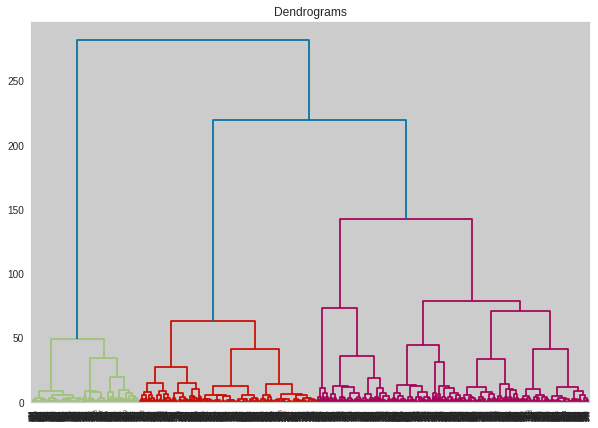

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
#Initiating the Agglomerative Clustering model
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(PCA_ds, method='ward'))


In [ ]:
from sklearn.metrics import silhouette_score
AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(PCA_ds)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
labels_cluster_Hierarchical= AC.labels_
print('Silhoutte score of Hierarchical is ' , silhouette_score(PCA_ds, labels_cluster_Hierarchical))
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
hier["Clusters"]= yhat_AC

Silhoutte score of Hierarchical is  0.4558495991113715


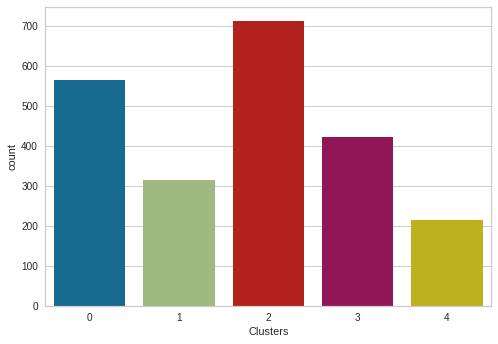

In [ ]:
  sb.countplot(x = 'Clusters', data = hier)

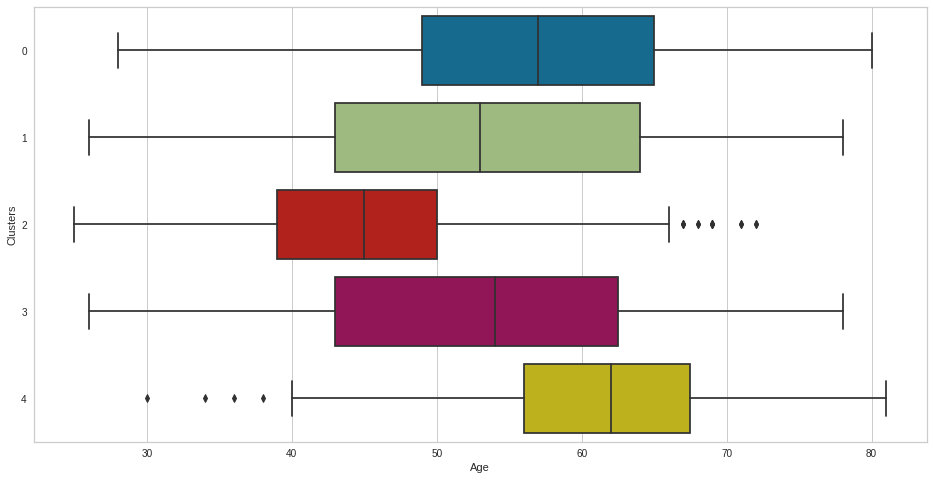

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(y = "Clusters", x = 'Age', data = hier, orient= "h")


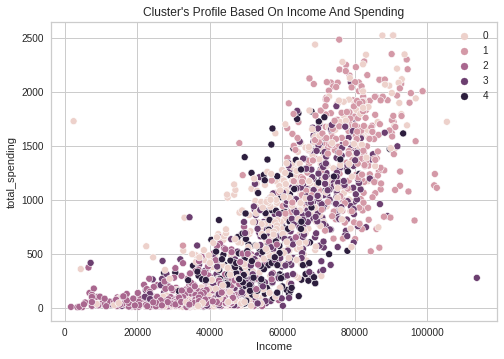

In [ ]:

mnt= ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds" ]
hier= hier.assign(total_spending=0)
for i in mnt:
  hier['total_spending']= hier['total_spending']+ hier[i]

pl = sb.scatterplot(data = hier,y=hier["total_spending"], x=hier["Income"],hue=hier["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

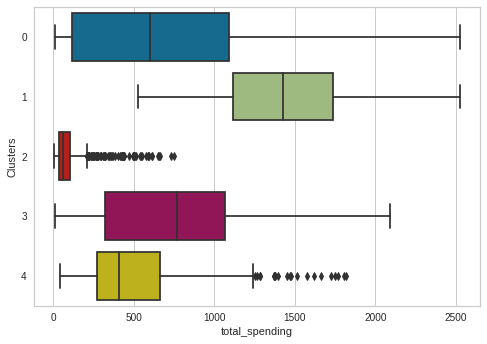

In [ ]:
sb.boxplot(y= "Clusters", x= "total_spending", data=hier, orient= "h")

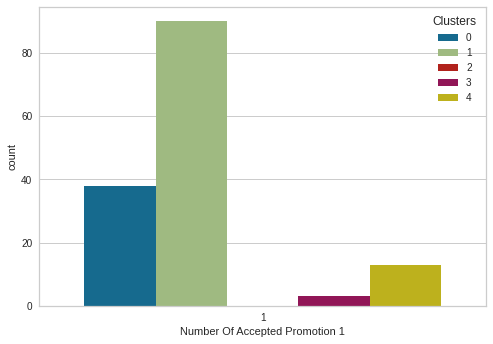

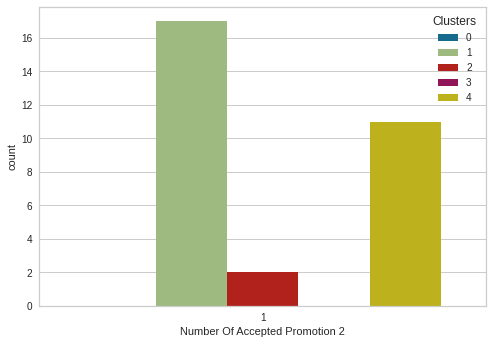

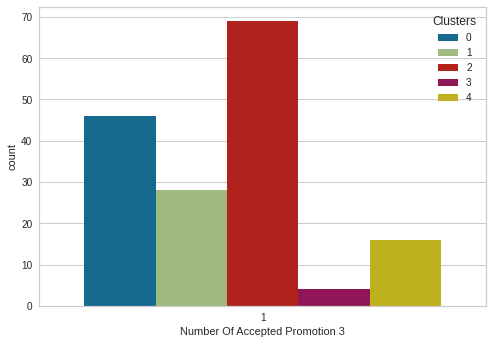

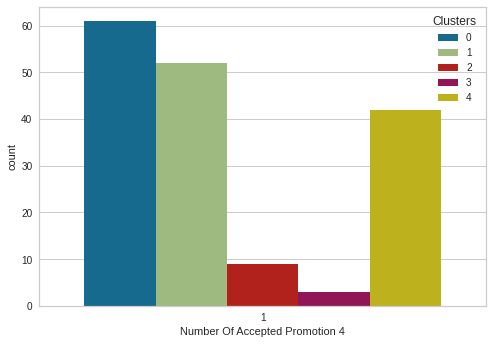

In [ ]:
Coupon= ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4"]
for i in range(len(Coupon)):
  #Plotting count of total campaign accepted.
  plt.figure()
  y=pd.DataFrame(hier.loc[hier[Coupon[i]] ==1])
  pl = sb.countplot(x= y[Coupon[i]] ,hue=hier["Clusters"])
  pl.set_xlabel("Number Of Accepted Promotion "+ str(i+1))
  plt.show()

In [ ]:
catVars = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
for i in range(len(catVars)):
  hier[catVars[i]] = hier[catVars[i]].astype('int64');
hier.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   float64
 1   Marital_Status       2229 non-null   float64
 2   Income               2229 non-null   float64
 3   Kidhome              2229 non-null   float64
 4   Teenhome             2229 non-null   float64
 5   Recency              2229 non-null   float64
 6   MntWines             2229 non-null   float64
 7   MntFruits            2229 non-null   float64
 8   MntMeatProducts      2229 non-null   float64
 9   MntFishProducts      2229 non-null   float64
 10  MntSweetProducts     2229 non-null   float64
 11  MntGoldProds         2229 non-null   float64
 12  NumDealsPurchases    2229 non-null   float64
 13  NumWebPurchases      2229 non-null   float64
 14  NumCatalogPurchases  2229 non-null   float64
 15  NumStorePurchases    2229 non-null   f

In [ ]:
hier.info()
outlets=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   float64
 1   Marital_Status       2229 non-null   float64
 2   Income               2229 non-null   float64
 3   Kidhome              2229 non-null   float64
 4   Teenhome             2229 non-null   float64
 5   Recency              2229 non-null   float64
 6   MntWines             2229 non-null   float64
 7   MntFruits            2229 non-null   float64
 8   MntMeatProducts      2229 non-null   float64
 9   MntFishProducts      2229 non-null   float64
 10  MntSweetProducts     2229 non-null   float64
 11  MntGoldProds         2229 non-null   float64
 12  NumDealsPurchases    2229 non-null   float64
 13  NumWebPurchases      2229 non-null   float64
 14  NumCatalogPurchases  2229 non-null   float64
 15  NumStorePurchases    2229 non-null   f

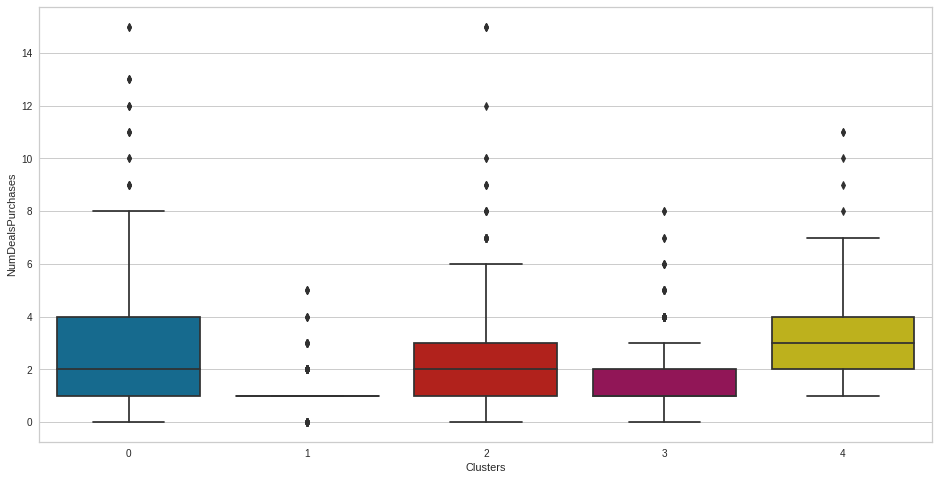

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumDealsPurchases', data = hier)


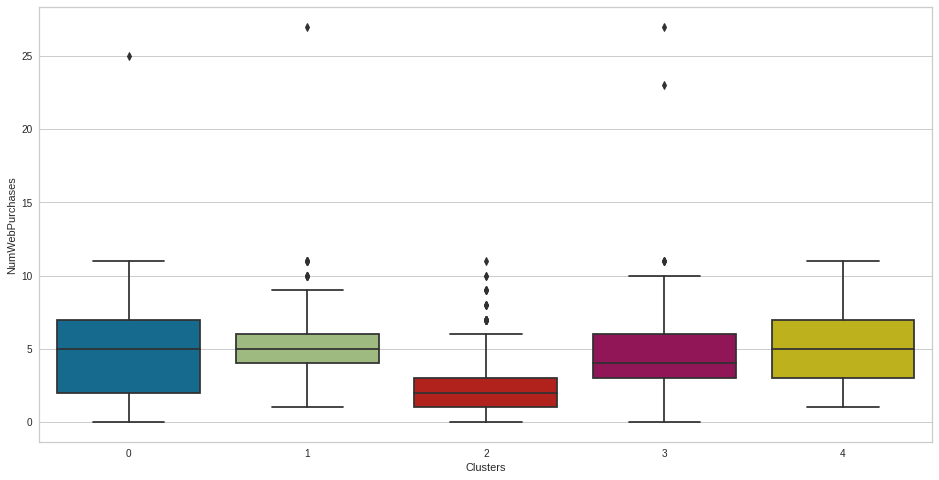

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumWebPurchases', data = hier)


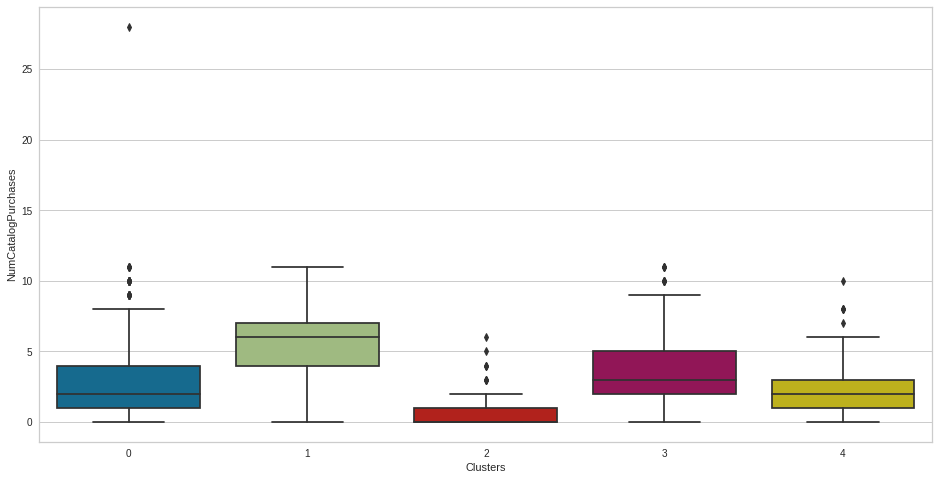

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumCatalogPurchases', data = hier)


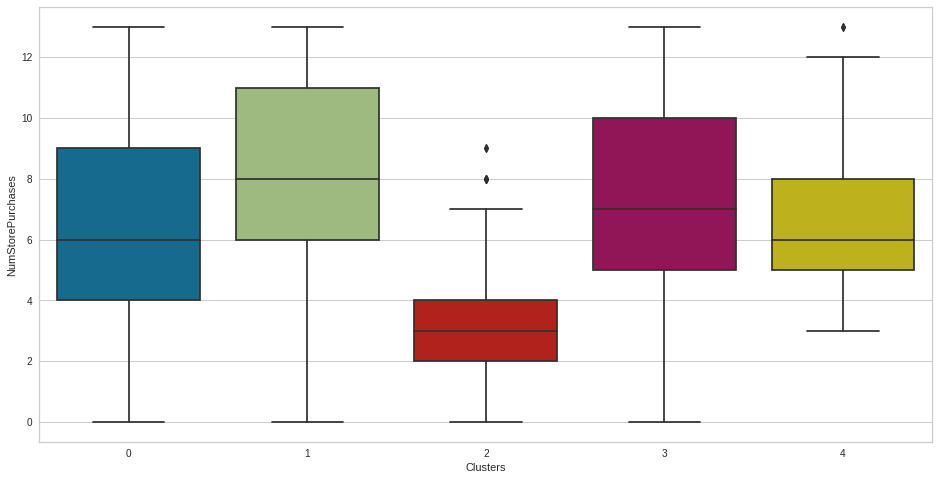

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumStorePurchases', data = hier)


In [ ]:
education=sorted(df["Education"].unique())
education

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [ ]:
hier= hier.assign(Kids= (hier["Kidhome"]+ hier["Teenhome"]))

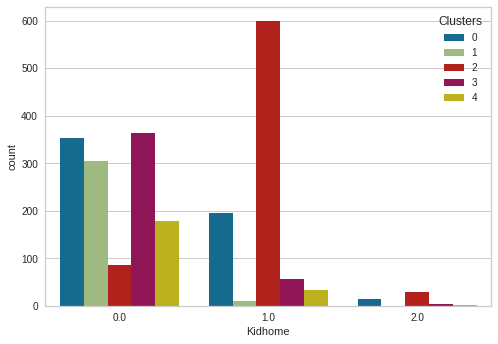

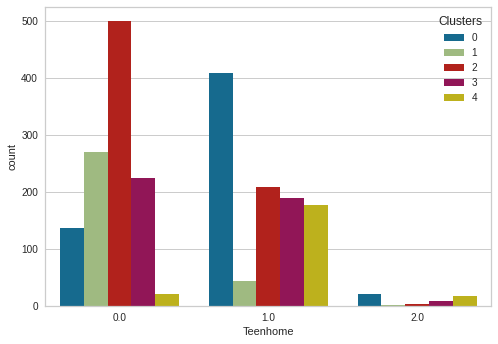

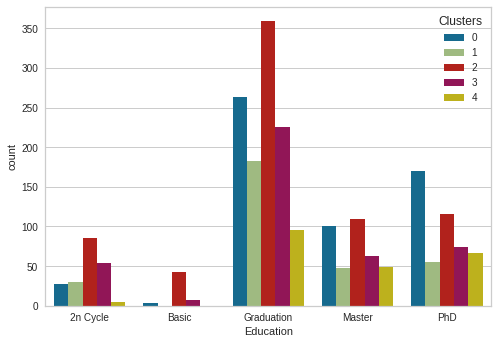

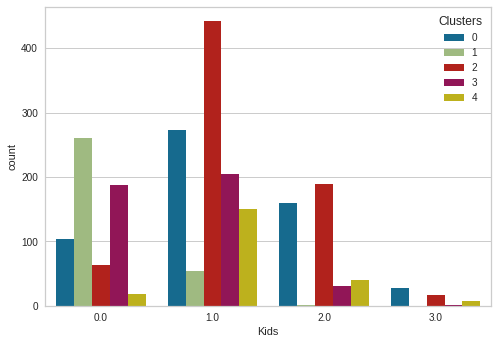

In [ ]:
Personal = [ "Kidhome","Teenhome", "Education", "Kids"]

for i in Personal:
    plt.figure()
    sb.countplot(x=hier[i], hue =hier["Clusters"])
    if i=="Education":
      plt.xticks(np.arange(5), labels=education)
    plt.show()

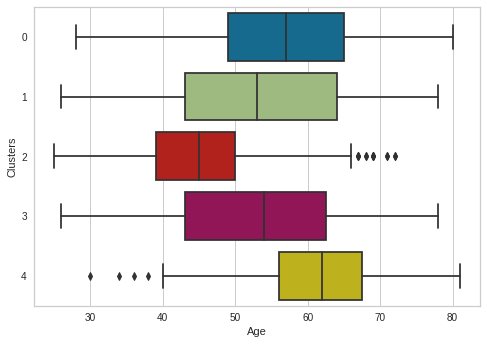

In [ ]:
# Boxplots for the Features against the Clusters
mnt= ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds" ]

sb.boxplot(x = 'Age', y = 'Clusters', data = hier, orient = "h")



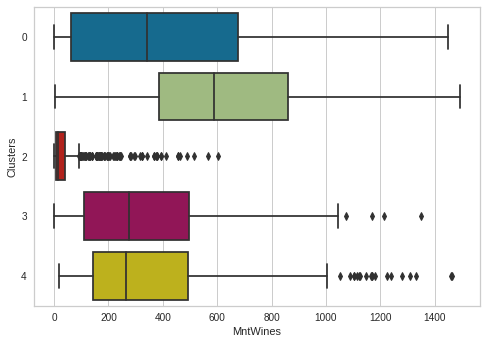

In [ ]:
  sb.boxplot(x = mnt[0], y = 'Clusters', data = hier, orient = "h")

In [ ]:
import plotly.graph_objects as go

hier0= hier[hier["Clusters"]==0]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= hier0[hier0["Education"]==0].shape[0]
basic= hier0[hier0["Education"]==1].shape[0]
grad= hier0[hier0["Education"]==2].shape[0]
master= hier0[hier0["Education"]==3].shape[0]
phd= hier0[hier0["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 0")])
fig.show()

In [ ]:
import plotly.graph_objects as go

hier0= hier[hier["Clusters"]==1]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= hier0[hier0["Education"]==0].shape[0]
basic= hier0[hier0["Education"]==1].shape[0]
grad= hier0[hier0["Education"]==2].shape[0]
master= hier0[hier0["Education"]==3].shape[0]
phd= hier0[hier0["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 1")])
fig.show()

In [ ]:
import plotly.graph_objects as go

hier2= hier[hier["Clusters"]==2]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= hier2[hier2["Education"]==0].shape[0]
basic= hier2[hier2["Education"]==1].shape[0]
grad= hier2[hier2["Education"]==2].shape[0]
master= hier2[hier2["Education"]==3].shape[0]
phd= hier2[hier2["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 2")])
fig.show()

In [ ]:
import plotly.graph_objects as go

hier3= hier[hier["Clusters"]==3]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= hier3[hier3["Education"]==0].shape[0]
basic= hier3[hier3["Education"]==1].shape[0]
grad= hier3[hier3["Education"]==2].shape[0]
master= hier3[hier3["Education"]==3].shape[0]
phd= hier3[hier3["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 3")])
fig.show()

In [ ]:
import plotly.graph_objects as go

hier3= hier[hier["Clusters"]==3]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= hier3[hier3["Education"]==0].shape[0]
basic= hier3[hier3["Education"]==1].shape[0]
grad= hier3[hier3["Education"]==2].shape[0]
master= hier3[hier3["Education"]==3].shape[0]
phd= hier3[hier3["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 3")])
fig.show()

In [ ]:
import plotly.graph_objects as go

hier4= hier[hier["Clusters"]==4]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= hier4[hier4["Education"]==0].shape[0]
basic= hier4[hier4["Education"]==1].shape[0]
grad= hier4[hier4["Education"]==2].shape[0]
master= hier4[hier4["Education"]==3].shape[0]
phd= hier4[hier4["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 4")])
fig.show()

In [ ]:
hier0

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0             4.0  58138.0      0.0       0.0     58.0   
2           2.0             5.0  71613.0      0.0       0.0     26.0   
12          2.0             2.0  63033.0      0.0       0.0     82.0   
13          3.0             2.0  59354.0      1.0       1.0     53.0   
23          4.0             3.0  65324.0      0.0       1.0      0.0   
...         ...             ...      ...      ...       ...      ...   
2235        2.0             3.0  61223.0      0.0       1.0     46.0   
2236        4.0             5.0  64014.0      2.0       1.0     56.0   
2237        2.0             2.0  56981.0      0.0       0.0     91.0   
2238        3.0             5.0  69245.0      0.0       1.0      8.0   
2239        4.0             3.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0        635.0       88.0            546.0            172.0  ...   
2        426.0       49.0            127.0            111.0  ...   
12       194.0       61.0            480.0            225.0  ...   
13       233.0        2.0             53.0              3.0  ...   
23       384.0        0.0            102.0             21.0  ...   
...        ...        ...              ...              ...  ...   
2235     709.0       43.0            182.0             42.0  ...   
2236     406.0        0.0             30.0              0.0  ...   
2237     908.0       48.0            217.0             32.0  ...   
2238     428.0       30.0            214.0             80.0  ...   
2239      84.0        3.0             61.0              2.0  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0              0.0           0.0           0.0       0.0       1.0   
2              0.0           0.0           0.0       0.0       0.0   
12             0.0           0.0           0.0       0.0       0.0   
13             0.0           0.0           0.0       0.0       0.0   
23             0.0           0.0           0.0       0.0       0.0   
...            ...           ...           ...       ...       ...   
2235           0.0           0.0           0.0       0.0       0.0   
2236           0.0           1.0           0.0       0.0       0.0   
2237           0.0           0.0           0.0       0.0       0.0   
2238           0.0           0.0           0.0       0.0       0.0   
2239           0.0           0.0           0.0       0.0       1.0   

      daysOfEnrollment   Age  Age_Category  total_spending  Clusters  
0               3245.0  64.0             1          1617.0         0  
2               2894.0  56.0             1           776.0         0  
12              2808.0  62.0             1          1102.0         0  
13              2808.0  69.0             1           310.0         0  
23              2751.0  67.0             1           544.0         0  
...                ...   ...           ...             ...       ...  
2235            2963.0  54.0             0          1341.0         0  
2236            2601.0  75.0             1           444.0         0  
2237            2737.0  40.0             0          1241.0         0  
2238            2738.0  65.0             1           843.0         0  
2239            3204.0  67.0             1           172.0         0  

[656 rows x 29 columns]

In [ ]:
hier0= hier[hier["Clusters"]==0]
hier0

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0           2.0             4.0  58138.0      0.0       0.0     58.0   
2           2.0             5.0  71613.0      0.0       0.0     26.0   
12          2.0             2.0  63033.0      0.0       0.0     82.0   
13          3.0             2.0  59354.0      1.0       1.0     53.0   
23          4.0             3.0  65324.0      0.0       1.0      0.0   
...         ...             ...      ...      ...       ...      ...   
2235        2.0             3.0  61223.0      0.0       1.0     46.0   
2236        4.0             5.0  64014.0      2.0       1.0     56.0   
2237        2.0             2.0  56981.0      0.0       0.0     91.0   
2238        3.0             5.0  69245.0      0.0       1.0      8.0   
2239        4.0             3.0  52869.0      1.0       1.0     40.0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0        635.0       88.0            546.0            172.0  ...   
2        426.0       49.0            127.0            111.0  ...   
12       194.0       61.0            480.0            225.0  ...   
13       233.0        2.0             53.0              3.0  ...   
23       384.0        0.0            102.0             21.0  ...   
...        ...        ...              ...              ...  ...   
2235     709.0       43.0            182.0             42.0  ...   
2236     406.0        0.0             30.0              0.0  ...   
2237     908.0       48.0            217.0             32.0  ...   
2238     428.0       30.0            214.0             80.0  ...   
2239      84.0        3.0             61.0              2.0  ...   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0              0.0           0.0           0.0       0.0       1.0   
2              0.0           0.0           0.0       0.0       0.0   
12             0.0           0.0           0.0       0.0       0.0   
13             0.0           0.0           0.0       0.0       0.0   
23             0.0           0.0           0.0       0.0       0.0   
...            ...           ...           ...       ...       ...   
2235           0.0           0.0           0.0       0.0       0.0   
2236           0.0           1.0           0.0       0.0       0.0   
2237           0.0           0.0           0.0       0.0       0.0   
2238           0.0           0.0           0.0       0.0       0.0   
2239           0.0           0.0           0.0       0.0       1.0   

      daysOfEnrollment   Age  Age_Category  total_spending  Clusters  
0               3245.0  64.0             1          1617.0         0  
2               2894.0  56.0             1           776.0         0  
12              2808.0  62.0             1          1102.0         0  
13              2808.0  69.0             1           310.0         0  
23              2751.0  67.0             1           544.0         0  
...                ...   ...           ...             ...       ...  
2235            2963.0  54.0             0          1341.0         0  
2236            2601.0  75.0             1           444.0         0  
2237            2737.0  40.0             0          1241.0         0  
2238            2738.0  65.0             1           843.0         0  
2239            3204.0  67.0             1           172.0         0  

[656 rows x 29 columns]

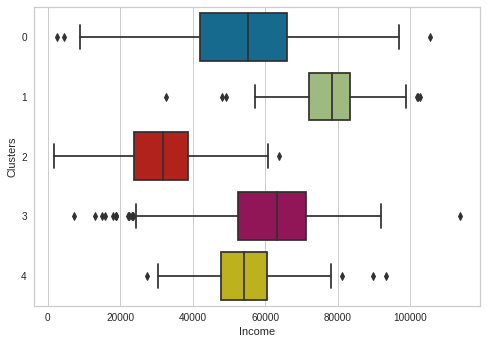

In [ ]:

sb.boxplot(x = "Income", y = 'Clusters', data = hier, orient = "h")

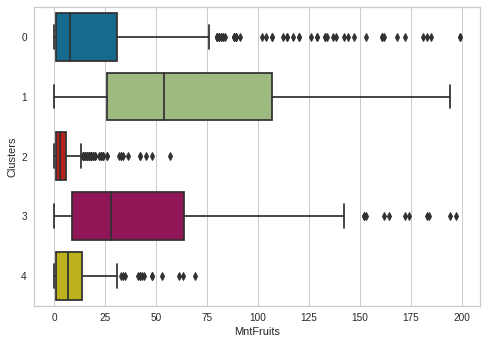

In [ ]:
  sb.boxplot(x = mnt[1], y = 'Clusters', data = hier, orient = "h")

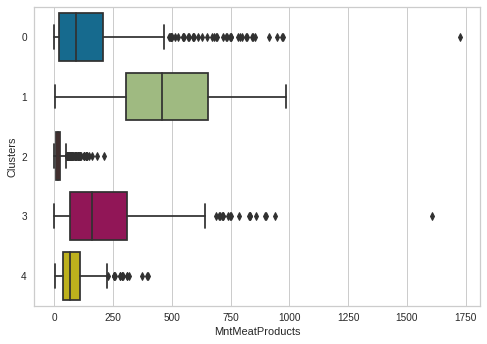

In [ ]:
  sb.boxplot(x = mnt[2], y = 'Clusters', data = hier, orient = "h")

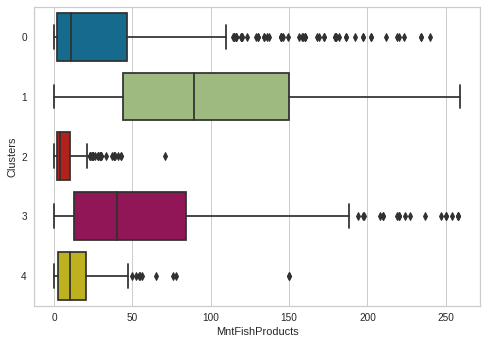

In [ ]:
  sb.boxplot(x = mnt[3], y = 'Clusters', data = hier, orient = "h")

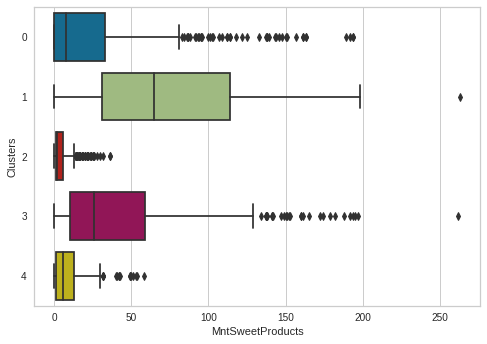

In [ ]:
  sb.boxplot(x = mnt[4], y = 'Clusters', data = hier, orient = "h")

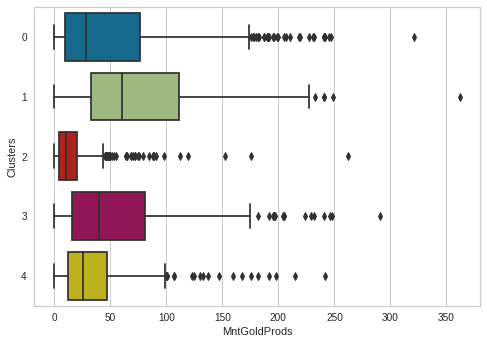

In [ ]:
  sb.boxplot(x = mnt[5], y = 'Clusters', data = hier, orient = "h")

#Hierarichal clustering analysis Lim Jun Yang


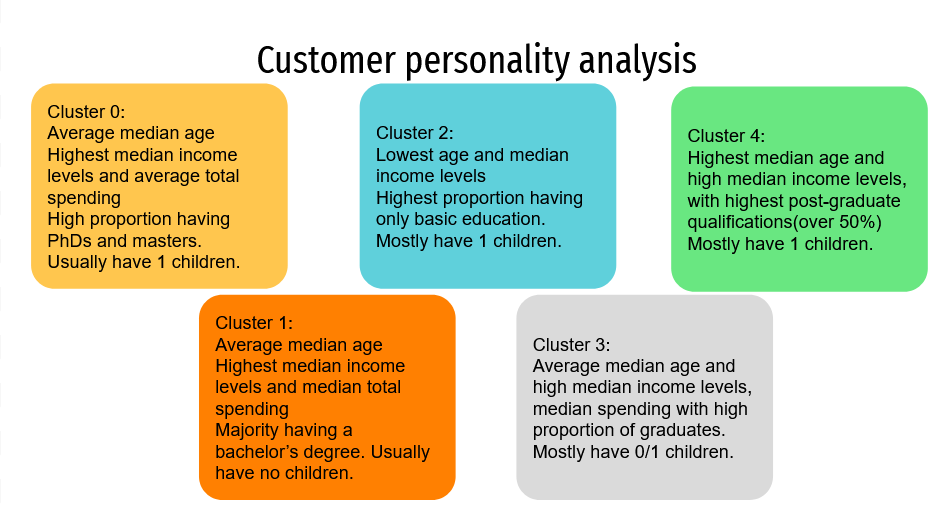

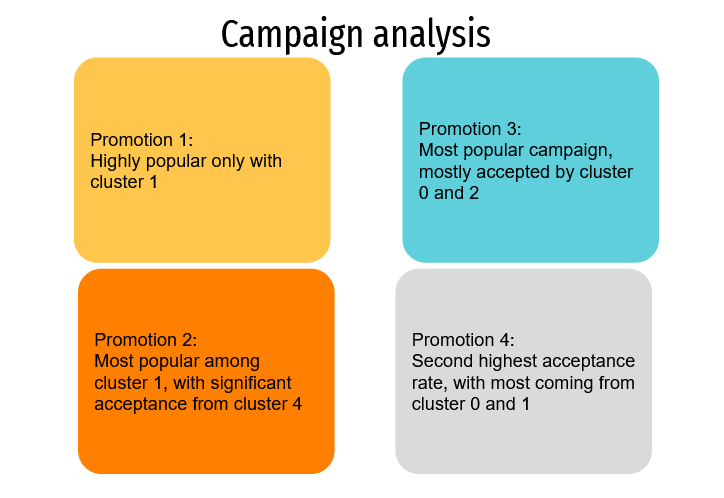

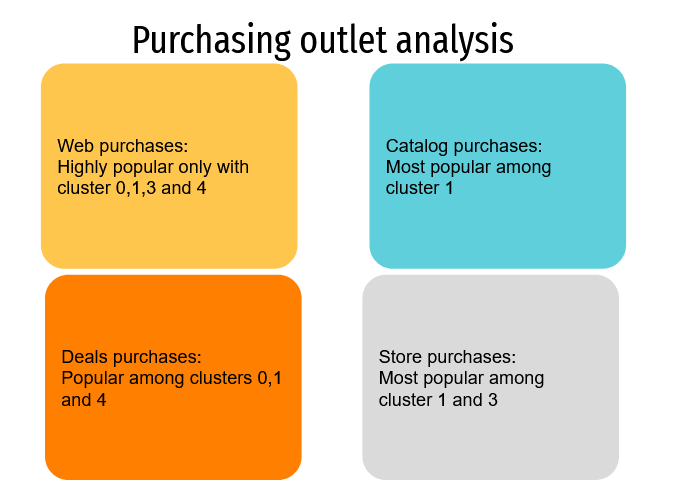

# KPrototype Lim Jun Yang
###### mix of categorical and numeric data
###### https://www.kaggle.com/code/miguelfzzz/store-customers-clustering-analysis


In [ ]:
kp= cleanD.copy()

In [ ]:
Q1 = kp['Income'].quantile(0.25)
Q3 = kp['Income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (kp["Income"] >= Q1 - 1.5 * IQR) & (kp['Income'] <= Q3 + 1.5 *IQR)
kp=kp.loc[filter]


In [ ]:
Q1 = kp['Age'].quantile(0.25)
Q3 = kp['Age'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

filter = (kp["Age"] >= Q1 - 1.5 * IQR) & (kp['Age'] <= Q3 + 1.5 *IQR)
kp=kp.loc[filter]

In [ ]:
kp.info()
cust_array=kp.values
cust_array

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   float64
 1   Relationship_Status  2229 non-null   float64
 2   Income               2229 non-null   float64
 3   Kidhome              2229 non-null   float64
 4   Teenhome             2229 non-null   float64
 5   Recency              2229 non-null   float64
 6   MntWines             2229 non-null   float64
 7   MntFruits            2229 non-null   float64
 8   MntMeatProducts      2229 non-null   float64
 9   MntFishProducts      2229 non-null   float64
 10  MntSweetProducts     2229 non-null   float64
 11  MntGoldProds         2229 non-null   float64
 12  NumDealsPurchases    2229 non-null   float64
 13  NumWebPurchases      2229 non-null   float64
 14  NumCatalogPurchases  2229 non-null   float64
 15  NumStorePurchases    2229 non-null   f

array([[2.0, 1.0, 58138.0, ..., 0.0, False, 39],
       [2.0, 1.0, 46344.0, ..., 2.0, True, 42],
       [2.0, 0.0, 71613.0, ..., 0.0, False, 31],
       ...,
       [2.0, 1.0, 56981.0, ..., 0.0, False, 15],
       [3.0, 0.0, 69245.0, ..., 1.0, True, 40],
       [4.0, 0.0, 52869.0, ..., 2.0, True, 42]], dtype=object)

In [ ]:
kproto= KPrototypes(n_clusters=4, verbose=2)
clusters=kproto.fit_predict(cust_array, categorical=[0,1])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 350, ncost: 100875499116.69467
Run: 1, iteration: 2/100, moves: 218, ncost: 93002784175.7075
Run: 1, iteration: 3/100, moves: 156, ncost: 88796241538.55945
Run: 1, iteration: 4/100, moves: 130, ncost: 85996775315.12271
Run: 1, iteration: 5/100, moves: 88, ncost: 84634011533.44804
Run: 1, iteration: 6/100, moves: 66, ncost: 83870572833.35712
Run: 1, iteration: 7/100, moves: 52, ncost: 83304359212.50903
Run: 1, iteration: 8/100, moves: 52, ncost: 82846947581.68907
Run: 1, iteration: 9/100, moves: 45, ncost: 82517885040.77252
Run: 1, iteration: 10/100, moves: 36, ncost: 82301473441.44928
Run: 1, iteration: 11/100, moves: 25, ncost: 82188323334.205
Run: 1, iteration: 12/100, moves: 14, ncost: 82158975456.36047
Run: 1, iteration: 13/100, moves: 6, ncost: 82149948879.68697
Run: 1, iteration: 14/100, moves:

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
kp['Clusters']=cluster_dict

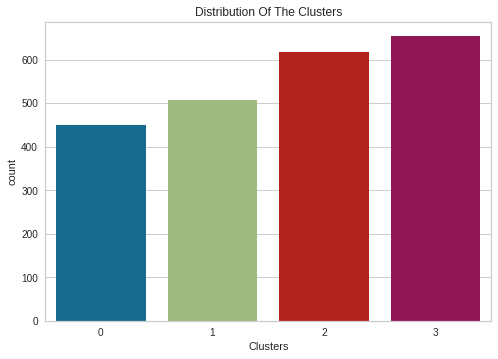

In [ ]:
pl = sb.countplot(x=kp["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

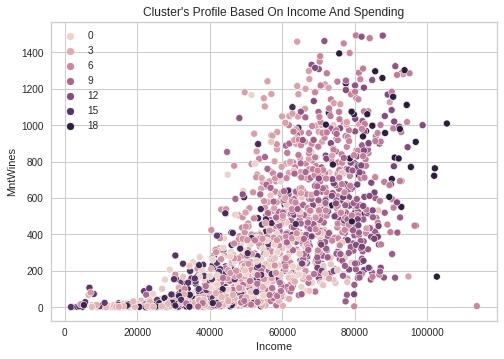

In [ ]:
pl = sb.scatterplot(data = hier,y=kp["MntWines"], x=kp["Income"],hue=hier["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(3,10):
  kproto= KPrototypes(n_clusters=i, verbose=2)
  clusters= kproto.fit_predict(cust_array, categorical=[0,1])
  labels_cluster_kproto= kproto.labels_
  print('Silhoutte score of KPrototype is of' + str(i) + "clusters is: " + str(silhouette_score(kp, labels_cluster_kproto)))

  PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
  hier["Clusters"]= yhat_AC

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 334, ncost: 162793140458.60886
Run: 1, iteration: 2/100, moves: 231, ncost: 148415742825.7244
Run: 1, iteration: 3/100, moves: 144, ncost: 142695352217.87326
Run: 1, iteration: 4/100, moves: 106, ncost: 140077341259.3904
Run: 1, iteration: 5/100, moves: 58, ncost: 139101684796.9927
Run: 1, iteration: 6/100, moves: 39, ncost: 138679354481.29712
Run: 1, iteration: 7/100, moves: 36, ncost: 138281418194.11575
Run: 1, iteration: 8/100, moves: 43, ncost: 137864144133.61835
Run: 1, iteration: 9/100, moves: 17, ncost: 137740490280.23947
Run: 1, iteration: 10/100, moves: 12, ncost: 137703722847.8209
Run: 1, iteration: 11/100, moves: 2, ncost: 137700771379.3283
Run: 1, iteration: 12/100, moves: 7, ncost: 137688289992.2767
Run: 1, iteration: 13/100, moves: 1, ncost: 137687620270.2468
Run: 1, iteration: 14/100, 

In [ ]:
kproto.labels_

array([5, 6, 1, ..., 5, 1, 7], dtype=uint16)

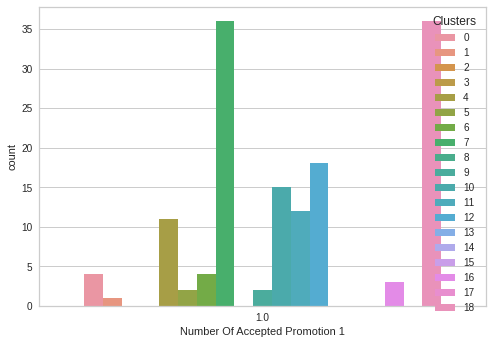

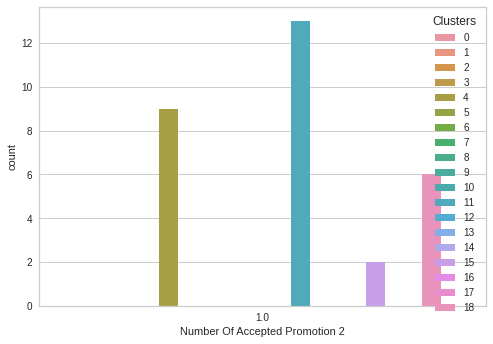

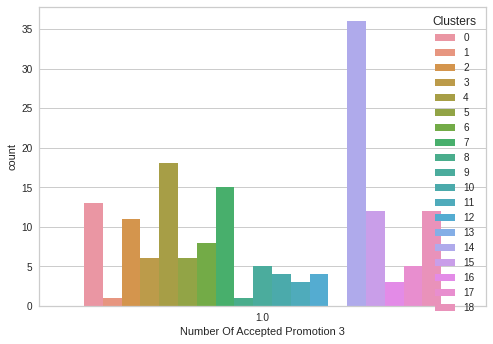

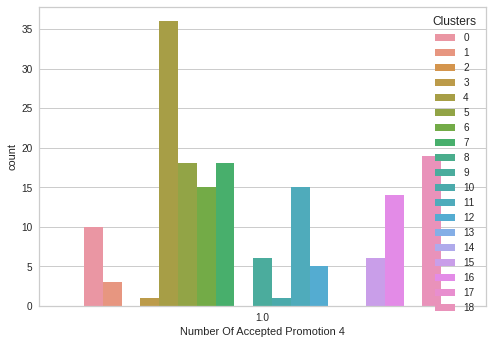

In [ ]:
Coupon= ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4"]
for i in range(len(Coupon)):
  #Plotting count of total campaign accepted.
  plt.figure()
  y=pd.DataFrame(hier.loc[hier[Coupon[i]] ==1])
  pl = sb.countplot(x= y[Coupon[i]] ,hue=hier["Clusters"])
  pl.set_xlabel("Number Of Accepted Promotion "+ str(i+1))
  plt.show()

In [ ]:
#Silhoutte score of different algorithms
#KMeans> KPrototypes > Hierarichal

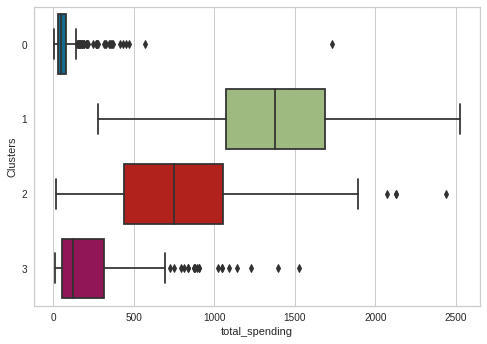

In [ ]:
sb.boxplot(y= "Clusters", x= "total_spending", data=kp, orient= "h")

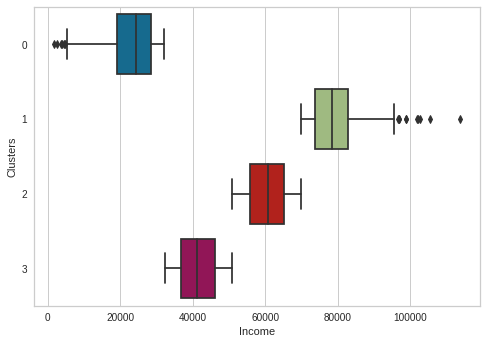

In [ ]:
sb.boxplot(y= "Clusters", x= "Income", data=kp, orient= "h")

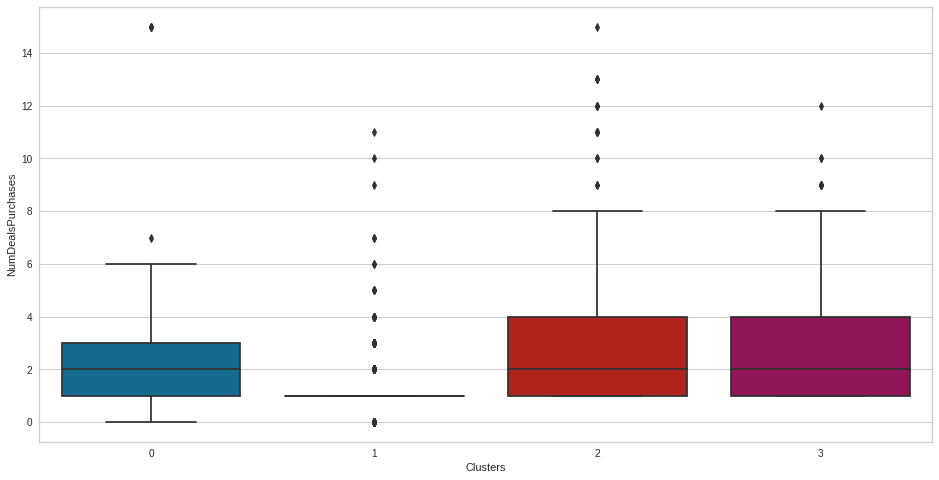

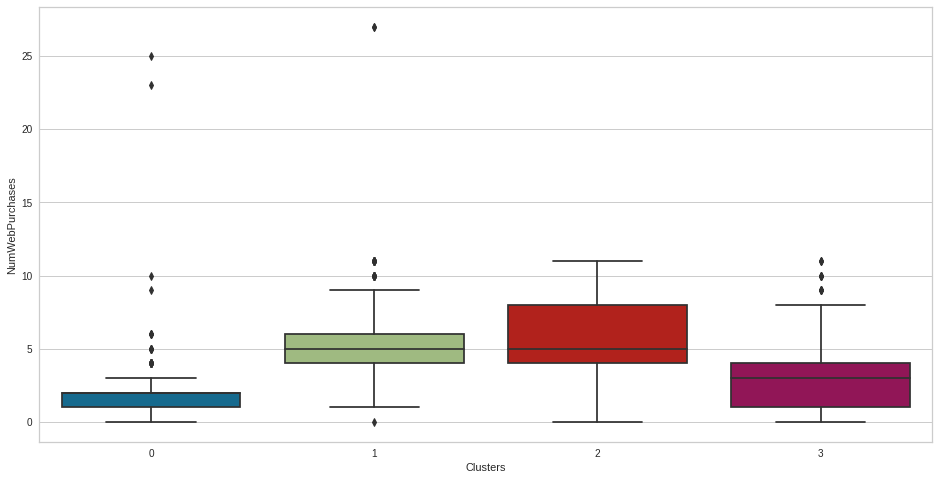

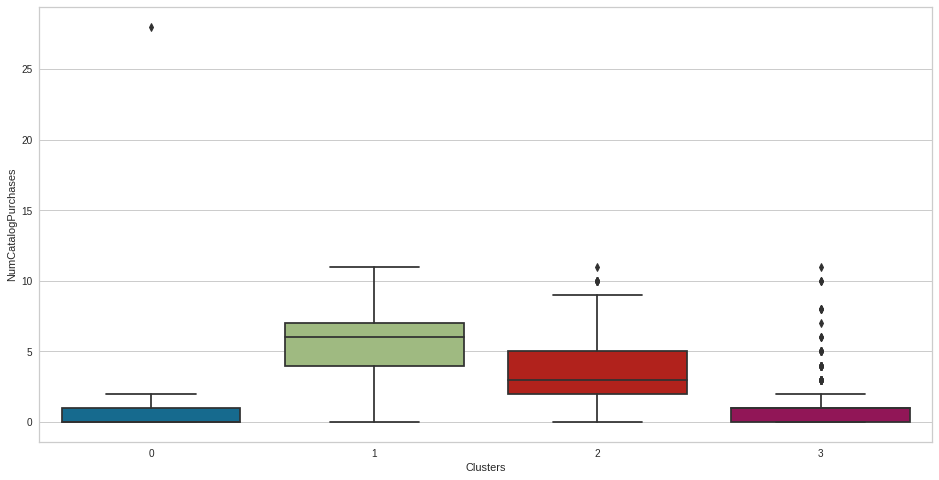

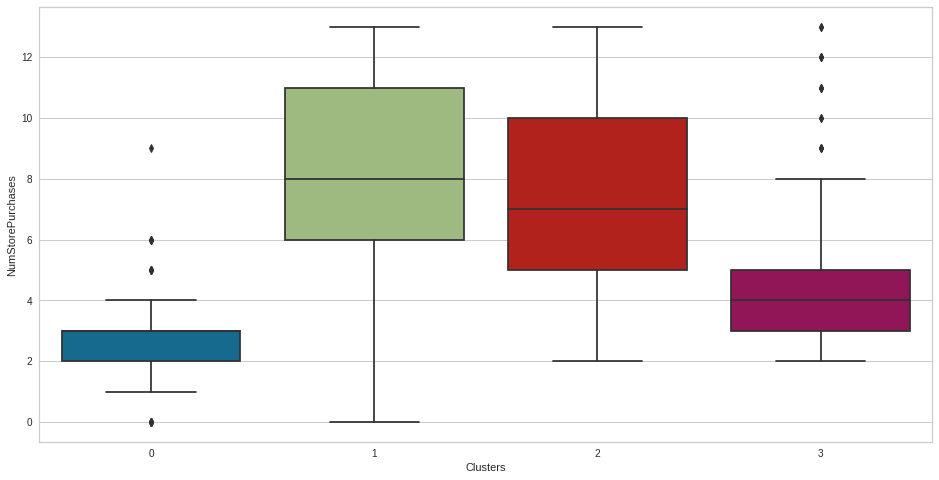

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumDealsPurchases', data = kp)

f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumWebPurchases', data = kp)

f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumCatalogPurchases', data = kp)

f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = "Clusters", y = 'NumStorePurchases', data = kp)

#how much each cluster purchase from each purchasing mode


In [ ]:
kp= kp.assign(Kids= (kp["Kidhome"]+ kp["Teenhome"]))

Personal = [ "Kidhome","Teenhome", "Education", "Kids"]

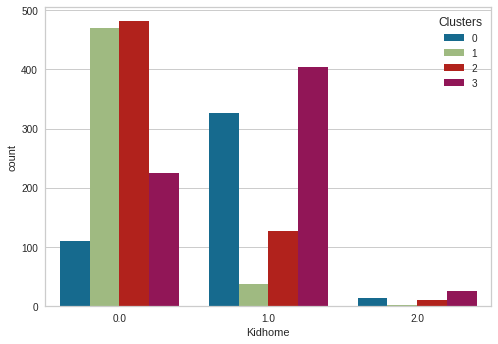

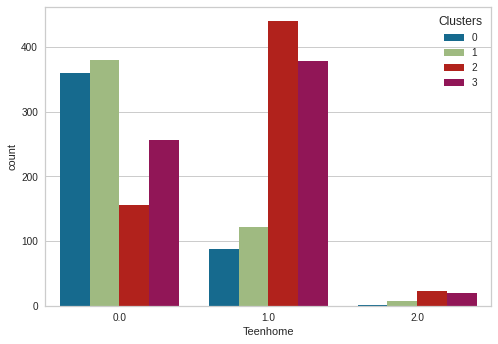

NameError: ignored

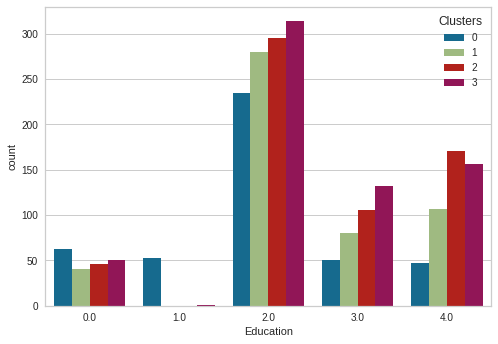

In [ ]:
for i in Personal:
    plt.figure()
    sb.countplot(x=kp[i], hue =kp["Clusters"])
    if i=="Education":
      plt.xticks(np.arange(5), labels=education)
    plt.show()

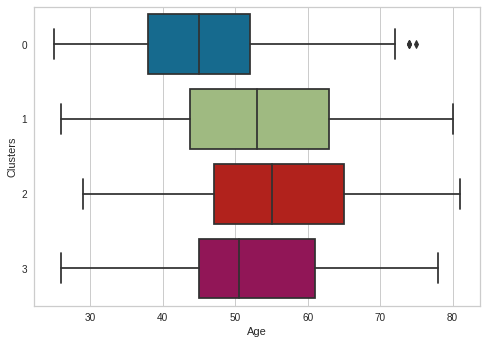

In [ ]:
# Boxplots for the Features against the Clusters
mnt= ["MntWines", "MntFruits", "MntMeatProducts","MntFishProducts", "MntSweetProducts", "MntGoldProds" ]

sb.boxplot(x = 'Age', y = 'Clusters', data = kp, orient = "h")


In [ ]:
kp0= kp[kp["Clusters"]==0]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= kp0[kp0["Education"]==0].shape[0]
basic= kp0[kp0["Education"]==1].shape[0]
grad= kp0[kp0["Education"]==2].shape[0]
master= kp0[kp0["Education"]==3].shape[0]
phd= kp0[kp0["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 0")])
fig.show()


In [ ]:
import plotly.graph_objects as go

kp0= kp[kp["Clusters"]==1]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= kp0[kp0["Education"]==0].shape[0]
basic= kp0[kp0["Education"]==1].shape[0]
grad= kp0[kp0["Education"]==2].shape[0]
master= kp0[kp0["Education"]==3].shape[0]
phd= kp0[kp0["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 1")])
fig.show()

In [ ]:

import plotly.graph_objects as go

kp2= kp[kp["Clusters"]==2]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= kp2[kp2["Education"]==0].shape[0]
basic= kp2[kp2["Education"]==1].shape[0]
grad= kp2[kp2["Education"]==2].shape[0]
master= kp2[kp2["Education"]==3].shape[0]
phd= kp2[kp2["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 2")])
fig.show()

In [ ]:
import plotly.graph_objects as go

kp3= kp[kp["Clusters"]==3]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= kp3[kp3["Education"]==0].shape[0]
basic= kp3[kp3["Education"]==1].shape[0]
grad= kp3[kp3["Education"]==2].shape[0]
master= kp3[kp3["Education"]==3].shape[0]
phd= kp3[kp3["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 3")])
fig.show()

In [ ]:
import plotly.graph_objects as go

kp4= kp[kp["Clusters"]==4]
labels = ["2n Cycle", "Basic", "Graduation", "Master", "PhD"]

twon= kp4[kp4["Education"]==0].shape[0]
basic= kp4[kp4["Education"]==1].shape[0]
grad= kp4[kp4["Education"]==2].shape[0]
master= kp4[kp4["Education"]==3].shape[0]
phd= kp4[kp4["Education"]==4].shape[0]
values = [twon, basic, grad, master, phd]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Cluster 4")])
fig.show()


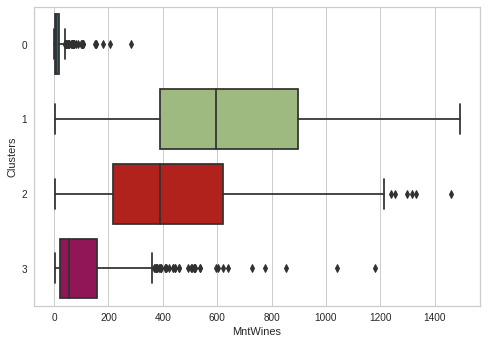

In [ ]:
sb.boxplot(x = mnt[0], y = 'Clusters', data = kp, orient = "h")


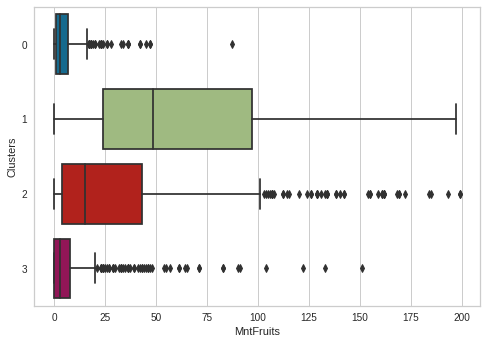

In [ ]:

sb.boxplot(x = mnt[1], y = 'Clusters', data = kp, orient = "h")


In [ ]:

sb.boxplot(x = mnt[2], y = 'Clusters', data = kp, orient = "h")

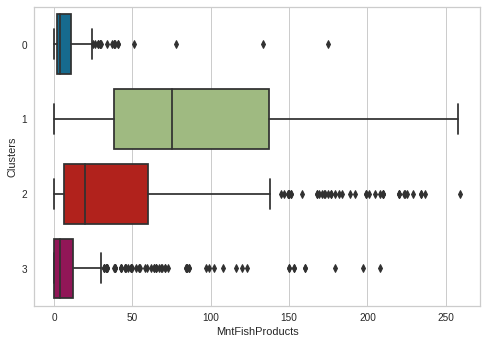

In [ ]:

sb.boxplot(x = mnt[3], y = 'Clusters', data = kp, orient = "h")

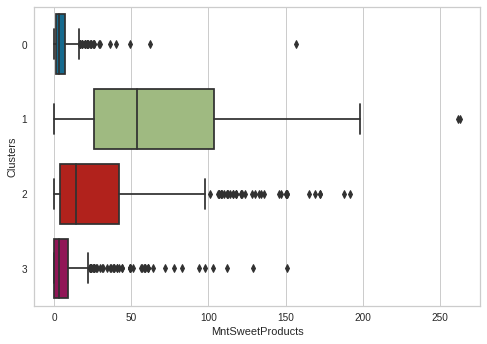

In [ ]:

sb.boxplot(x = mnt[4], y = 'Clusters', data = kp, orient = "h")

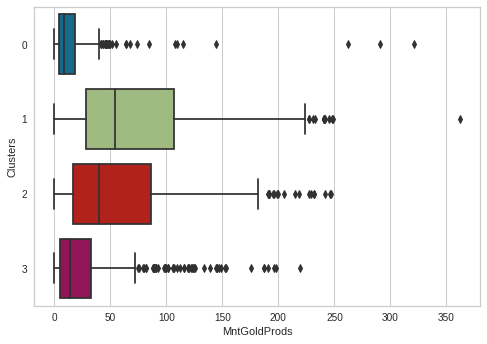

In [ ]:

sb.boxplot(x = mnt[5], y = 'Clusters', data = kp, orient = "h")